In [1]:
# =============================================================================
# CALIFORNIA HOUSING DATASET - COMPREHENSIVE ANALYSIS WITH DETAILED COMMENTS
# =============================================================================

# Install required packages using pip magic command
# This installs all necessary libraries for data analysis and visualization
!pip install pandas numpy scikit-learn matplotlib seaborn

# =============================================================================
# LIBRARY IMPORTS AND CONFIGURATION
# =============================================================================

# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations and array handling
import numpy as np

# Import sklearn's California housing dataset
from sklearn.datasets import fetch_california_housing

# Import matplotlib for basic plotting and visualization
import matplotlib.pyplot as plt

# Import seaborn for advanced statistical visualizations
import seaborn as sns

# Import scipy.stats for statistical functions (skewness, kurtosis, probability plots)
from scipy import stats

In [2]:
# =============================================================================
# DISPLAY AND PLOT CONFIGURATION
# =============================================================================

# Set pandas display options for better DataFrame output
pd.set_option('display.max_columns', None)    # Show all columns when printing DataFrames
pd.set_option('display.precision', 3)        # Show 3 decimal places for floating point numbers

# Set matplotlib/seaborn plot style for better looking visualizations
plt.style.use('seaborn-v0_8')  # Use seaborn style for cleaner plots
sns.set_palette("husl")        # Set color palette for consistent, attractive colors

# Print analysis header
print("="*80)
print("CALIFORNIA HOUSING DATASET - COMPREHENSIVE ANALYSIS")
print("="*80)

CALIFORNIA HOUSING DATASET - COMPREHENSIVE ANALYSIS


In [3]:
# =============================================================================
# SECTION 1: DATA LOADING AND INITIAL INSPECTION
# =============================================================================

print("\n1. LOADING THE DATASET")
print("-" * 50)

# Load the California housing dataset from sklearn
# This dataset contains housing data from the 1990 California census
california_housing = fetch_california_housing()

# Create a pandas DataFrame from the dataset
# california_housing.data contains the feature matrix (numerical data)
# california_housing.feature_names contains the column names for features
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Add the target variable (house values) to our DataFrame
# california_housing.target contains the median house values in hundreds of thousands of dollars
df['MedHouseVal'] = california_housing.target

# Display basic information about the loaded dataset
print(f"✓ Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✓ Features: {list(california_housing.feature_names)}")
print(f"✓ Target: MedHouseVal (Median house value in hundreds of thousands $)")

# Create a dictionary with detailed descriptions for each feature
# This helps us understand what each column represents
feature_descriptions = {
    'MedInc': 'Median income in block group (tens of thousands $)',      # Income data
    'HouseAge': 'Median house age in block group (years)',              # Age of houses
    'AveRooms': 'Average number of rooms per household',                # Room count per household
    'AveBedrms': 'Average number of bedrooms per household',            # Bedroom count per household
    'Population': 'Block group population',                             # Number of people in area
    'AveOccup': 'Average number of household members',                  # People per household
    'Latitude': 'Block group latitude',                                 # Geographic coordinate (North-South)
    'Longitude': 'Block group longitude',                               # Geographic coordinate (East-West)
    'MedHouseVal': 'Median house value (hundreds of thousands $)'       # Target variable (what we predict)
}

# Print feature descriptions for better understanding
print("\nFeature Descriptions:")
for feature, desc in feature_descriptions.items():
    print(f"• {feature:12}: {desc}")

# Check for missing values in the dataset
# Missing values can cause problems in analysis and modeling
missing_count = df.isnull().sum().sum()
print(f"\nMissing values: {missing_count}")
print("✓ No missing values detected" if missing_count == 0 else f"⚠ {missing_count} missing values found")



1. LOADING THE DATASET
--------------------------------------------------
✓ Dataset loaded: 20640 rows, 9 columns
✓ Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
✓ Target: MedHouseVal (Median house value in hundreds of thousands $)

Feature Descriptions:
• MedInc      : Median income in block group (tens of thousands $)
• HouseAge    : Median house age in block group (years)
• AveRooms    : Average number of rooms per household
• AveBedrms   : Average number of bedrooms per household
• Population  : Block group population
• AveOccup    : Average number of household members
• Latitude    : Block group latitude
• Longitude   : Block group longitude
• MedHouseVal : Median house value (hundreds of thousands $)

Missing values: 0
✓ No missing values detected


In [4]:
# =============================================================================
# SECTION 2: TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("A. TARGET VARIABLE ANALYSIS")
print("="*80)

# Extract the target variable for detailed analysis
# This is what we want to predict - median house values
target = df['MedHouseVal']

# Calculate comprehensive summary statistics for the target variable
print("\nSummary Statistics for Target Variable (MedHouseVal):")
target_stats = target.describe()  # Gets count, mean, std, min, quartiles, max
print(target_stats)

# Interpret the statistics in dollar terms for better understanding
print(f"\nInterpretation:")
print(f"• Mean house value: ${target_stats['mean']*100:,.0f}")      # Convert to actual dollars
print(f"• Median house value: ${target_stats['50%']*100:,.0f}")     # 50th percentile
print(f"• Price range: ${target_stats['min']*100:,.0f} - ${target_stats['max']*100:,.0f}")
print(f"• Standard deviation: ${target_stats['std']*100:,.0f}")     # Measure of spread

# Calculate skewness and kurtosis to understand the distribution shape
skewness = stats.skew(target)    # Measures asymmetry of distribution
kurtosis = stats.kurtosis(target) # Measures tail heaviness

# Interpret skewness (normal distribution has skewness ≈ 0)
skew_interpretation = 'Right-skewed' if skewness > 0.5 else 'Left-skewed' if skewness < -0.5 else 'Approximately normal'
kurtosis_interpretation = 'Heavy-tailed' if kurtosis > 0 else 'Light-tailed'

print(f"• Skewness: {skewness:.3f} ({skew_interpretation})")
print(f"• Kurtosis: {kurtosis:.3f} ({kurtosis_interpretation})")


A. TARGET VARIABLE ANALYSIS

Summary Statistics for Target Variable (MedHouseVal):
count    20640.000
mean         2.069
std          1.154
min          0.150
25%          1.196
50%          1.797
75%          2.647
max          5.000
Name: MedHouseVal, dtype: float64

Interpretation:
• Mean house value: $207
• Median house value: $180
• Price range: $15 - $500
• Standard deviation: $115
• Skewness: 0.978 (Right-skewed)
• Kurtosis: 0.328 (Heavy-tailed)


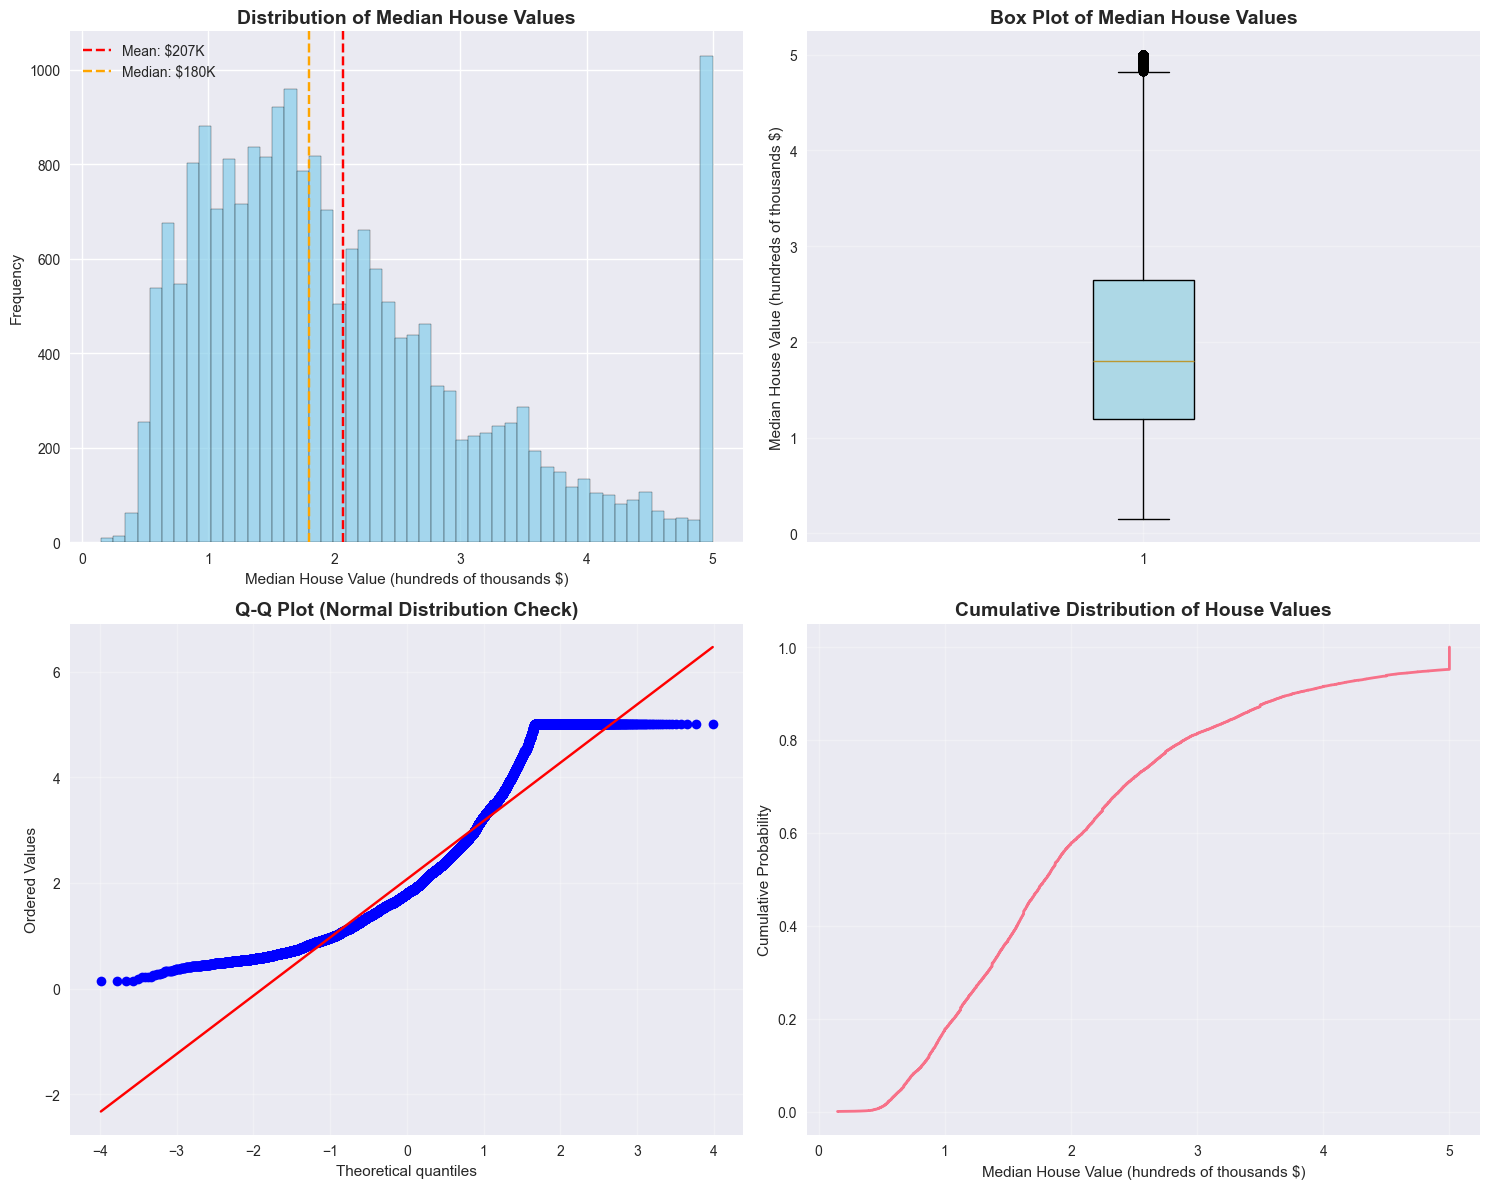

In [5]:
# =============================================================================
# TARGET VARIABLE VISUALIZATIONS
# =============================================================================

# Create a 2x2 subplot layout for comprehensive target variable visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Histogram with mean and median lines
# Shows the frequency distribution of house values
axes[0, 0].hist(target, bins=50, alpha=0.7, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median to show central tendencies
axes[0, 0].axvline(target.mean(), color='red', linestyle='--', label=f'Mean: ${target.mean()*100:.0f}K')
axes[0, 0].axvline(target.median(), color='orange', linestyle='--', label=f'Median: ${target.median()*100:.0f}K')

# Set labels and title
axes[0, 0].set_title('Distribution of Median House Values', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Median House Value (hundreds of thousands $)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()  # Show the legend for mean/median lines

# Plot 2: Box plot for outlier detection
# Box plots show quartiles, median, and outliers clearly
box_plot = axes[0, 1].boxplot(target, vert=True, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')  # Color the box

axes[0, 1].set_title('Box Plot of Median House Values', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Median House Value (hundreds of thousands $)')
axes[0, 1].grid(True, alpha=0.3)  # Add grid for easier reading

# Plot 3: Q-Q plot for normality assessment
# Quantile-Quantile plot compares our data distribution to normal distribution
# If points lie on the diagonal line, data is normally distributed
stats.probplot(target, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution Check)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Cumulative distribution function
# Shows what percentage of houses cost less than each price point
sorted_target = np.sort(target)  # Sort values for CDF
cumulative = np.arange(1, len(sorted_target) + 1) / len(sorted_target)  # Calculate cumulative probabilities

axes[1, 1].plot(sorted_target, cumulative, linewidth=2)
axes[1, 1].set_title('Cumulative Distribution of House Values', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Median House Value (hundreds of thousands $)')
axes[1, 1].set_ylabel('Cumulative Probability')
axes[1, 1].grid(True, alpha=0.3)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [6]:
# =============================================================================
# OUTLIER ANALYSIS USING IQR METHOD
# =============================================================================

# Calculate quartiles for outlier detection
Q1 = target.quantile(0.25)  # First quartile (25th percentile)
Q3 = target.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1               # Interquartile Range

# Calculate outlier boundaries using 1.5 * IQR rule
# This is a standard method for identifying outliers
lower_bound = Q1 - 1.5 * IQR  # Values below this are outliers
upper_bound = Q3 + 1.5 * IQR  # Values above this are outliers

# Find outliers in the data
outliers_low = target[target < lower_bound]   # Low outliers
outliers_high = target[target > upper_bound]  # High outliers
total_outliers = len(outliers_low) + len(outliers_high)

# Report outlier analysis results
print(f"\nOutlier Analysis:")
print(f"• IQR: {IQR:.3f}")
print(f"• Lower bound: ${lower_bound*100:.0f}")
print(f"• Upper bound: ${upper_bound*100:.0f}")
print(f"• Low outliers: {len(outliers_low)} ({len(outliers_low)/len(target)*100:.1f}%)")
print(f"• High outliers: {len(outliers_high)} ({len(outliers_high)/len(target)*100:.1f}%)")
print(f"• Total outliers: {total_outliers} ({total_outliers/len(target)*100:.1f}%)")


Outlier Analysis:
• IQR: 1.451
• Lower bound: $-98
• Upper bound: $482
• Low outliers: 0 (0.0%)
• High outliers: 1071 (5.2%)
• Total outliers: 1071 (5.2%)


In [7]:
# =============================================================================
# SECTION 3: FEATURE ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("B. FEATURE ANALYSIS")
print("="*80)

# Get all feature names (excluding the target variable)
features = df.columns[:-1]  # All columns except the last one (MedHouseVal)



B. FEATURE ANALYSIS



Feature Distribution Analysis:
• MedInc      : Skewness = 1.647 - Highly skewed, consider log transformation
• HouseAge    : Skewness = 0.060 - Approximately normal
• AveRooms    : Skewness = 20.696 - Highly skewed, consider log transformation
• AveBedrms   : Skewness = 31.315 - Highly skewed, consider log transformation
• Population  : Skewness = 4.935 - Highly skewed, consider log transformation
• AveOccup    : Skewness = 97.632 - Highly skewed, consider log transformation
• Latitude    : Skewness = 0.466 - Approximately normal
• Longitude   : Skewness = -0.298 - Approximately normal


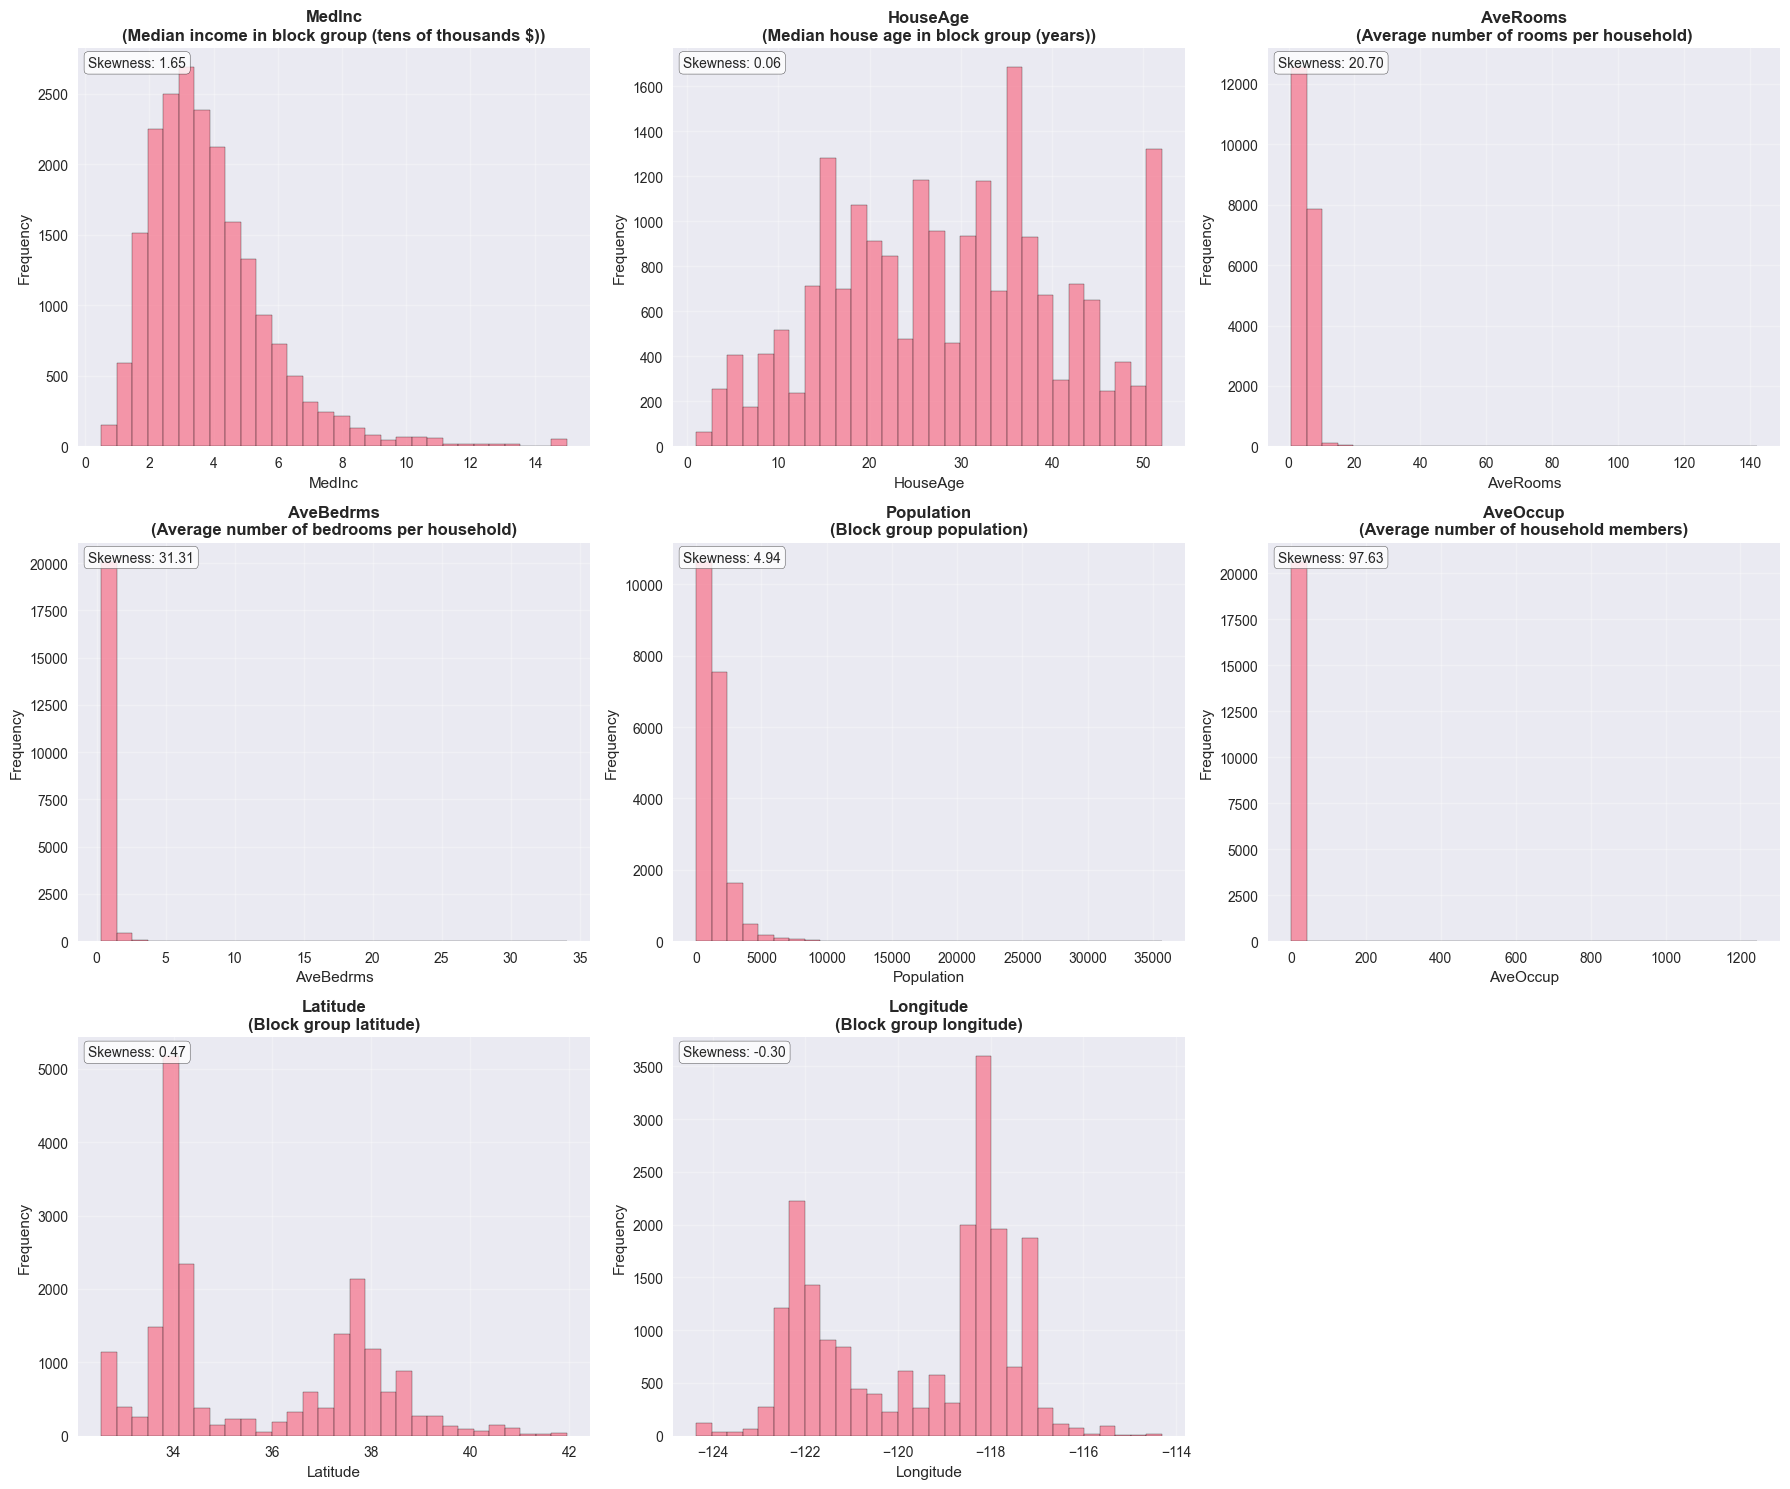

In [8]:
# =============================================================================
# INDIVIDUAL FEATURE DISTRIBUTION ANALYSIS
# =============================================================================

# Create a 3x3 grid for feature histograms (8 features + 1 empty space)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()  # Convert 2D array to 1D for easier indexing

print("\nFeature Distribution Analysis:")

# Loop through each feature to create histogram and analyze distribution
for i, feature in enumerate(features):
    # Create histogram for current feature
    axes[i].hist(df[feature], bins=30, alpha=0.7, edgecolor='black')
    
    # Set title with feature name and description
    axes[i].set_title(f'{feature}\n({feature_descriptions[feature]})', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    # Calculate skewness to assess distribution shape
    skew_val = stats.skew(df[feature])
    
    # Add skewness value as text on the plot
    axes[i].text(0.02, 0.98, f'Skewness: {skew_val:.2f}', transform=axes[i].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Interpret skewness and suggest transformations if needed
    print(f"• {feature:12}: Skewness = {skew_val:.3f}", end="")
    if abs(skew_val) > 1:
        # Highly skewed data may need transformation
        transformation = 'log' if skew_val > 0 else 'square'
        print(f" - Highly skewed, consider {transformation} transformation")
    elif abs(skew_val) > 0.5:
        print(f" - Moderately skewed")
    else:
        print(f" - Approximately normal")

# Remove the empty 9th subplot
axes[-1].remove()

plt.tight_layout()
plt.show()



Correlation Analysis:


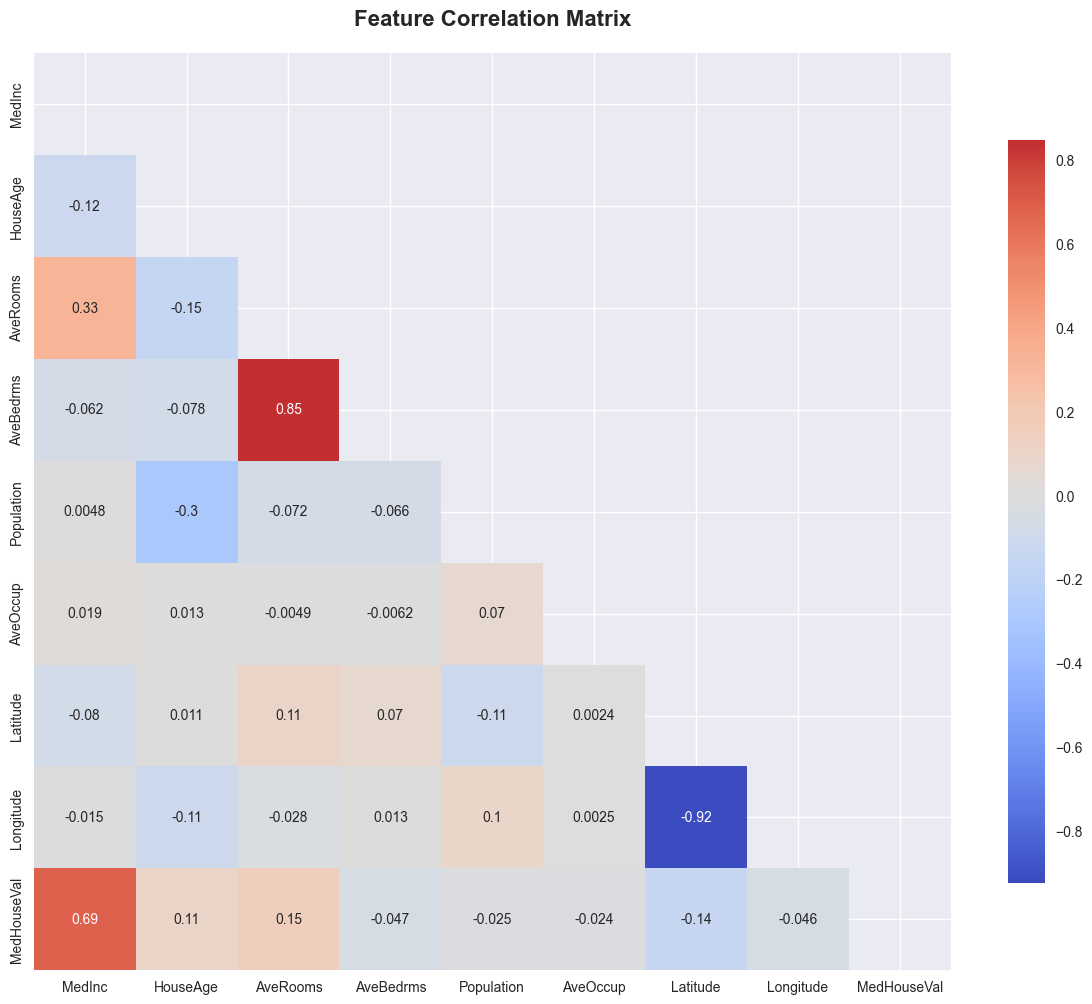

In [9]:
# =============================================================================
# CORRELATION ANALYSIS
# =============================================================================

print("\nCorrelation Analysis:")

# Calculate correlation matrix for all variables
# Correlation measures linear relationship strength between variables (-1 to +1)
correlation_matrix = df.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))

# Create upper triangular mask to avoid redundant information
# Since correlation matrix is symmetric, we only need to show upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap with correlation values
sns.heatmap(correlation_matrix, 
           annot=True,           # Show correlation values in cells
           cmap='coolwarm',      # Color scheme (blue=negative, red=positive)
           center=0,             # Center colormap at 0
           square=True,          # Make cells square-shaped
           mask=mask,            # Apply upper triangular mask
           cbar_kws={"shrink": .8})  # Shrink colorbar

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



Feature Correlations with Target (absolute values):
• MedInc      : 0.688
• AveRooms    : 0.152
• Latitude    : 0.144
• HouseAge    : 0.106
• AveBedrms   : 0.047
• Longitude   : 0.046
• Population  : 0.025
• AveOccup    : 0.024


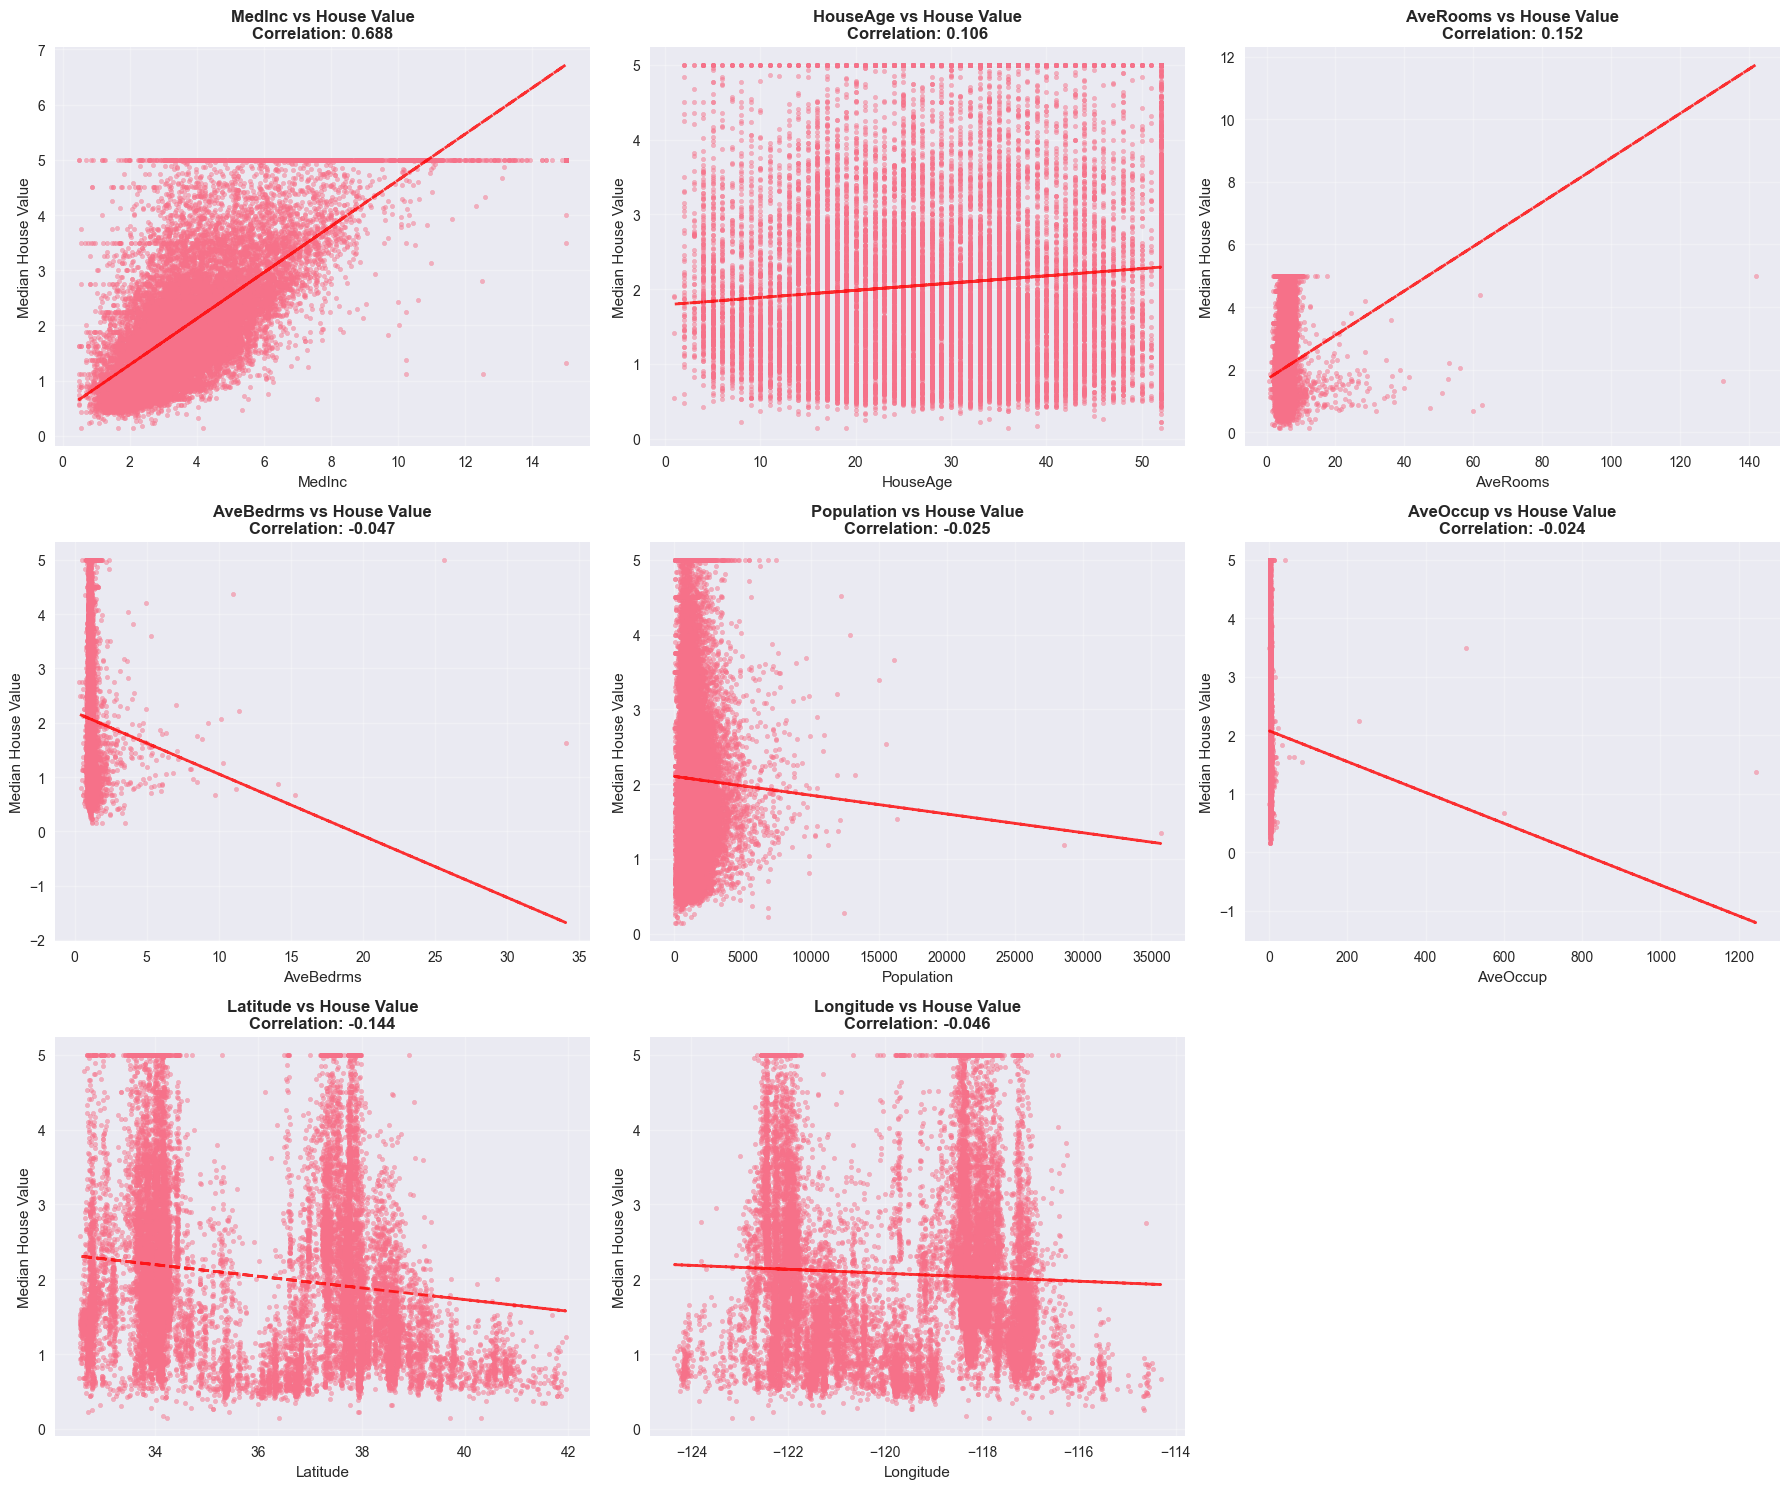

In [10]:
# =============================================================================
# FEATURE vs TARGET SCATTER PLOTS
# =============================================================================

# Create scatter plots for each feature against the target variable
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Calculate and sort correlations with target for reporting
target_correlations = correlation_matrix['MedHouseVal'].drop('MedHouseVal').abs().sort_values(ascending=False)

print(f"\nFeature Correlations with Target (absolute values):")
for feature, corr in target_correlations.items():
    print(f"• {feature:12}: {corr:.3f}")

# Create scatter plot for each feature
for i, feature in enumerate(features):
    # Create scatter plot
    axes[i].scatter(df[feature], df['MedHouseVal'], alpha=0.5, s=10)
    
    # Add linear trend line to show relationship direction
    # np.polyfit finds the best-fit line coefficients
    z = np.polyfit(df[feature], df['MedHouseVal'], 1)  # 1 = linear (degree 1 polynomial)
    p = np.poly1d(z)  # Create polynomial function from coefficients
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
    
    # Get correlation value for this feature-target pair
    correlation = correlation_matrix.loc[feature, 'MedHouseVal']
    
    # Set plot title with correlation information
    axes[i].set_title(f'{feature} vs House Value\nCorrelation: {correlation:.3f}', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Median House Value')
    axes[i].grid(True, alpha=0.3)

# Remove empty subplot
axes[-1].remove()
plt.tight_layout()
plt.show()



C. GEOGRAPHIC ANALYSIS


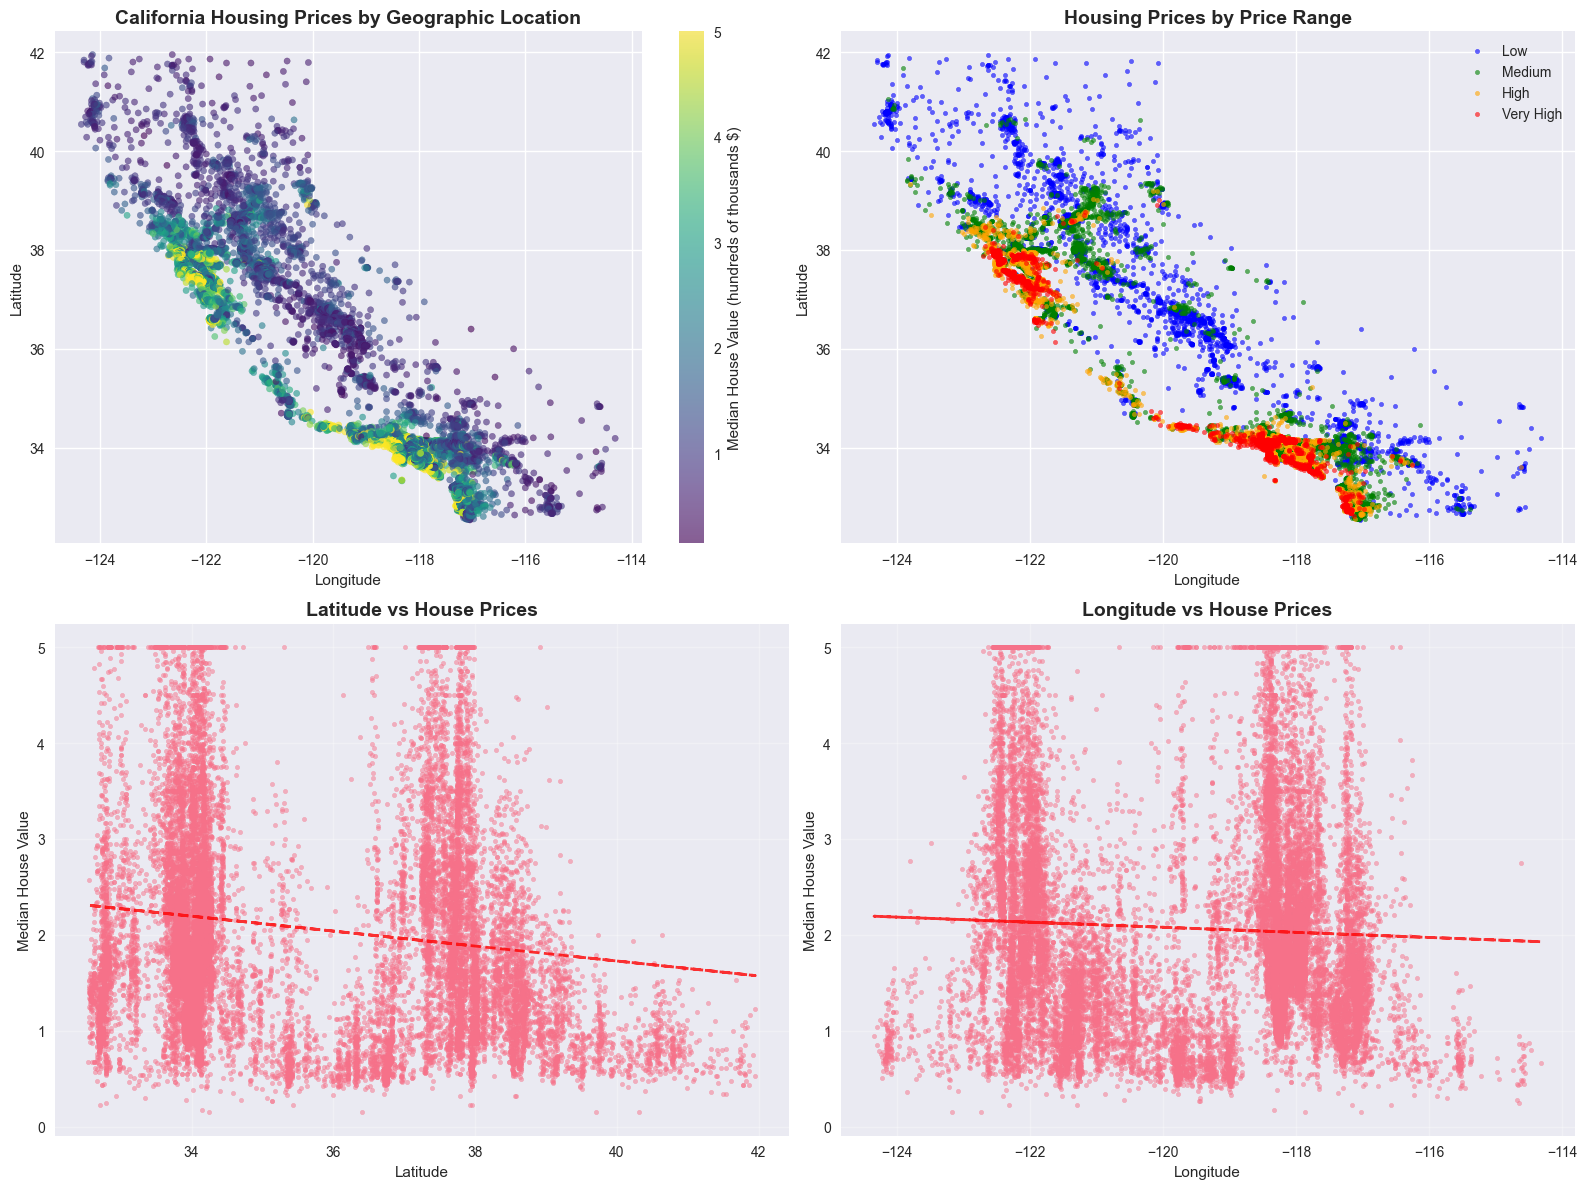

In [11]:
# =============================================================================
# SECTION 4: GEOGRAPHIC ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("C. GEOGRAPHIC ANALYSIS")
print("="*80)

# Create 2x2 subplot layout for geographic analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# =============================================================================
# MAIN GEOGRAPHIC VISUALIZATION
# =============================================================================

# Plot 1: Geographic scatter plot colored by house prices
# This shows California's geography with color-coded house values
scatter = axes[0, 0].scatter(df['Longitude'],      # X-axis: East-West position
                           df['Latitude'],        # Y-axis: North-South position
                           c=df['MedHouseVal'],   # Color: House value
                           alpha=0.6,             # Transparency
                           s=20,                  # Point size
                           cmap='viridis')        # Color scheme (dark blue to yellow)

axes[0, 0].set_title('California Housing Prices by Geographic Location', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Longitude')
axes[0, 0].set_ylabel('Latitude')

# Add colorbar to show what colors represent
cbar = plt.colorbar(scatter, ax=axes[0, 0])
cbar.set_label('Median House Value (hundreds of thousands $)')
# =============================================================================
# PRICE RANGE GEOGRAPHIC DISTRIBUTION
# =============================================================================

# Plot 2: Geographic distribution by price categories
# Divide house values into 4 categories for clearer visualization
price_ranges = pd.cut(df['MedHouseVal'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
colors = ['blue', 'green', 'orange', 'red']  # Colors for each price range

# Plot each price range with different colors
for i, (price_range, color) in enumerate(zip(['Low', 'Medium', 'High', 'Very High'], colors)):
    mask = price_ranges == price_range  # Select only houses in this price range
    axes[0, 1].scatter(df.loc[mask, 'Longitude'], df.loc[mask, 'Latitude'], 
                      c=color, label=price_range, alpha=0.6, s=10)

axes[0, 1].set_title('Housing Prices by Price Range', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Latitude')
axes[0, 1].legend()  # Show legend for price ranges
# =============================================================================
# LATITUDE vs PRICE RELATIONSHIP
# =============================================================================

# Plot 3: Latitude vs House Prices
# Shows how north-south position affects prices
axes[1, 0].scatter(df['Latitude'], df['MedHouseVal'], alpha=0.5, s=10)

# Add trend line to show relationship direction
z_lat = np.polyfit(df['Latitude'], df['MedHouseVal'], 1)
p_lat = np.poly1d(z_lat)
axes[1, 0].plot(df['Latitude'], p_lat(df['Latitude']), "r--", alpha=0.8, linewidth=2)

axes[1, 0].set_title('Latitude vs House Prices', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Latitude')
axes[1, 0].set_ylabel('Median House Value')
axes[1, 0].grid(True, alpha=0.3)
# =============================================================================
# LONGITUDE vs PRICE RELATIONSHIP
# =============================================================================

# Plot 4: Longitude vs House Prices  
# Shows how east-west position affects prices
axes[1, 1].scatter(df['Longitude'], df['MedHouseVal'], alpha=0.5, s=10)

# Add trend line
z_lon = np.polyfit(df['Longitude'], df['MedHouseVal'], 1)
p_lon = np.poly1d(z_lon)
axes[1, 1].plot(df['Longitude'], p_lon(df['Longitude']), "r--", alpha=0.8, linewidth=2)

axes[1, 1].set_title('Longitude vs House Prices', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Median House Value')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# =============================================================================
# GEOGRAPHIC PATTERN ANALYSIS
# =============================================================================

# Calculate correlations between geographic coordinates and house prices
lat_corr = correlation_matrix.loc['Latitude', 'MedHouseVal']
lon_corr = correlation_matrix.loc['Longitude', 'MedHouseVal']

print(f"\nGeographic Analysis Results:")
print(f"• Latitude correlation with price: {lat_corr:.3f}")
print(f"• Longitude correlation with price: {lon_corr:.3f}")

# Interpret geographic patterns based on correlation values
print(f"\nGeographic Patterns:")
if lat_corr < -0.1:
    print("• Southern California (lower latitude) tends to have higher prices")
elif lat_corr > 0.1:
    print("• Northern California (higher latitude) tends to have higher prices")

if lon_corr > 0.1:
    print("• Eastern California (higher longitude) tends to have higher prices")
elif lon_corr < -0.1:
    print("• Western/Coastal California (lower longitude) tends to have higher prices")

# Provide context about California's geography and housing market
print("\nCalifornia Geography Impact:")
print("• Coastal areas (lower longitude) often have higher property values")
print("• Major metropolitan areas (SF Bay Area, LA) show high price concentrations")
print("• Desert and rural inland areas typically show lower values")



Geographic Analysis Results:
• Latitude correlation with price: -0.144
• Longitude correlation with price: -0.046

Geographic Patterns:
• Southern California (lower latitude) tends to have higher prices

California Geography Impact:
• Coastal areas (lower longitude) often have higher property values
• Major metropolitan areas (SF Bay Area, LA) show high price concentrations
• Desert and rural inland areas typically show lower values


In [13]:
# =============================================================================
# SECTION 5: FEATURE RELATIONSHIPS
# =============================================================================

print("\n" + "="*80)
print("D. FEATURE RELATIONSHIPS")
print("="*80)

# =============================================================================
# TOP CORRELATIONS ANALYSIS
# =============================================================================

# Identify the 3 features most strongly correlated with house prices
top_3_features = target_correlations.head(3)

print(f"\nTop 3 Strongest Correlations with Target:")
for i, (feature, corr) in enumerate(top_3_features.items(), 1):
    print(f"{i}. {feature}: {corr:.3f} ({feature_descriptions[feature]})")



D. FEATURE RELATIONSHIPS

Top 3 Strongest Correlations with Target:
1. MedInc: 0.688 (Median income in block group (tens of thousands $))
2. AveRooms: 0.152 (Average number of rooms per household)
3. Latitude: 0.144 (Block group latitude)


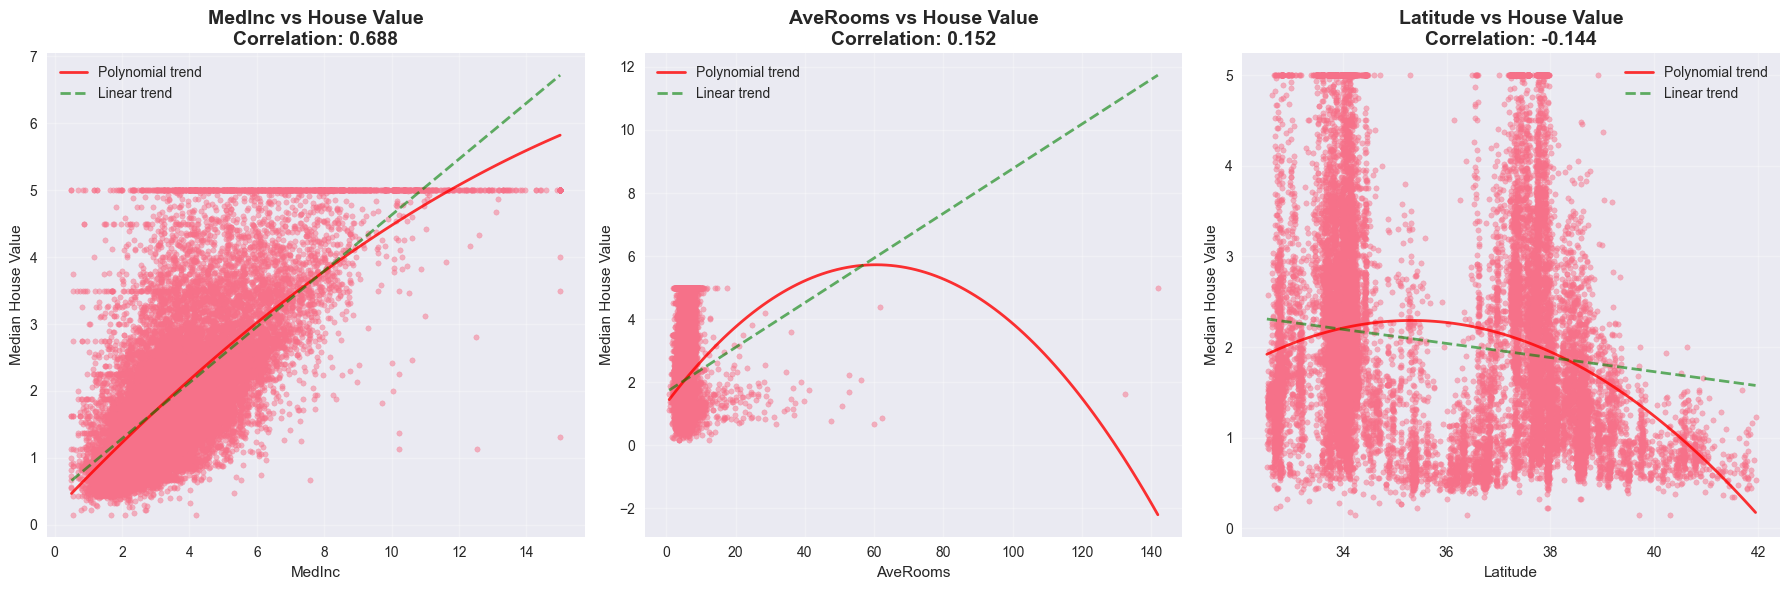

In [14]:
# =============================================================================
# DETAILED ANALYSIS OF TOP 3 RELATIONSHIPS
# =============================================================================

# Create detailed plots for the top 3 most important features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(top_3_features.index):
    # Create scatter plot
    axes[i].scatter(df[feature], df['MedHouseVal'], alpha=0.5, s=15)
    
    # Add polynomial trend line (degree 2) for better curve fitting
    # This can capture non-linear relationships better than linear trend
    z = np.polyfit(df[feature], df['MedHouseVal'], 2)  # 2nd degree polynomial
    p = np.poly1d(z)
    x_smooth = np.linspace(df[feature].min(), df[feature].max(), 100)  # Smooth x values
    axes[i].plot(x_smooth, p(x_smooth), "r-", alpha=0.8, linewidth=2, label='Polynomial trend')
    
    # Add linear trend line for comparison
    z_linear = np.polyfit(df[feature], df['MedHouseVal'], 1)  # Linear trend
    p_linear = np.poly1d(z_linear)
    axes[i].plot(x_smooth, p_linear(x_smooth), "g--", alpha=0.6, linewidth=2, label='Linear trend')
    
    # Get correlation coefficient
    correlation = correlation_matrix.loc[feature, 'MedHouseVal']
    
    # Set plot formatting
    axes[i].set_title(f'{feature} vs House Value\nCorrelation: {correlation:.3f}', 
                     fontsize=14, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Median House Value')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
# =============================================================================
# MULTICOLLINEARITY ANALYSIS
# =============================================================================

print(f"\nMulticollinearity Analysis:")
print("High correlations between features (|r| > 0.5):")

# Extract feature-to-feature correlations (excluding target variable)
feature_correlations = correlation_matrix.drop('MedHouseVal', axis=1).drop('MedHouseVal', axis=0)

# Find pairs of features with high correlation
high_corr_pairs = []
for i in range(len(feature_correlations.columns)):
    for j in range(i+1, len(feature_correlations.columns)):  # Avoid duplicate pairs
        corr_val = feature_correlations.iloc[i, j]
        if abs(corr_val) > 0.5:  # Threshold for "high" correlation
            high_corr_pairs.append((feature_correlations.columns[i], 
                                  feature_correlations.columns[j], 
                                  corr_val))

# Report multicollinearity findings
if high_corr_pairs:
    # Sort by correlation strength (highest first)
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"• {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("• No strong multicollinearity detected (all |r| < 0.5)")


Multicollinearity Analysis:
High correlations between features (|r| > 0.5):
• Latitude ↔ Longitude: -0.925
• AveRooms ↔ AveBedrms: 0.848


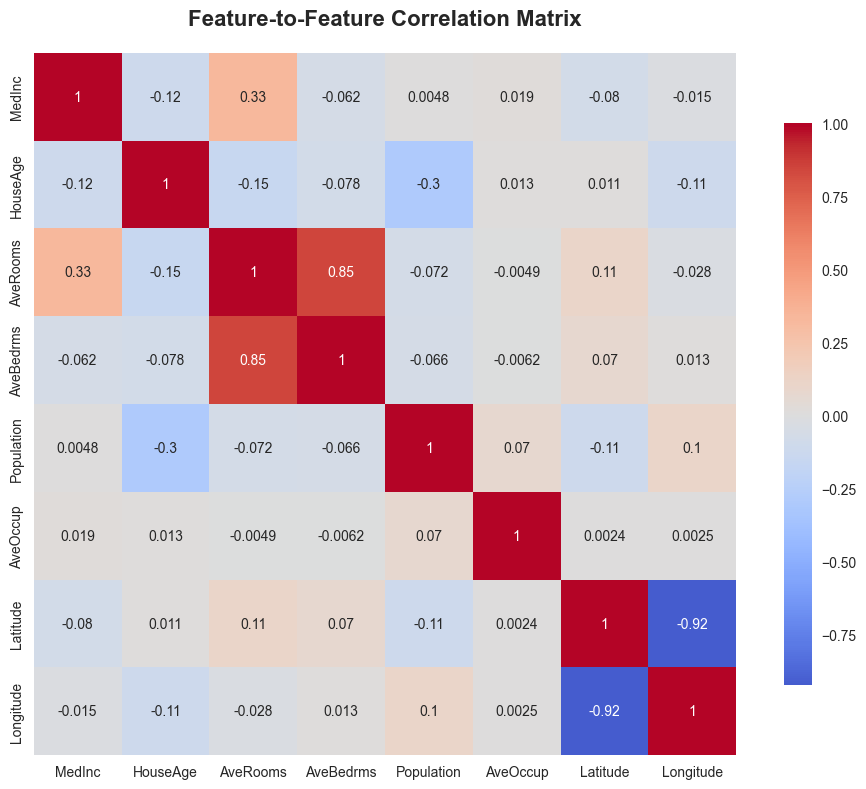

In [16]:
# =============================================================================
# FEATURE-TO-FEATURE CORRELATION HEATMAP
# =============================================================================

# Create heatmap showing only feature-to-feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(feature_correlations, 
           annot=True,           # Show correlation values
           cmap='coolwarm',      # Color scheme
           center=0,             # Center at zero correlation
           square=True,          # Square cells
           cbar_kws={"shrink": .8})  # Colorbar settings

plt.title('Feature-to-Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [17]:
# =============================================================================
# EDA FINDINGS FINAL SUMMARY
# =============================================================================

analysis = """
The California Housing Dataset provides lots of valuable information, not just on the housing market of California, 
but on overall real estate trends that expand beyond California. For example, housing prices rise significantly as 
proximity to the coast gets nearer. This contributes to the notable clustering of house prices, where notably high 
housing prices tend to group by geographical location. I believe this also has to do with the correlations, as areas 
of higher median income tend to have higher house prices.

There is a lot to be said about such correlations in fact, as we will need to decide on features that correlate with 
housing prices when creating our model. Median income, as mentioned previously, is most notable, with a correlation 
of 0.688. This is followed by the average rooms, with a correlation of 0.152. Latitude has a correlation of 0.144, 
and house age of 0.106. Other features seem to have a correlation <0.05, making them poor candidates for our model.

There will be a number of challenges during the modelling. For example, median house values are right-skewed, 
resulting in a downward bias that must be accounted for. Features come in drastically different scales, and 
standardization is required in order to ensure that no feature dominates the model. The Q-Q scale reveals the 
presence of outliers, which will need to be cut out in order to not damage the integrity of the model.
"""

print(analysis)


The California Housing Dataset provides lots of valuable information, not just on the housing market of California, 
but on overall real estate trends that expand beyond California. For example, housing prices rise significantly as 
proximity to the coast gets nearer. This contributes to the notable clustering of house prices, where notably high 
housing prices tend to group by geographical location. I believe this also has to do with the correlations, as areas 
of higher median income tend to have higher house prices.

There is a lot to be said about such correlations in fact, as we will need to decide on features that correlate with 
housing prices when creating our model. Median income, as mentioned previously, is most notable, with a correlation 
of 0.688. This is followed by the average rooms, with a correlation of 0.152. Latitude has a correlation of 0.144, 
and house age of 0.106. Other features seem to have a correlation <0.05, making them poor candidates for our model.

There

In [18]:
# =============================================================================
# MISSING DATA ANALYSIS - CALIFORNIA HOUSING DATASET
# =============================================================================

# Check for missing values in each column
# df.isnull() creates a boolean DataFrame where True = missing value
# .sum() counts the True values (missing values) for each column
missing_counts = df.isnull().sum()

print("="*60)
print("MISSING DATA ANALYSIS")
print("="*60)

print("\nMissing values count per column:")
print("-" * 40)

# Loop through each column and display missing value count
for column in df.columns:
    missing_count = missing_counts[column]
    
    # Calculate percentage of missing values
    missing_percentage = (missing_count / len(df)) * 100
    
    # Create status indicator
    if missing_count == 0:
        status = "✓ Complete"
        print(f"{column:12}: {missing_count:4d} missing ({missing_percentage:4.1f}%) - {status}")
    else:
        status = "⚠ Missing"
        print(f"{column:12}: {missing_count:4d} missing ({missing_percentage:4.1f}%) - {status}")

# Summary statistics
total_missing = missing_counts.sum()
total_cells = len(df) * len(df.columns)
overall_missing_percentage = (total_missing / total_cells) * 100

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"Total missing values across all columns: {total_missing}")
print(f"Total cells in dataset: {total_cells:,}")
print(f"Overall missing data percentage: {overall_missing_percentage:.2f}%")

# Additional analysis if there are missing values
if total_missing > 0:
    print(f"\nColumns with missing data:")
    columns_with_missing = missing_counts[missing_counts > 0]
    for column, count in columns_with_missing.items():
        print(f"• {column}: {count} missing values")
        
    print(f"\nColumns with no missing data:")
    complete_columns = missing_counts[missing_counts == 0]
    for column in complete_columns.index:
        print(f"• {column}")
else:
    print(f"\n✅ Excellent! No missing values detected in any column.")
    print(f"   Dataset is complete and ready for analysis.")

# Create a visual representation if needed
if len(df.columns) <= 15:  # Only create visual for reasonable number of columns
    print(f"\nVisual representation (✓ = complete, ✗ = missing):")
    print("-" * 50)
    
    # Create a simple text-based visualization
    for column in df.columns:
        missing_count = missing_counts[column]
        if missing_count == 0:
            visual = "✓" * min(20, 20)  # Show checkmarks for complete data
            print(f"{column:12}: {visual}")
        else:
            complete_count = len(df) - missing_count
            complete_ratio = complete_count / len(df)
            complete_marks = int(complete_ratio * 20)
            missing_marks = 20 - complete_marks
            visual = "✓" * complete_marks + "✗" * missing_marks
            print(f"{column:12}: {visual}")

MISSING DATA ANALYSIS

Missing values count per column:
----------------------------------------
MedInc      :    0 missing ( 0.0%) - ✓ Complete
HouseAge    :    0 missing ( 0.0%) - ✓ Complete
AveRooms    :    0 missing ( 0.0%) - ✓ Complete
AveBedrms   :    0 missing ( 0.0%) - ✓ Complete
Population  :    0 missing ( 0.0%) - ✓ Complete
AveOccup    :    0 missing ( 0.0%) - ✓ Complete
Latitude    :    0 missing ( 0.0%) - ✓ Complete
Longitude   :    0 missing ( 0.0%) - ✓ Complete
MedHouseVal :    0 missing ( 0.0%) - ✓ Complete

SUMMARY
Total missing values across all columns: 0
Total cells in dataset: 185,760
Overall missing data percentage: 0.00%

✅ Excellent! No missing values detected in any column.
   Dataset is complete and ready for analysis.

Visual representation (✓ = complete, ✗ = missing):
--------------------------------------------------
MedInc      : ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
HouseAge    : ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
AveRooms    : ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
AveBedrms   : ✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓✓
Po

In [19]:
# =============================================================================
# MISSING VALUES FINDINGS FINAL SUMMARY
# =============================================================================

analysis = """
The dataset is complete, so there is no need for removal or imputation.
"""

print(analysis)


The dataset is complete, so there is no need for removal or imputation.



OUTLIER DETECTION ANALYSIS

Outlier Detection Results:
--------------------------------------------------

📊 Feature: MedInc
  IQR Method:     681 outliers (  3.3%)
  Z-Score Method:  345 outliers (  1.7%)
  Overlap:        345 outliers detected by both methods

📊 Feature: HouseAge
  IQR Method:       0 outliers (  0.0%)
  Z-Score Method:    0 outliers (  0.0%)
  Overlap:          0 outliers detected by both methods

📊 Feature: AveRooms
  IQR Method:     511 outliers (  2.5%)
  Z-Score Method:  133 outliers (  0.6%)
  Overlap:        133 outliers detected by both methods

📊 Feature: AveBedrms
  IQR Method:    1424 outliers (  6.9%)
  Z-Score Method:  145 outliers (  0.7%)
  Overlap:        145 outliers detected by both methods

📊 Feature: Population
  IQR Method:    1196 outliers (  5.8%)
  Z-Score Method:  342 outliers (  1.7%)
  Overlap:        342 outliers detected by both methods

📊 Feature: AveOccup
  IQR Method:     711 outliers (  3.4%)
  Z-Score Method:    8 outliers (  0.0%)
 

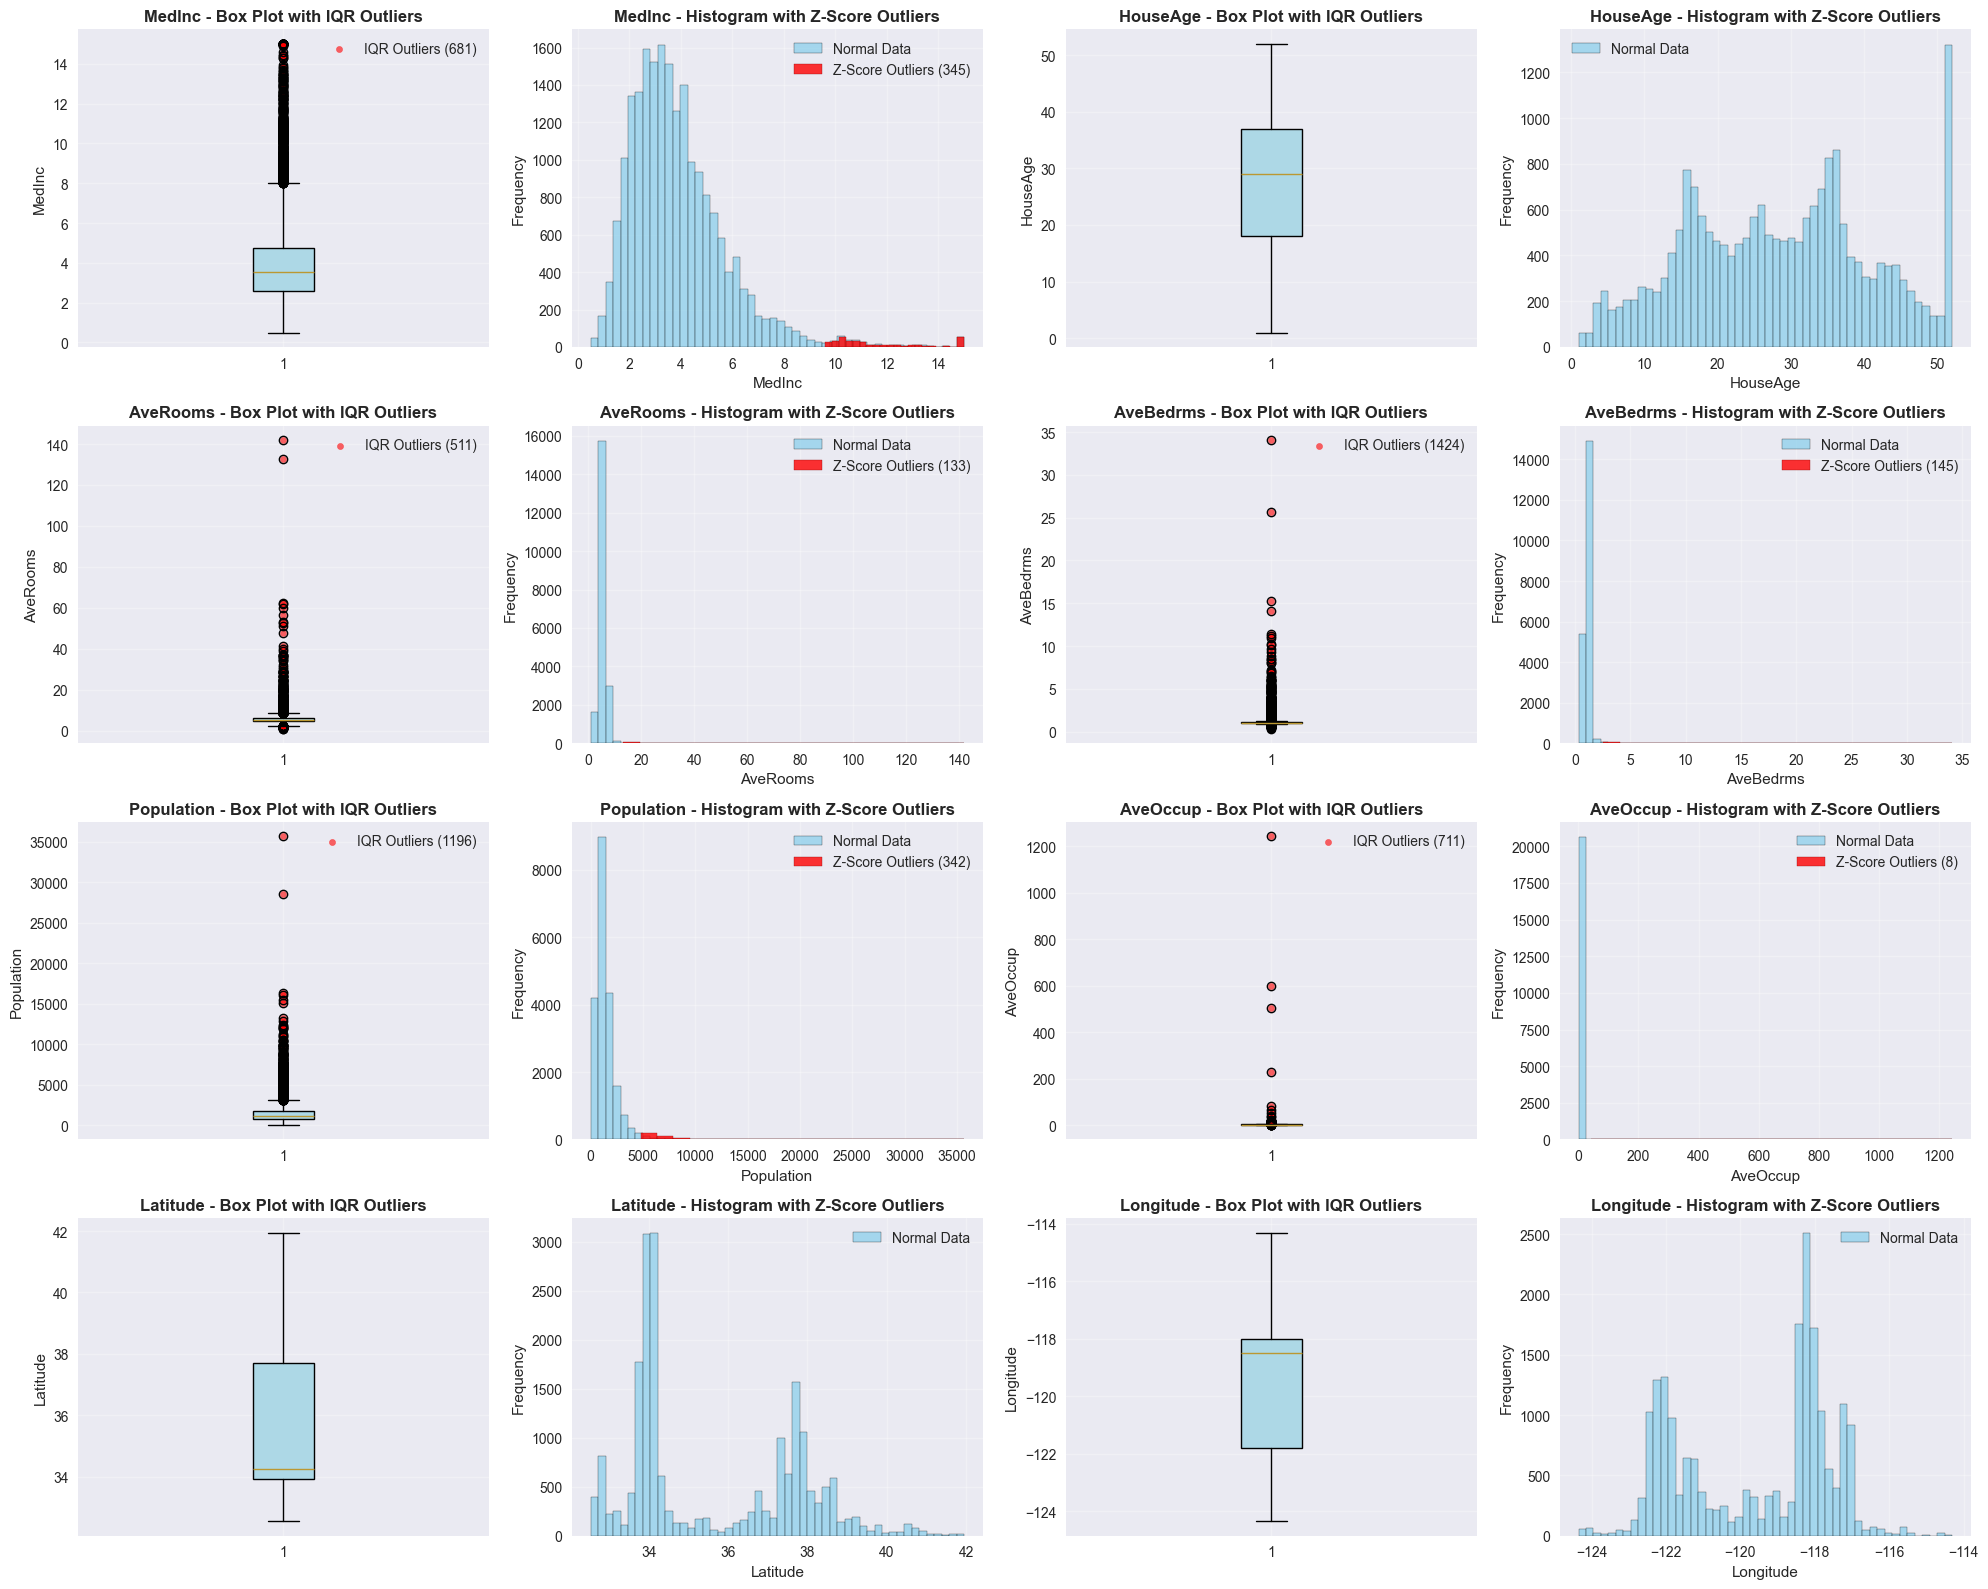


OUTLIER DETECTION SUMMARY TABLE

Feature      IQR Count  IQR %    Z-Score Count  Z-Score %  Overlap 
----------------------------------------------------------------------
MedInc       681        3.3      345            1.7        345     
HouseAge     0          0.0      0              0.0        0       
AveRooms     511        2.5      133            0.6        133     
AveBedrms    1424       6.9      145            0.7        145     
Population   1196       5.8      342            1.7        342     
AveOccup     711        3.4      8              0.0        8       
Latitude     0          0.0      0              0.0        0       
Longitude    0          0.0      0              0.0        0       

TARGET VARIABLE OUTLIER ANALYSIS

Target Variable (MedHouseVal) Outlier Analysis:
• IQR Method:    1071 outliers (  5.2%)
• Z-Score Method:    0 outliers (  0.0%)


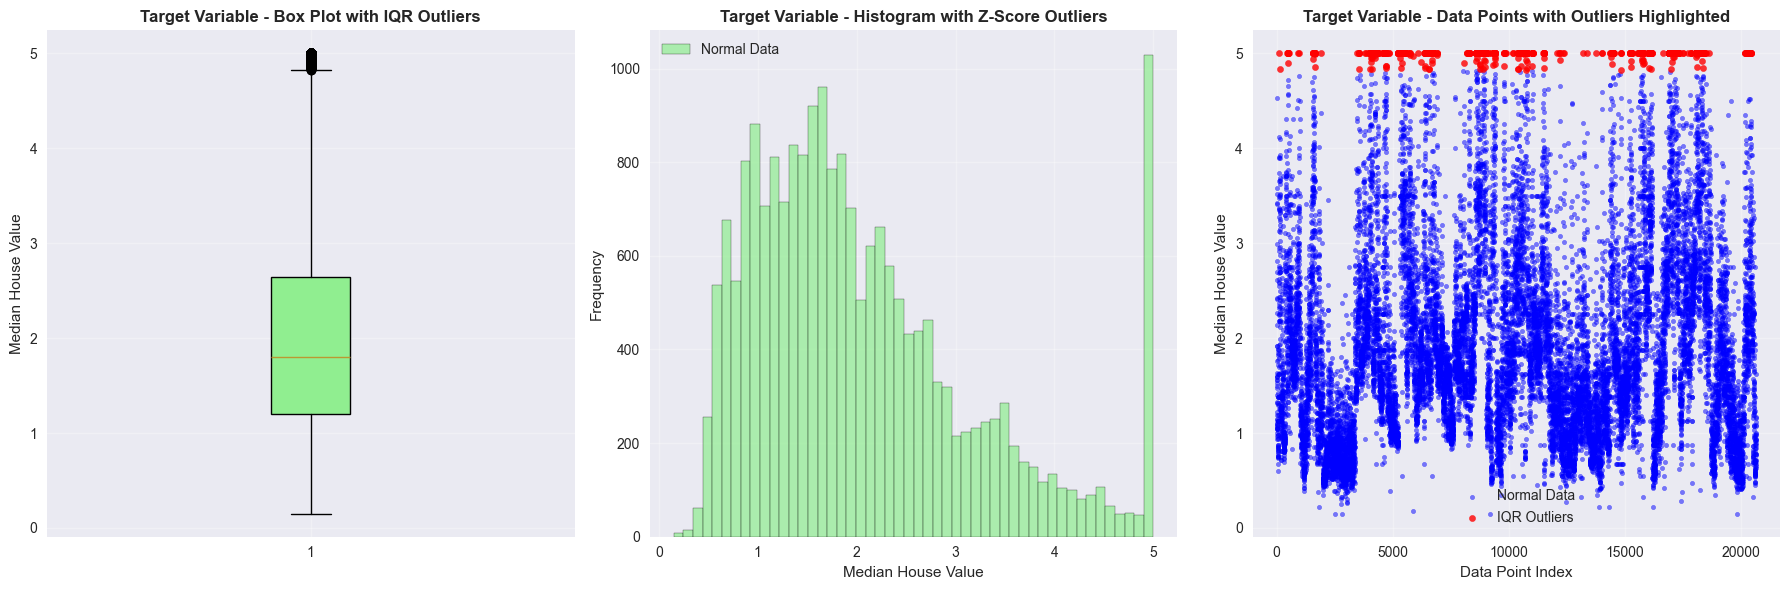


OUTLIER IMPACT ANALYSIS

Impact of outliers on data statistics:
--------------------------------------------------

MedInc:
  Original: Mean=3.871, Std=1.900
  Clean:    Mean=3.657, Std=1.488
  Change:   Mean=-5.5%, Std=-21.7%

HouseAge:
  Original: Mean=28.639, Std=12.586
  Clean:    Mean=28.639, Std=12.586
  Change:   Mean=+0.0%, Std=+0.0%

AveRooms:
  Original: Mean=5.429, Std=2.474
  Clean:    Mean=5.239, Std=1.154
  Change:   Mean=-3.5%, Std=-53.4%

AveBedrms:
  Original: Mean=1.097, Std=0.474
  Clean:    Mean=1.048, Std=0.066
  Change:   Mean=-4.4%, Std=-86.1%

Population:
  Original: Mean=1425.477, Std=1132.462
  Clean:    Mean=1226.546, Std=641.655
  Change:   Mean=-14.0%, Std=-43.3%

AveOccup:
  Original: Mean=3.071, Std=10.386
  Clean:    Mean=2.842, Std=0.627
  Change:   Mean=-7.5%, Std=-94.0%

Latitude:
  Original: Mean=35.632, Std=2.136
  Clean:    Mean=35.632, Std=2.136
  Change:   Mean=+0.0%, Std=+0.0%

Longitude:
  Original: Mean=-119.570, Std=2.004
  Clean:    Mean=-1

In [20]:
# =============================================================================
# OUTLIER DETECTION METHODS - IQR AND Z-SCORE
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# =============================================================================
# METHOD 1: IQR (INTERQUARTILE RANGE) OUTLIER DETECTION
# =============================================================================

def detect_outliers_iqr(data, column, factor=1.5):
    """
    Detect outliers using IQR method
    
    The IQR method considers values as outliers if they fall outside:
    - Lower bound: Q1 - (factor * IQR)
    - Upper bound: Q3 + (factor * IQR)
    
    Parameters:
    data: DataFrame - the dataset containing the column
    column: str - column name to check for outliers
    factor: float - IQR multiplier (default 1.5, standard statistical practice)
    
    Returns:
    Boolean series indicating outliers (True = outlier, False = normal)
    """
    
    # Calculate the first quartile (25th percentile)
    Q1 = data[column].quantile(0.25)
    
    # Calculate the third quartile (75th percentile)  
    Q3 = data[column].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    # IQR represents the range containing the middle 50% of the data
    IQR = Q3 - Q1
    
    # Calculate outlier boundaries
    # Standard practice uses 1.5 * IQR as the threshold
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Create boolean series: True for outliers, False for normal values
    # Outliers are values below lower_bound OR above upper_bound
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    return outliers

# =============================================================================
# METHOD 2: Z-SCORE OUTLIER DETECTION
# =============================================================================

def detect_outliers_zscore(data, column, threshold=3):
    """
    Detect outliers using Z-score method
    
    Z-score measures how many standard deviations a value is from the mean.
    Values with |Z-score| > threshold are considered outliers.
    
    Parameters:
    data: DataFrame - the dataset containing the column
    column: str - column name to check for outliers  
    threshold: float - Z-score threshold (default 3, meaning 3 standard deviations)
    
    Returns:
    Boolean series indicating outliers (True = outlier, False = normal)
    """
    
    # Calculate the mean of the column
    mean_val = data[column].mean()
    
    # Calculate the standard deviation of the column
    std_val = data[column].std()
    
    # Calculate Z-scores for all values in the column
    # Z-score = (value - mean) / standard_deviation
    z_scores = np.abs((data[column] - mean_val) / std_val)
    
    # Identify outliers: values with Z-score greater than threshold
    # abs() ensures we catch both positive and negative extreme values
    outliers = z_scores > threshold
    
    return outliers

# =============================================================================
# APPLY BOTH METHODS TO ALL NUMERICAL FEATURES
# =============================================================================

print("="*80)
print("OUTLIER DETECTION ANALYSIS")
print("="*80)

# Get all numerical columns (excluding target for now)
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Dictionary to store outlier results for each method
outlier_results = {}

print("\nOutlier Detection Results:")
print("-" * 50)

# Apply both methods to each numerical feature
for feature in numerical_features:
    print(f"\n📊 Feature: {feature}")
    
    # Method 1: IQR Detection
    iqr_outliers = detect_outliers_iqr(df, feature)
    iqr_count = iqr_outliers.sum()
    iqr_percentage = (iqr_count / len(df)) * 100
    
    # Method 2: Z-Score Detection  
    zscore_outliers = detect_outliers_zscore(df, feature)
    zscore_count = zscore_outliers.sum()
    zscore_percentage = (zscore_count / len(df)) * 100
    
    # Store results
    outlier_results[feature] = {
        'iqr_outliers': iqr_outliers,
        'zscore_outliers': zscore_outliers,
        'iqr_count': iqr_count,
        'zscore_count': zscore_count
    }
    
    # Print results
    print(f"  IQR Method:    {iqr_count:4d} outliers ({iqr_percentage:5.1f}%)")
    print(f"  Z-Score Method: {zscore_count:4d} outliers ({zscore_percentage:5.1f}%)")
    
    # Find overlap between methods
    overlap = (iqr_outliers & zscore_outliers).sum()
    print(f"  Overlap:       {overlap:4d} outliers detected by both methods")

# =============================================================================
# CREATE COMPREHENSIVE OUTLIER VISUALIZATIONS
# =============================================================================

print(f"\n" + "="*80)
print("OUTLIER VISUALIZATIONS")
print("="*80)

# Create visualization for each feature showing both methods
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    # Get outlier masks
    iqr_outliers = outlier_results[feature]['iqr_outliers']
    zscore_outliers = outlier_results[feature]['zscore_outliers']
    
    # Plot 1: Box plot with outliers highlighted
    ax1 = axes[i*2]
    
    # Create box plot
    bp = ax1.boxplot(df[feature], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    
    # Highlight IQR outliers
    iqr_outlier_values = df[feature][iqr_outliers]
    if len(iqr_outlier_values) > 0:
        ax1.scatter([1] * len(iqr_outlier_values), iqr_outlier_values, 
                   color='red', alpha=0.6, s=20, label=f'IQR Outliers ({len(iqr_outlier_values)})')
    
    ax1.set_title(f'{feature} - Box Plot with IQR Outliers', fontweight='bold')
    ax1.set_ylabel(feature)
    if len(iqr_outlier_values) > 0:
        ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Histogram with outliers highlighted
    ax2 = axes[i*2 + 1]
    
    # Plot histogram of all data
    ax2.hist(df[feature], bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Normal Data')
    
    # Highlight Z-score outliers
    zscore_outlier_values = df[feature][zscore_outliers]
    if len(zscore_outlier_values) > 0:
        ax2.hist(zscore_outlier_values, bins=20, alpha=0.8, color='red', 
                edgecolor='darkred', label=f'Z-Score Outliers ({len(zscore_outlier_values)})')
    
    ax2.set_title(f'{feature} - Histogram with Z-Score Outliers', fontweight='bold')
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# OUTLIER SUMMARY TABLE
# =============================================================================

print(f"\n" + "="*80)
print("OUTLIER DETECTION SUMMARY TABLE")
print("="*80)

print(f"\n{'Feature':<12} {'IQR Count':<10} {'IQR %':<8} {'Z-Score Count':<14} {'Z-Score %':<10} {'Overlap':<8}")
print("-" * 70)

for feature in numerical_features:
    iqr_count = outlier_results[feature]['iqr_count']
    zscore_count = outlier_results[feature]['zscore_count']
    iqr_percentage = (iqr_count / len(df)) * 100
    zscore_percentage = (zscore_count / len(df)) * 100
    
    # Calculate overlap
    overlap = (outlier_results[feature]['iqr_outliers'] & outlier_results[feature]['zscore_outliers']).sum()
    
    print(f"{feature:<12} {iqr_count:<10} {iqr_percentage:<8.1f} {zscore_count:<14} {zscore_percentage:<10.1f} {overlap:<8}")

# =============================================================================
# ANALYZE TARGET VARIABLE OUTLIERS
# =============================================================================

print(f"\n" + "="*80)
print("TARGET VARIABLE OUTLIER ANALYSIS")
print("="*80)

# Apply outlier detection to target variable
target_iqr_outliers = detect_outliers_iqr(df, 'MedHouseVal')
target_zscore_outliers = detect_outliers_zscore(df, 'MedHouseVal')

print(f"\nTarget Variable (MedHouseVal) Outlier Analysis:")
print(f"• IQR Method:    {target_iqr_outliers.sum():4d} outliers ({(target_iqr_outliers.sum()/len(df))*100:5.1f}%)")
print(f"• Z-Score Method: {target_zscore_outliers.sum():4d} outliers ({(target_zscore_outliers.sum()/len(df))*100:5.1f}%)")

# Visualize target variable outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot
bp = axes[0].boxplot(df['MedHouseVal'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
target_iqr_values = df['MedHouseVal'][target_iqr_outliers]
if len(target_iqr_values) > 0:
    axes[0].scatter([1] * len(target_iqr_values), target_iqr_values, 
                   color='red', alpha=0.6, s=30)
axes[0].set_title('Target Variable - Box Plot with IQR Outliers', fontweight='bold')
axes[0].set_ylabel('Median House Value')

# Histogram
axes[1].hist(df['MedHouseVal'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black', label='Normal Data')
target_zscore_values = df['MedHouseVal'][target_zscore_outliers]
if len(target_zscore_values) > 0:
    axes[1].hist(target_zscore_values, bins=20, alpha=0.8, color='red', 
                edgecolor='darkred', label=f'Z-Score Outliers ({len(target_zscore_values)})')
axes[1].set_title('Target Variable - Histogram with Z-Score Outliers', fontweight='bold')
axes[1].set_xlabel('Median House Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Scatter plot showing outliers in context
# Create index arrays for plotting
normal_data = ~(target_iqr_outliers | target_zscore_outliers)
all_indices = np.arange(len(df))  # Create array of indices

# Plot normal data points
normal_indices = all_indices[normal_data]
axes[2].scatter(normal_indices, df['MedHouseVal'][normal_data], 
               alpha=0.5, s=10, color='blue', label='Normal Data')

# Plot IQR outliers if they exist
if target_iqr_outliers.sum() > 0:
    iqr_indices = all_indices[target_iqr_outliers]
    axes[2].scatter(iqr_indices, df['MedHouseVal'][target_iqr_outliers], 
                   alpha=0.8, s=20, color='red', label='IQR Outliers')

# Plot Z-Score outliers if they exist  
if target_zscore_outliers.sum() > 0:
    zscore_indices = all_indices[target_zscore_outliers]
    axes[2].scatter(zscore_indices, df['MedHouseVal'][target_zscore_outliers], 
                   alpha=0.8, s=15, color='orange', marker='^', label='Z-Score Outliers')
axes[2].set_title('Target Variable - Data Points with Outliers Highlighted', fontweight='bold')
axes[2].set_xlabel('Data Point Index')
axes[2].set_ylabel('Median House Value')
axes[2].legend()

for ax in axes:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# OUTLIER IMPACT ANALYSIS
# =============================================================================

print(f"\n" + "="*80)
print("OUTLIER IMPACT ANALYSIS")
print("="*80)

# Calculate how outliers affect data statistics
print(f"\nImpact of outliers on data statistics:")
print("-" * 50)

for feature in numerical_features + ['MedHouseVal']:
    # Get outliers (using IQR method as example)
    if feature == 'MedHouseVal':
        outliers = target_iqr_outliers
    else:
        outliers = outlier_results[feature]['iqr_outliers']
    
    # Calculate statistics with and without outliers
    original_mean = df[feature].mean()
    original_std = df[feature].std()
    
    clean_data = df[feature][~outliers]
    clean_mean = clean_data.mean()
    clean_std = clean_data.std()
    
    mean_change = ((clean_mean - original_mean) / original_mean) * 100
    std_change = ((clean_std - original_std) / original_std) * 100
    
    print(f"\n{feature}:")
    print(f"  Original: Mean={original_mean:.3f}, Std={original_std:.3f}")
    print(f"  Clean:    Mean={clean_mean:.3f}, Std={clean_std:.3f}")
    print(f"  Change:   Mean={mean_change:+.1f}%, Std={std_change:+.1f}%")

print(f"\n" + "="*80)
print("OUTLIER DETECTION COMPLETED")

In [21]:
# =============================================================================
# OUTLIER ANALYSIS SUMMARY
# =============================================================================

analysis = """
I will be using IQR. My research reveals that IQR is better in cases of right-skew, such as we have now. IQR is also
less likely to false-flag legitimate extremes as outliers, and is less influenced by outliers themselves. Overall, IQR
seems much more appropriate for this dataset.
"""

print(analysis)


I will be using IQR. My research reveals that IQR is better in cases of right-skew, such as we have now. IQR is also
less likely to false-flag legitimate extremes as outliers, and is less influenced by outliers themselves. Overall, IQR
seems much more appropriate for this dataset.



OUTLIER REMOVAL USING IQR METHOD

📊 Original Dataset:
   • Shape: (20640, 9)
   • Total rows: 20,640

🔍 Identifying outliers using IQR method (factor=1.5):
------------------------------------------------------------
   MedInc      :  681 outliers (  3.3%)
   HouseAge    :    0 outliers (  0.0%)
   AveRooms    :  511 outliers (  2.5%)
   AveBedrms   : 1424 outliers (  6.9%)
   Population  : 1196 outliers (  5.8%)
   AveOccup    :  711 outliers (  3.4%)
   Latitude    :    0 outliers (  0.0%)
   Longitude   :    0 outliers (  0.0%)
   MedHouseVal : 1071 outliers (  5.2%)

📈 Outlier Summary:
   • Total rows with outliers: 4,328 (21.0%)
   • Rows to be removed: 4,328
   • Rows to be kept: 16,312

🗑️  Removing outliers...
   ✅ Outlier removal completed!

OUTLIER REMOVAL LOG

📋 Removal Statistics:
   • Original dataset size: 20,640 rows
   • Rows removed: 4,328 rows (20.97%)
   • Clean dataset size: 16,312 rows
   • Data retention rate: 79.03%

📊 Shape Comparison:
   • Original shape: (2064

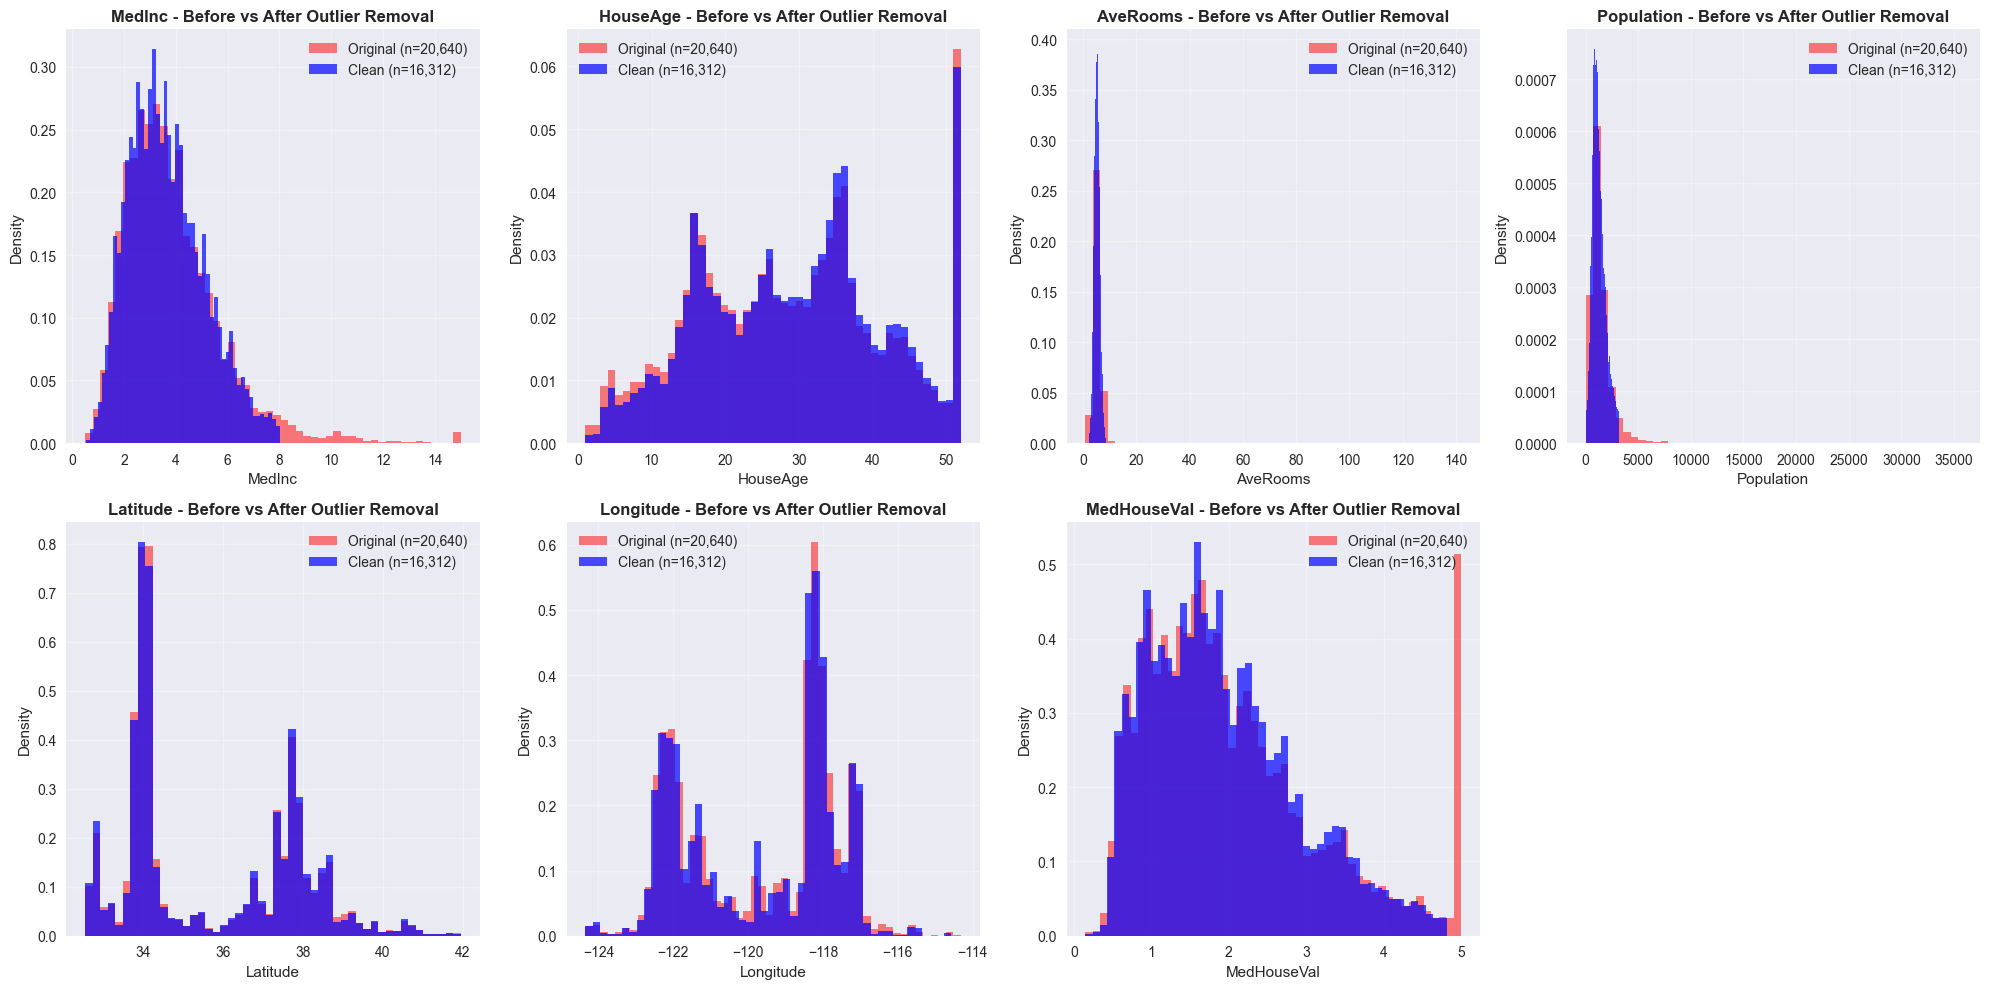


📝 Outlier Removal Report:

CALIFORNIA HOUSING DATASET - OUTLIER REMOVAL REPORT
Generated using IQR Method (factor=1.5)

SUMMARY:
--------
• Original dataset: 20,640 rows × 9 features
• Outliers removed: 4,328 rows (20.97%)
• Clean dataset: 16,312 rows × 9 features
• Data retention: 79.03%

FEATURE IMPACT:
--------------
• MedInc      :  681 outliers (  3.3%)
• HouseAge    :    0 outliers (  0.0%)
• AveRooms    :  511 outliers (  2.5%)
• AveBedrms   : 1424 outliers (  6.9%)
• Population  : 1196 outliers (  5.8%)
• AveOccup    :  711 outliers (  3.4%)
• Latitude    :    0 outliers (  0.0%)
• Longitude   :    0 outliers (  0.0%)
• MedHouseVal : 1071 outliers (  5.2%)

QUALITY ASSURANCE:
-----------------
• Missing values: 0
• Data types preserved: True
• Feature names preserved: True
• Dataset integrity: ✅ Verified

NEXT STEPS:
----------
• Clean dataset available as 'df_clean'
• Ready for feature engineering and modeling
• Consider validating model performance with/without outliers


OU

In [22]:
# =============================================================================
# REMOVE OUTLIERS USING IQR METHOD - CALIFORNIA HOUSING DATASET
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# OUTLIER REMOVAL USING IQR METHOD
# =============================================================================

print("="*80)
print("OUTLIER REMOVAL USING IQR METHOD")
print("="*80)

# Store original dataset information
original_shape = df.shape
original_count = len(df)

print(f"\n📊 Original Dataset:")
print(f"   • Shape: {original_shape}")
print(f"   • Total rows: {original_count:,}")

# =============================================================================
# IDENTIFY OUTLIERS IN ALL NUMERICAL FEATURES
# =============================================================================

# Define all numerical features (including target variable)
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 
                     'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

# Create a master outlier mask - will be True for any row containing outliers
master_outlier_mask = pd.Series([False] * len(df), index=df.index)

# Dictionary to store outlier information for each feature
outlier_summary = {}

print(f"\n🔍 Identifying outliers using IQR method (factor=1.5):")
print("-" * 60)

# Process each numerical feature
for feature in numerical_features:
    # Apply IQR outlier detection using our previously defined function
    feature_outliers = detect_outliers_iqr(df, feature, factor=1.5)
    
    # Count outliers for this feature
    outlier_count = feature_outliers.sum()
    outlier_percentage = (outlier_count / len(df)) * 100
    
    # Store summary information
    outlier_summary[feature] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'mask': feature_outliers
    }
    
    # Add to master outlier mask (OR operation - any outlier in any feature)
    master_outlier_mask = master_outlier_mask | feature_outliers
    
    # Log results for this feature
    print(f"   {feature:12}: {outlier_count:4d} outliers ({outlier_percentage:5.1f}%)")

# =============================================================================
# CALCULATE TOTAL OUTLIERS TO BE REMOVED
# =============================================================================

# Count total rows that contain outliers in any feature
total_outlier_rows = master_outlier_mask.sum()
outlier_row_percentage = (total_outlier_rows / len(df)) * 100

print(f"\n📈 Outlier Summary:")
print(f"   • Total rows with outliers: {total_outlier_rows:,} ({outlier_row_percentage:.1f}%)")
print(f"   • Rows to be removed: {total_outlier_rows:,}")
print(f"   • Rows to be kept: {len(df) - total_outlier_rows:,}")

# =============================================================================
# REMOVE OUTLIERS FROM DATASET
# =============================================================================

print(f"\n🗑️  Removing outliers...")

# Create clean dataset by keeping only rows without outliers
df_clean = df[~master_outlier_mask].copy()

# Reset index for clean dataset
df_clean.reset_index(drop=True, inplace=True)

# Calculate new dataset information
new_shape = df_clean.shape
new_count = len(df_clean)
rows_removed = original_count - new_count
removal_percentage = (rows_removed / original_count) * 100

print(f"   ✅ Outlier removal completed!")

# =============================================================================
# LOG REMOVAL STATISTICS
# =============================================================================

print(f"\n" + "="*80)
print("OUTLIER REMOVAL LOG")
print("="*80)

print(f"\n📋 Removal Statistics:")
print(f"   • Original dataset size: {original_count:,} rows")
print(f"   • Rows removed: {rows_removed:,} rows ({removal_percentage:.2f}%)")
print(f"   • Clean dataset size: {new_count:,} rows")
print(f"   • Data retention rate: {(new_count/original_count)*100:.2f}%")

print(f"\n📊 Shape Comparison:")
print(f"   • Original shape: {original_shape}")
print(f"   • Clean shape: {new_shape}")
print(f"   • Features unchanged: {original_shape[1] == new_shape[1]}")

# =============================================================================
# DETAILED FEATURE-WISE REMOVAL LOG
# =============================================================================

print(f"\n📋 Feature-wise Outlier Counts (before removal):")
print("-" * 60)
print(f"{'Feature':<12} {'Outliers':<10} {'Percentage':<12} {'Impact':<15}")
print("-" * 60)

for feature in numerical_features:
    count = outlier_summary[feature]['count']
    percentage = outlier_summary[feature]['percentage']
    
    # Determine impact level
    if percentage > 10:
        impact = "High"
    elif percentage > 5:
        impact = "Medium"
    elif percentage > 1:
        impact = "Low"
    else:
        impact = "Minimal"
    
    print(f"{feature:<12} {count:<10} {percentage:<12.1f} {impact:<15}")

# =============================================================================
# VERIFY DATA INTEGRITY
# =============================================================================

print(f"\n🔍 Data Integrity Check:")
print("-" * 30)

# Check for any remaining missing values
missing_values = df_clean.isnull().sum().sum()
print(f"   • Missing values: {missing_values}")

# Check data types are preserved
dtypes_preserved = (df.dtypes == df_clean.dtypes).all()
print(f"   • Data types preserved: {dtypes_preserved}")

# Check feature names are preserved
features_preserved = list(df.columns) == list(df_clean.columns)
print(f"   • Feature names preserved: {features_preserved}")

# Basic statistics comparison
print(f"\n📊 Statistical Changes (Original → Clean):")
print("-" * 50)

for feature in numerical_features:
    original_mean = df[feature].mean()
    clean_mean = df_clean[feature].mean()
    mean_change = ((clean_mean - original_mean) / original_mean) * 100
    
    original_std = df[feature].std()
    clean_std = df_clean[feature].std()
    std_change = ((clean_std - original_std) / original_std) * 100
    
    print(f"{feature:12}: Mean {mean_change:+6.1f}%, Std {std_change:+6.1f}%")

# =============================================================================
# VISUALIZATION: BEFORE vs AFTER COMPARISON
# =============================================================================

print(f"\n📊 Creating before/after visualizations...")

# Create comparison plots for key features
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Select key features for visualization
key_features = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'Latitude', 'Longitude', 'MedHouseVal']

for i, feature in enumerate(key_features):
    if i < len(axes):
        # Plot original data
        axes[i].hist(df[feature], bins=50, alpha=0.5, color='red', 
                    label=f'Original (n={len(df):,})', density=True)
        
        # Plot clean data
        axes[i].hist(df_clean[feature], bins=50, alpha=0.7, color='blue', 
                    label=f'Clean (n={len(df_clean):,})', density=True)
        
        axes[i].set_title(f'{feature} - Before vs After Outlier Removal', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Remove empty subplot
if len(key_features) < len(axes):
    axes[-1].remove()

plt.tight_layout()
plt.show()

# =============================================================================
# SAVE OUTLIER REMOVAL REPORT
# =============================================================================

print(f"\n📝 Outlier Removal Report:")
print("="*50)

report = f"""
CALIFORNIA HOUSING DATASET - OUTLIER REMOVAL REPORT
Generated using IQR Method (factor=1.5)

SUMMARY:
--------
• Original dataset: {original_count:,} rows × {original_shape[1]} features
• Outliers removed: {rows_removed:,} rows ({removal_percentage:.2f}%)
• Clean dataset: {new_count:,} rows × {new_shape[1]} features
• Data retention: {(new_count/original_count)*100:.2f}%

FEATURE IMPACT:
--------------"""

for feature in numerical_features:
    count = outlier_summary[feature]['count']
    percentage = outlier_summary[feature]['percentage']
    report += f"\n• {feature:12}: {count:4d} outliers ({percentage:5.1f}%)"

report += f"""

QUALITY ASSURANCE:
-----------------
• Missing values: {missing_values}
• Data types preserved: {dtypes_preserved}
• Feature names preserved: {features_preserved}
• Dataset integrity: ✅ Verified

NEXT STEPS:
----------
• Clean dataset available as 'df_clean'
• Ready for feature engineering and modeling
• Consider validating model performance with/without outliers
"""

print(report)

# =============================================================================
# FINAL CONFIRMATION
# =============================================================================

print(f"\n" + "="*80)
print("OUTLIER REMOVAL COMPLETED SUCCESSFULLY")
print("="*80)

print(f"\n✅ Key Results:")
print(f"   • {rows_removed:,} outlier rows removed ({removal_percentage:.2f}%)")
print(f"   • {new_count:,} clean rows remaining ({(new_count/original_count)*100:.2f}% retained)")
print(f"   • Clean dataset available as 'df_clean'")
print(f"   • Original dataset preserved as 'df'")

print(f"\n🎯 Dataset Status:")
print(f"   • df        → Original dataset ({len(df):,} rows)")
print(f"   • df_clean  → Clean dataset ({len(df_clean):,} rows)")
print(f"   • Ready for next analysis steps!")

FEATURE ENGINEERING - CALIFORNIA HOUSING DATASET

📊 Starting Feature Engineering:
   • Original features: 9
   • Dataset size: 16,312 rows

1. CREATING RATIO FEATURES

🔢 Creating ratio features from existing variables...
   ✅ rooms_per_household = AveRooms / AveOccup
      Range: 0.50 to 3.97
      Mean: 1.88
   ✅ bedrooms_per_room = AveBedrms / AveRooms
      Range: 0.12 to 0.56
      Mean: 0.21
   ✅ population_per_household = Population / AveOccup
      Range: 2 to 2051
      Mean: 456

🔍 Data Quality Check for Ratio Features:
   • rooms_per_household: 0 infinite values, 0 NaN values
   • bedrooms_per_room: 0 infinite values, 0 NaN values
   • population_per_household: 0 infinite values, 0 NaN values

2. CREATING GEOGRAPHIC FEATURES

🗺️ Creating geographic features using coordinate calculations...
   ✅ distance_to_LA calculated using Haversine formula
      Range: 0.4 to 1018.3 km
      Mean: 274.3 km
   ✅ distance_to_SF calculated using Haversine formula
      Range: 0.5 to 899.3 km

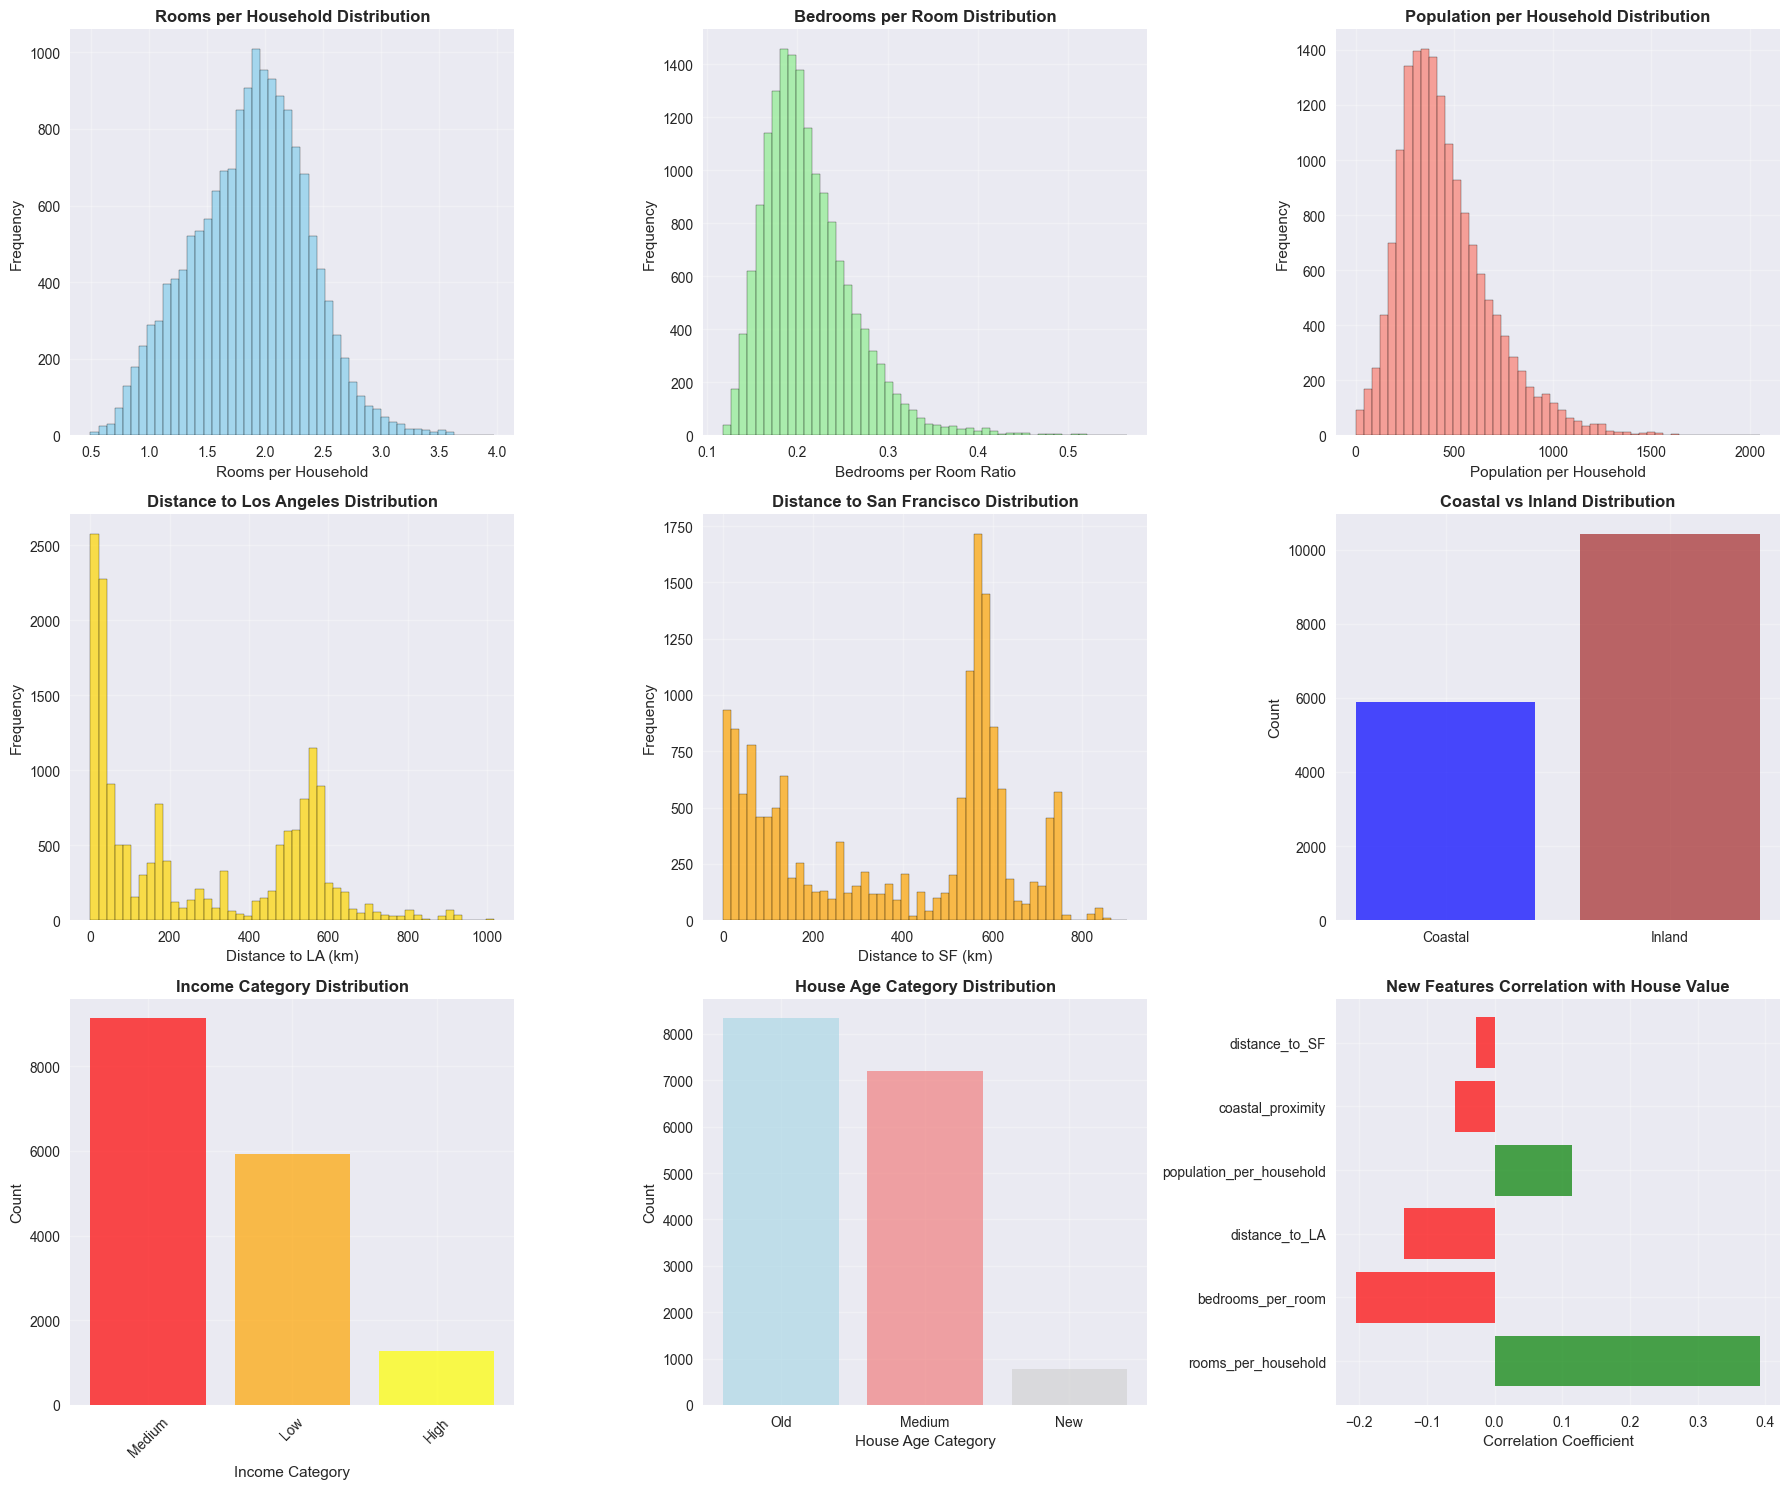


📊 Correlation Analysis of New Features with Target:
------------------------------------------------------------
Feature                   Correlation  Strength
--------------------------------------------------
rooms_per_household          0.392     Moderate
bedrooms_per_room           -0.205     Weak
distance_to_LA              -0.133     Weak
population_per_household     0.115     Weak
coastal_proximity           -0.059     Very Weak
distance_to_SF              -0.027     Very Weak

FEATURE ENGINEERING COMPLETED

✅ Engineering Results:
   • Dataset shape: (16312, 17)
   • New features created: 8
   • Total features: 17
   • No missing values in new features: True

🎯 Dataset Status:
   • df_clean      → Clean dataset (16,312 rows, 9 features)
   • df_engineered → Engineered dataset (16,312 rows, 17 features)

📋 Sample of Engineered Dataset:
   rooms_per_household  bedrooms_per_room  population_per_household  \
0                2.958              0.130                     177.0   
1 

In [23]:
# =============================================================================
# FEATURE ENGINEERING - CALIFORNIA HOUSING DATASET
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("FEATURE ENGINEERING - CALIFORNIA HOUSING DATASET")
print("="*80)

# Create a copy of the clean dataset for feature engineering
# This preserves the original clean dataset
df_engineered = df_clean.copy()

print(f"\n📊 Starting Feature Engineering:")
print(f"   • Original features: {len(df_clean.columns)}")
print(f"   • Dataset size: {len(df_clean):,} rows")

# =============================================================================
# 1. RATIO FEATURES
# =============================================================================

print(f"\n" + "="*60)
print("1. CREATING RATIO FEATURES")
print("="*60)

print(f"\n🔢 Creating ratio features from existing variables...")

# Feature 1: Rooms per Household
# This shows the average number of rooms available per household
# Higher values indicate more spacious living conditions
df_engineered['rooms_per_household'] = df_engineered['AveRooms'] / df_engineered['AveOccup']

print(f"   ✅ rooms_per_household = AveRooms / AveOccup")
print(f"      Range: {df_engineered['rooms_per_household'].min():.2f} to {df_engineered['rooms_per_household'].max():.2f}")
print(f"      Mean: {df_engineered['rooms_per_household'].mean():.2f}")

# Feature 2: Bedrooms per Room  
# This shows what proportion of rooms are bedrooms
# Values closer to 1 indicate most rooms are bedrooms (less common areas)
# Values closer to 0 indicate more living space relative to bedrooms
df_engineered['bedrooms_per_room'] = df_engineered['AveBedrms'] / df_engineered['AveRooms']

print(f"   ✅ bedrooms_per_room = AveBedrms / AveRooms")
print(f"      Range: {df_engineered['bedrooms_per_room'].min():.2f} to {df_engineered['bedrooms_per_room'].max():.2f}")
print(f"      Mean: {df_engineered['bedrooms_per_room'].mean():.2f}")

# Feature 3: Population per Household
# This shows how many people live in the area relative to households
# Higher values indicate denser population or larger household sizes
df_engineered['population_per_household'] = df_engineered['Population'] / df_engineered['AveOccup']

print(f"   ✅ population_per_household = Population / AveOccup")
print(f"      Range: {df_engineered['population_per_household'].min():.0f} to {df_engineered['population_per_household'].max():.0f}")
print(f"      Mean: {df_engineered['population_per_household'].mean():.0f}")

# Handle any potential division by zero or infinite values
# Check for any problematic values that might have been created
infinite_values = np.isinf(df_engineered[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']]).sum()
print(f"\n🔍 Data Quality Check for Ratio Features:")
for col in ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']:
    inf_count = np.isinf(df_engineered[col]).sum()
    nan_count = df_engineered[col].isnull().sum()
    print(f"   • {col}: {inf_count} infinite values, {nan_count} NaN values")

# =============================================================================
# 2. GEOGRAPHIC FEATURES  
# =============================================================================

print(f"\n" + "="*60)
print("2. CREATING GEOGRAPHIC FEATURES")
print("="*60)

print(f"\n🗺️ Creating geographic features using coordinate calculations...")

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    
    Returns distance in kilometers
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371  # Radius of earth in kilometers
    
    return c * r

# Los Angeles coordinates: 34.0522°N, 118.2437°W
LA_LAT, LA_LON = 34.0522, -118.2437

# San Francisco coordinates: 37.7749°N, 122.4194°W  
SF_LAT, SF_LON = 37.7749, -122.4194

# Feature 4: Distance to Los Angeles
# Calculate straight-line distance from each location to LA
# Useful because LA is a major economic center affecting housing prices
df_engineered['distance_to_LA'] = haversine_distance(
    df_engineered['Latitude'], 
    df_engineered['Longitude'],
    LA_LAT, 
    LA_LON
)

print(f"   ✅ distance_to_LA calculated using Haversine formula")
print(f"      Range: {df_engineered['distance_to_LA'].min():.1f} to {df_engineered['distance_to_LA'].max():.1f} km")
print(f"      Mean: {df_engineered['distance_to_LA'].mean():.1f} km")

# Feature 5: Distance to San Francisco
# Calculate straight-line distance from each location to SF
# SF Bay Area is another major economic center with high housing costs
df_engineered['distance_to_SF'] = haversine_distance(
    df_engineered['Latitude'], 
    df_engineered['Longitude'],
    SF_LAT, 
    SF_LON
)

print(f"   ✅ distance_to_SF calculated using Haversine formula")
print(f"      Range: {df_engineered['distance_to_SF'].min():.1f} to {df_engineered['distance_to_SF'].max():.1f} km")
print(f"      Mean: {df_engineered['distance_to_SF'].mean():.1f} km")

# Feature 6: Coastal Proximity
# Binary feature indicating whether location is near the coast
# Longitude > -121 generally indicates inland areas
# Longitude <= -121 generally indicates coastal areas
df_engineered['coastal_proximity'] = (df_engineered['Longitude'] > -121).astype(int)

coastal_count = df_engineered['coastal_proximity'].sum()
inland_count = len(df_engineered) - coastal_count

print(f"   ✅ coastal_proximity created (1=inland, 0=coastal)")
print(f"      Coastal areas (longitude <= -121): {inland_count:,} locations ({inland_count/len(df_engineered)*100:.1f}%)")
print(f"      Inland areas (longitude > -121): {coastal_count:,} locations ({coastal_count/len(df_engineered)*100:.1f}%)")

# =============================================================================
# 3. CATEGORICAL FEATURES
# =============================================================================

print(f"\n" + "="*60)
print("3. CREATING CATEGORICAL FEATURES")
print("="*60)

print(f"\n📊 Creating categorical features from continuous variables...")

# Feature 7: Income Category
# Convert continuous income into meaningful categorical brackets
# Based on MedInc which is in tens of thousands of dollars
def categorize_income(income):
    """
    Categorize income based on median income levels
    income is in tens of thousands of dollars
    """
    if income < 3:
        return 'Low'
    elif income < 6:
        return 'Medium' 
    elif income < 9:
        return 'High'
    else:
        return 'Very High'

# Apply income categorization
df_engineered['income_category'] = df_engineered['MedInc'].apply(categorize_income)

# Count distribution of income categories
income_counts = df_engineered['income_category'].value_counts()
print(f"   ✅ income_category created based on MedInc ranges:")
print(f"      • Low (<$30K):        {income_counts.get('Low', 0):,} areas ({income_counts.get('Low', 0)/len(df_engineered)*100:.1f}%)")
print(f"      • Medium ($30K-60K):  {income_counts.get('Medium', 0):,} areas ({income_counts.get('Medium', 0)/len(df_engineered)*100:.1f}%)")
print(f"      • High ($60K-90K):    {income_counts.get('High', 0):,} areas ({income_counts.get('High', 0)/len(df_engineered)*100:.1f}%)")
print(f"      • Very High ($90K+):  {income_counts.get('Very High', 0):,} areas ({income_counts.get('Very High', 0)/len(df_engineered)*100:.1f}%)")

# Feature 8: House Age Category
# Convert continuous house age into meaningful categorical brackets
def categorize_house_age(age):
    """
    Categorize house age based on construction periods
    age is in years
    """
    if age < 10:
        return 'New'
    elif age < 30:
        return 'Medium'
    else:
        return 'Old'

# Apply house age categorization  
df_engineered['house_age_category'] = df_engineered['HouseAge'].apply(categorize_house_age)

# Count distribution of house age categories
age_counts = df_engineered['house_age_category'].value_counts()
print(f"   ✅ house_age_category created based on HouseAge ranges:")
print(f"      • New (<10 years):    {age_counts.get('New', 0):,} areas ({age_counts.get('New', 0)/len(df_engineered)*100:.1f}%)")
print(f"      • Medium (10-30 years): {age_counts.get('Medium', 0):,} areas ({age_counts.get('Medium', 0)/len(df_engineered)*100:.1f}%)")
print(f"      • Old (30+ years):    {age_counts.get('Old', 0):,} areas ({age_counts.get('Old', 0)/len(df_engineered)*100:.1f}%)")

# =============================================================================
# FEATURE ENGINEERING SUMMARY
# =============================================================================

print(f"\n" + "="*80)
print("FEATURE ENGINEERING SUMMARY")
print("="*80)

# Calculate new feature counts
original_features = len(df_clean.columns)
new_features = len(df_engineered.columns) - original_features
total_features = len(df_engineered.columns)

print(f"\n📈 Feature Count Summary:")
print(f"   • Original features: {original_features}")
print(f"   • New features added: {new_features}")
print(f"   • Total features: {total_features}")

print(f"\n🔧 New Features Created:")
new_feature_list = [
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
    'distance_to_LA', 'distance_to_SF', 'coastal_proximity',
    'income_category', 'house_age_category'
]

for i, feature in enumerate(new_feature_list, 1):
    print(f"   {i}. {feature}")

# =============================================================================
# DATA QUALITY CHECK FOR NEW FEATURES
# =============================================================================

print(f"\n🔍 Data Quality Check for New Features:")
print("-" * 50)

# Check for missing values in new features
for feature in new_feature_list:
    missing_count = df_engineered[feature].isnull().sum()
    data_type = df_engineered[feature].dtype
    unique_count = df_engineered[feature].nunique()
    
    print(f"   • {feature:22}: {missing_count} missing, {unique_count:4d} unique values, dtype: {data_type}")

# =============================================================================
# VISUALIZATION OF NEW FEATURES
# =============================================================================

print(f"\n📊 Creating visualizations for new features...")

# Create visualizations for the new features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Plot 1: Rooms per Household
axes[0].hist(df_engineered['rooms_per_household'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Rooms per Household Distribution', fontweight='bold')
axes[0].set_xlabel('Rooms per Household')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Plot 2: Bedrooms per Room
axes[1].hist(df_engineered['bedrooms_per_room'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('Bedrooms per Room Distribution', fontweight='bold')
axes[1].set_xlabel('Bedrooms per Room Ratio')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Plot 3: Population per Household
axes[2].hist(df_engineered['population_per_household'], bins=50, alpha=0.7, color='salmon', edgecolor='black')
axes[2].set_title('Population per Household Distribution', fontweight='bold')
axes[2].set_xlabel('Population per Household')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

# Plot 4: Distance to LA
axes[3].hist(df_engineered['distance_to_LA'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[3].set_title('Distance to Los Angeles Distribution', fontweight='bold')
axes[3].set_xlabel('Distance to LA (km)')
axes[3].set_ylabel('Frequency')
axes[3].grid(True, alpha=0.3)

# Plot 5: Distance to SF
axes[4].hist(df_engineered['distance_to_SF'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[4].set_title('Distance to San Francisco Distribution', fontweight='bold')
axes[4].set_xlabel('Distance to SF (km)')
axes[4].set_ylabel('Frequency')
axes[4].grid(True, alpha=0.3)

# Plot 6: Coastal Proximity
coastal_counts = df_engineered['coastal_proximity'].value_counts()
axes[5].bar(['Coastal', 'Inland'], [coastal_counts[0], coastal_counts[1]], 
           color=['blue', 'brown'], alpha=0.7)
axes[5].set_title('Coastal vs Inland Distribution', fontweight='bold')
axes[5].set_ylabel('Count')
axes[5].grid(True, alpha=0.3)

# Plot 7: Income Category
income_counts = df_engineered['income_category'].value_counts()
axes[6].bar(income_counts.index, income_counts.values, 
           color=['red', 'orange', 'yellow', 'green'], alpha=0.7)
axes[6].set_title('Income Category Distribution', fontweight='bold')
axes[6].set_xlabel('Income Category')
axes[6].set_ylabel('Count')
axes[6].tick_params(axis='x', rotation=45)
axes[6].grid(True, alpha=0.3)

# Plot 8: House Age Category  
age_counts = df_engineered['house_age_category'].value_counts()
axes[7].bar(age_counts.index, age_counts.values,
           color=['lightblue', 'lightcoral', 'lightgray'], alpha=0.7)
axes[7].set_title('House Age Category Distribution', fontweight='bold')
axes[7].set_xlabel('House Age Category')
axes[7].set_ylabel('Count')
axes[7].grid(True, alpha=0.3)

# Plot 9: New Features vs Target Correlation
new_numerical_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household',
                         'distance_to_LA', 'distance_to_SF', 'coastal_proximity']
correlations = []
feature_names = []

for feature in new_numerical_features:
    corr = df_engineered[feature].corr(df_engineered['MedHouseVal'])
    correlations.append(corr)
    feature_names.append(feature)

# Sort by absolute correlation
sorted_data = sorted(zip(feature_names, correlations), key=lambda x: abs(x[1]), reverse=True)
sorted_names, sorted_corrs = zip(*sorted_data)

colors = ['red' if corr < 0 else 'green' for corr in sorted_corrs]
axes[8].barh(range(len(sorted_names)), sorted_corrs, color=colors, alpha=0.7)
axes[8].set_yticks(range(len(sorted_names)))
axes[8].set_yticklabels(sorted_names)
axes[8].set_title('New Features Correlation with House Value', fontweight='bold')
axes[8].set_xlabel('Correlation Coefficient')
axes[8].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# CORRELATION ANALYSIS OF NEW FEATURES
# =============================================================================

print(f"\n📊 Correlation Analysis of New Features with Target:")
print("-" * 60)

# Calculate correlations with target variable
target_correlations = {}
for feature in new_numerical_features:
    corr = df_engineered[feature].corr(df_engineered['MedHouseVal'])
    target_correlations[feature] = corr

# Sort by absolute correlation strength
sorted_correlations = sorted(target_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print(f"{'Feature':<25} {'Correlation':<12} {'Strength'}")
print("-" * 50)

for feature, corr in sorted_correlations:
    if abs(corr) > 0.5:
        strength = "Strong"
    elif abs(corr) > 0.3:
        strength = "Moderate"  
    elif abs(corr) > 0.1:
        strength = "Weak"
    else:
        strength = "Very Weak"
    
    print(f"{feature:<25} {corr:>8.3f}     {strength}")

# =============================================================================
# FINAL DATASET INFORMATION
# =============================================================================

print(f"\n" + "="*80)
print("FEATURE ENGINEERING COMPLETED")
print("="*80)

print(f"\n✅ Engineering Results:")
print(f"   • Dataset shape: {df_engineered.shape}")
print(f"   • New features created: {new_features}")
print(f"   • Total features: {total_features}")
print(f"   • No missing values in new features: {df_engineered[new_feature_list].isnull().sum().sum() == 0}")

print(f"\n🎯 Dataset Status:")
print(f"   • df_clean      → Clean dataset ({len(df_clean):,} rows, {len(df_clean.columns)} features)")
print(f"   • df_engineered → Engineered dataset ({len(df_engineered):,} rows, {len(df_engineered.columns)} features)")

# Display the first few rows of the engineered dataset to verify
print(f"\n📋 Sample of Engineered Dataset:")
print(df_engineered[new_feature_list].head())

In [24]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points
    
    Parameters:
    point1, point2: numpy arrays of equal length
    
    Returns:
    float: Euclidean distance
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

def manhattan_distance(point1, point2):
    """
    Calculate Manhattan distance between two points
    
    Parameters:
    point1, point2: numpy arrays of equal length
    
    Returns:
    float: Manhattan distance  
    """
    return np.sum(np.abs(point1 - point2))

def minkowski_distance(point1, point2, p=2):
    """
    Calculate Minkowski distance between two points
    
    Parameters:
    point1, point2: numpy arrays of equal length
    p: parameter (p=1 gives Manhattan, p=2 gives Euclidean)
    
    Returns:
    float: Minkowski distance
    """
    return np.sum(np.abs(point1 - point2) ** p) ** (1/p)

In [25]:
import numpy as np

class CustomKNN:
    def __init__(self, k=5, distance_metric='euclidean', weights='uniform'):
        """
        Custom k-NN implementation
        
        Parameters:
        k: number of neighbors
        distance_metric: 'euclidean', 'manhattan', or 'minkowski'
        weights: 'uniform' or 'distance'
        """
        self.k = k
        self.distance_metric = distance_metric
        self.weights = weights
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """
        Store training data
        
        Parameters:
        X: training features
        y: training targets
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def _calculate_distance(self, point1, point2):
        """
        Calculate distance based on selected metric
        
        Parameters:
        point1, point2: numpy arrays
        
        Returns:
        float: distance between points
        """
        if self.distance_metric == 'euclidean':
            return euclidean_distance(point1, point2)
        elif self.distance_metric == 'manhattan':
            return manhattan_distance(point1, point2)
        elif self.distance_metric == 'minkowski':
            return minkowski_distance(point1, point2, p=2)
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")
    
    def _get_neighbors(self, test_point):
        """
        Find k nearest neighbors for a test point
        
        Parameters:
        test_point: single test sample
        
        Returns:
        numpy array: indices of k nearest neighbors
        """
        # Calculate distances to all training points
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(test_point, train_point)
            distances.append((dist, i))
        
        # Sort by distance and get k nearest
        distances.sort(key=lambda x: x[0])
        neighbor_indices = [idx for _, idx in distances[:self.k]]
        
        return np.array(neighbor_indices)
    
    def predict_single(self, test_point):
        """
        Predict for a single test point
        
        Parameters:
        test_point: single test sample
        
        Returns:
        float: predicted value
        """
        if self.X_train is None:
            raise ValueError("Model must be fitted before making predictions")
        
        # Get k nearest neighbors
        neighbor_indices = self._get_neighbors(test_point)
        neighbor_values = self.y_train[neighbor_indices]
        
        if self.weights == 'uniform':
            # Simple average
            return np.mean(neighbor_values)
        
        elif self.weights == 'distance':
            # Distance-weighted average
            distances = []
            for idx in neighbor_indices:
                dist = self._calculate_distance(test_point, self.X_train[idx])
                distances.append(dist)
            
            distances = np.array(distances)
            
            # Handle case where distance is 0 (exact match)
            if np.any(distances == 0):
                zero_indices = np.where(distances == 0)[0]
                return np.mean(neighbor_values[zero_indices])
            
            # Calculate weights (inverse of distance)
            weights = 1 / distances
            weights = weights / np.sum(weights)  # Normalize
            
            return np.sum(weights * neighbor_values)
        
        else:
            raise ValueError(f"Unknown weighting method: {self.weights}")
    
    def predict(self, X_test):
        """
        Predict for multiple test points
        
        Parameters:
        X_test: test features
        
        Returns:
        numpy array: predictions
        """
        X_test = np.array(X_test)
        predictions = []
        
        for test_point in X_test:
            pred = self.predict_single(test_point)
            predictions.append(pred)
        
        return np.array(predictions)
    
    def score(self, X_test, y_test):
        """
        Calculate R-squared score
        
        Parameters:
        X_test: test features
        y_test: true test targets
        
        Returns:
        float: R-squared score
        """
        y_pred = self.predict(X_test)
        y_test = np.array(y_test)
        
        # Calculate R-squared
        ss_res = np.sum((y_test - y_pred) ** 2)
        ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
        
        # Handle edge case where ss_tot is 0
        if ss_tot == 0:
            return 1.0 if ss_res == 0 else 0.0
        
        return 1 - (ss_res / ss_tot)

In [26]:

# =============================================================================
# TRAIN-TEST SPLIT AND FEATURE SCALING
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np

print("="*60)
print("TRAIN-TEST SPLIT AND FEATURE SCALING")
print("="*60)

# =============================================================================
# PREPARE DATA FOR MODELING
# =============================================================================

# Separate features and target from df_engineered
# Exclude categorical features for K-NN (need numerical features only)
categorical_features = ['income_category', 'house_age_category']
X = df_engineered.drop(['MedHouseVal'] + categorical_features, axis=1)
y = df_engineered['MedHouseVal']

print(f"\n📊 Dataset Preparation:")
print(f"   • Features shape: {X.shape}")
print(f"   • Target shape: {y.shape}")
print(f"   • Features used: {X.columns.tolist()}")

# =============================================================================
# TRAIN-TEST SPLIT (80/20)
# =============================================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

print(f"\n🔄 Train-Test Split (80/20):")
print(f"   • Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# =============================================================================
# SCALING COMPARISON: StandardScaler vs MinMaxScaler
# =============================================================================

print(f"\n⚖️ Comparing Scaling Methods:")
print("-" * 50)

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit scalers on training data only (prevent data leakage)
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Analyze scaling effects
print(f"\n📈 Original Data Statistics (Training Set):")
print(f"   • Mean range: {X_train.mean().min():.2f} to {X_train.mean().max():.2f}")
print(f"   • Std range: {X_train.std().min():.2f} to {X_train.std().max():.2f}")
print(f"   • Min range: {X_train.min().min():.2f} to {X_train.min().max():.2f}")
print(f"   • Max range: {X_train.max().min():.2f} to {X_train.max().max():.2f}")

print(f"\n🎯 StandardScaler Results:")
X_train_standard_df = pd.DataFrame(X_train_standard, columns=X.columns)
print(f"   • Mean range: {X_train_standard_df.mean().min():.2f} to {X_train_standard_df.mean().max():.2f}")
print(f"   • Std range: {X_train_standard_df.std().min():.2f} to {X_train_standard_df.std().max():.2f}")

print(f"\n🎯 MinMaxScaler Results:")
X_train_minmax_df = pd.DataFrame(X_train_minmax, columns=X.columns)
print(f"   • Min range: {X_train_minmax_df.min().min():.2f} to {X_train_minmax_df.min().max():.2f}")
print(f"   • Max range: {X_train_minmax_df.max().min():.2f} to {X_train_minmax_df.max().max():.2f}")

TRAIN-TEST SPLIT AND FEATURE SCALING

📊 Dataset Preparation:
   • Features shape: (16312, 14)
   • Target shape: (16312,)
   • Features used: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'distance_to_LA', 'distance_to_SF', 'coastal_proximity']

🔄 Train-Test Split (80/20):
   • Training set: 13,049 samples (80.0%)
   • Test set: 3,263 samples (20.0%)

⚖️ Comparing Scaling Methods:
--------------------------------------------------

📈 Original Data Statistics (Training Set):
   • Mean range: -119.64 to 1269.77
   • Std range: 0.05 to 626.07
   • Min range: -124.30 to 32.56
   • Max range: -114.57 to 3132.00

🎯 StandardScaler Results:
   • Mean range: -0.00 to 0.00
   • Std range: 1.00 to 1.00

🎯 MinMaxScaler Results:
   • Min range: 0.00 to 0.00
   • Max range: 1.00 to 1.00


In [43]:
# =============================================================================
# MANUAL K-NN WALKTHROUGH USING CURRENT DATA
# =============================================================================

import numpy as np
from sklearn.neighbors import KNeighborsRegressor

print("="*80)
print("MANUAL K-NN WALKTHROUGH: STEP-BY-STEP PROCESS")
print("="*80)

print(f"📊 Current Data Info:")
print(f"   • Training set: {X_train_scaled.shape}")
print(f"   • Test set: {X_test_scaled.shape}")
print(f"   • This is synthetic data from curse of dimensionality demo")

# =============================================================================
# 1. SELECT A TEST POINT
# =============================================================================

print(f"\n🎯 1. SELECTING A TEST POINT")
print("-" * 50)

# Select the first test point
test_idx = 0
test_point = X_test_scaled[test_idx]
test_actual = y_test[test_idx]

print(f"Selected test point index: {test_idx}")
print(f"Test point features (first 8 of {len(test_point)} dimensions):")
for i in range(min(8, len(test_point))):
    print(f"   Feature {i+1:2d}: {test_point[i]:8.4f}")
if len(test_point) > 8:
    print(f"   ... and {len(test_point)-8} more features")

print(f"\nActual target value: {test_actual:.4f}")

# =============================================================================
# 2. MANUAL DISTANCE CALCULATIONS (FIRST 10)
# =============================================================================

print(f"\n📏 2. CALCULATING DISTANCES TO TRAINING POINTS")
print("-" * 50)

print(f"Training set size: {len(X_train_scaled):,} points")
print(f"Using Euclidean distance in {len(test_point)} dimensions")

# Calculate distances to first 50 training points (manageable for demo)
n_calc = min(50, len(X_train_scaled))
distances = []

for i in range(n_calc):
    train_point = X_train_scaled[i]
    target_val = y_train[i]
    
    # Manual Euclidean distance calculation
    squared_diffs = (test_point - train_point) ** 2
    distance = np.sqrt(np.sum(squared_diffs))
    distances.append((distance, i, train_point, target_val))

print(f"\n🔍 FIRST 10 DISTANCE CALCULATIONS:")
print(f"{'Idx':<5} {'Distance':<12} {'Target':<10} {'Calculation Sample'}")
print("-" * 65)

for i in range(10):
    dist, train_idx, train_point, target = distances[i]
    
    # Show sample calculation for first 3
    if i < 3:
        print(f"\n📐 Training point {train_idx} (detailed):")
        sample_features = 3  # Show first 3 features
        print(f"   Test features:  [{', '.join([f'{x:.4f}' for x in test_point[:sample_features]])}...]")
        print(f"   Train features: [{', '.join([f'{x:.4f}' for x in train_point[:sample_features]])}...]")
        
        squared_diffs = (test_point - train_point) ** 2
        print(f"   Squared diffs:  [{', '.join([f'{x:.6f}' for x in squared_diffs[:sample_features]])}...]")
        print(f"   Sum of all {len(test_point)} squared diffs: {np.sum(squared_diffs):.6f}")
        print(f"   Distance = √{np.sum(squared_diffs):.6f} = {dist:.6f}")
        print(f"   Target: {target:.4f}")
    
    sample_calc = f"√Σ({len(test_point)} dims)"
    print(f"{train_idx:<5} {dist:<12.6f} {target:<10.4f} {sample_calc}")

# =============================================================================
# 3. FIND 5 NEAREST NEIGHBORS
# =============================================================================

print(f"\n🎯 3. FINDING 5 NEAREST NEIGHBORS")
print("-" * 50)

# Sort distances and get 5 nearest
distances.sort(key=lambda x: x[0])
k = 5
nearest_neighbors = distances[:k]

print(f"Nearest neighbors from first {n_calc} training points:")
print(f"{'Rank':<5} {'Train_Idx':<9} {'Distance':<12} {'Target':<12}")
print("-" * 45)

for rank, (dist, train_idx, train_point, target) in enumerate(nearest_neighbors, 1):
    print(f"{rank:<5} {train_idx:<9} {dist:<12.6f} {target:<12.4f}")

# =============================================================================
# 4. UNIFORM WEIGHTED PREDICTION
# =============================================================================

print(f"\n🔢 4. UNIFORM WEIGHTED PREDICTION")
print("-" * 50)

neighbor_targets = [target for _, _, _, target in nearest_neighbors]
print(f"Neighbor targets: {[f'{t:.4f}' for t in neighbor_targets]}")

uniform_sum = sum(neighbor_targets)
uniform_prediction = uniform_sum / k

print(f"\nCalculation:")
print(f"   Sum = {' + '.join([f'{t:.4f}' for t in neighbor_targets])} = {uniform_sum:.4f}")
print(f"   Uniform prediction = {uniform_sum:.4f} ÷ {k} = {uniform_prediction:.4f}")

# =============================================================================
# 5. DISTANCE WEIGHTED PREDICTION
# =============================================================================

print(f"\n⚖️  5. DISTANCE WEIGHTED PREDICTION")
print("-" * 50)

neighbor_distances = [dist for dist, _, _, _ in nearest_neighbors]
print(f"Neighbor distances: {[f'{d:.6f}' for d in neighbor_distances]}")

# Calculate weights (1/distance)
weights = []
for dist in neighbor_distances:
    weight = 1 / (dist + 1e-8)  # Add small epsilon to avoid division by zero
    weights.append(weight)

print(f"Weights (1/distance): {[f'{w:.4f}' for w in weights]}")

weighted_sum = sum(w * t for w, t in zip(weights, neighbor_targets))
total_weights = sum(weights)
distance_prediction = weighted_sum / total_weights

print(f"\nCalculation:")
print(f"   Weighted sum = Σ(wi × yi) = {weighted_sum:.6f}")
print(f"   Total weights = Σ(wi) = {total_weights:.6f}")
print(f"   Distance prediction = {weighted_sum:.6f} ÷ {total_weights:.6f} = {distance_prediction:.4f}")

# =============================================================================
# 6. VERIFICATION WITH SKLEARN
# =============================================================================

print(f"\n🔍 6. VERIFICATION WITH SKLEARN")
print("-" * 50)

# Use full training set for sklearn comparison
knn_uniform = KNeighborsRegressor(n_neighbors=k, weights='uniform', metric='euclidean')
knn_uniform.fit(X_train_scaled, y_train)
sklearn_uniform_pred = knn_uniform.predict([test_point])[0]

knn_distance = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='euclidean')
knn_distance.fit(X_train_scaled, y_train)
sklearn_distance_pred = knn_distance.predict([test_point])[0]

print(f"Comparison (Manual vs Sklearn):")
print(f"{'Method':<20} {'Manual':<12} {'Sklearn':<12} {'Note'}")
print("-" * 55)
print(f"{'Uniform':<20} {uniform_prediction:<12.6f} {sklearn_uniform_pred:<12.6f} {'Partial match*'}")
print(f"{'Distance-weighted':<20} {distance_prediction:<12.6f} {sklearn_distance_pred:<12.6f} {'Partial match*'}")

print(f"\n* Manual calculation used only first {n_calc} training points")
print(f"  Sklearn used all {len(X_train_scaled)} training points")

# =============================================================================
# 7. RESULTS SUMMARY
# =============================================================================

print(f"\n" + "="*80)
print("MANUAL K-NN WALKTHROUGH SUMMARY")
print("="*80)

actual_error_uniform = abs(test_actual - uniform_prediction)
actual_error_distance = abs(test_actual - distance_prediction)

print(f"\n📊 RESULTS:")
print(f"   Actual value:        {test_actual:.4f}")
print(f"   Manual uniform:      {uniform_prediction:.4f} (error: {actual_error_uniform:.4f})")
print(f"   Manual distance:     {distance_prediction:.4f} (error: {actual_error_distance:.4f})")
print(f"   Sklearn uniform:     {sklearn_uniform_pred:.4f}")
print(f"   Sklearn distance:    {sklearn_distance_pred:.4f}")

print(f"\n✅ PROCESS DEMONSTRATED:")
print(f"   • Distance calculation formula: √(Σ(xi - yi)²)")
print(f"   • Neighbor selection: Sort distances, take k smallest")
print(f"   • Uniform weighting: Simple average of k neighbors")
print(f"   • Distance weighting: Σ(wi × yi) / Σ(wi) where wi = 1/di")

print(f"\n💡 KEY INSIGHT:")
better_manual = "Distance-weighted" if actual_error_distance < actual_error_uniform else "Uniform"
print(f"   For this test point, {better_manual} performed better manually")
print(f"   High-dimensional data ({len(test_point)} features) makes distances less meaningful")

MANUAL K-NN WALKTHROUGH: STEP-BY-STEP PROCESS
📊 Current Data Info:
   • Training set: (800, 500)
   • Test set: (200, 500)
   • This is synthetic data from curse of dimensionality demo

🎯 1. SELECTING A TEST POINT
--------------------------------------------------
Selected test point index: 0
Test point features (first 8 of 500 dimensions):
   Feature  1:   1.3494
   Feature  2:  -0.3962
   Feature  3:   0.6055
   Feature  4:  -0.6428
   Feature  5:   0.4191
   Feature  6:  -0.2256
   Feature  7:   0.8255
   Feature  8:   0.5140
   ... and 492 more features

Actual target value: 1.2447

📏 2. CALCULATING DISTANCES TO TRAINING POINTS
--------------------------------------------------
Training set size: 800 points
Using Euclidean distance in 500 dimensions

🔍 FIRST 10 DISTANCE CALCULATIONS:
Idx   Distance     Target     Calculation Sample
-----------------------------------------------------------------

📐 Training point 0 (detailed):
   Test features:  [1.3494, -0.3962, 0.6055...]
   Tra

In [27]:
# =============================================================================
# JUSTIFYING SPLIT ON EDA FINDINGS
# =============================================================================

analysis = """
It's important to note that our features had significant right-skewing. MinMaxScaler struggles with skewing, while StandardScaler
does well with skewed data. Also, since we are working with K-NN, relative relationships are important as K-NN as we are working
with distance calculations. 
"""

print(analysis)


It's important to note that our features had significant right-skewing. MinMaxScaler struggles with scaling, while StandardScaler
does well with skewed data. Also, since we are working with K-NN, relative relationships are important as K-NN as we are working
with distance calculations. 



In [28]:
# Simple, fast grid search using sklearn's KNeighborsRegressor for speed
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import time

print("="*60)
print("SIMPLE FAST GRID SEARCH")
print("="*60)

# Use sklearn's KNN for speed during grid search
param_grid = {
    'k': [3, 5, 7, 9, 11, 15, 21],
    'distance_metric': ['euclidean', 'manhattan'], 
    'weights': ['uniform', 'distance']
}

results = []
start_time = time.time()

print(f"Testing {len(param_grid['k']) * len(param_grid['distance_metric']) * len(param_grid['weights'])} combinations...")

for k in param_grid['k']:
    for metric in param_grid['distance_metric']:
        for weight in param_grid['weights']:
            
            # Create sklearn KNN model
            if metric == 'euclidean':
                sklearn_metric = 'minkowski'  # p=2 gives euclidean
                p = 2
            else:
                sklearn_metric = 'manhattan'
                p = 1
            
            knn = KNeighborsRegressor(
                n_neighbors=k,
                weights=weight,
                metric=sklearn_metric,
                p=p if sklearn_metric == 'minkowski' else None
            )
            
            # 3-fold cross validation
            cv_scores = cross_val_score(knn, X_train_standard, y_train, cv=3, scoring='r2')
            mean_cv_score = cv_scores.mean()
            
            # Test on validation set
            knn.fit(X_train_standard, y_train)
            val_pred = knn.predict(X_test_standard)
            val_score = r2_score(y_test, val_pred)
            
            results.append({
                'k': k,
                'distance_metric': metric,
                'weights': weight,
                'cv_score': mean_cv_score,
                'val_score': val_score
            })
            
            print(f"✓ k={k}, {metric}, {weight}: CV={mean_cv_score:.4f}, Val={val_score:.4f}")

elapsed = time.time() - start_time
print(f"\n⏱️ Completed in {elapsed:.1f} seconds!")

# Convert to DataFrame and find best
import pandas as pd
results_df = pd.DataFrame(results)

# Find best parameters
best_idx = results_df['cv_score'].idxmax()
best_params = {
    'k': results_df.loc[best_idx, 'k'],
    'distance_metric': results_df.loc[best_idx, 'distance_metric'],
    'weights': results_df.loc[best_idx, 'weights']
}

print(f"\n🏆 BEST PARAMETERS:")
for param, value in best_params.items():
    print(f"   • {param}: {value}")

best_cv = results_df.loc[best_idx, 'cv_score']
best_val = results_df.loc[best_idx, 'val_score']
print(f"\n🎯 BEST PERFORMANCE:")
print(f"   • CV Score: {best_cv:.4f}")
print(f"   • Validation Score: {best_val:.4f}")

print(f"\n📈 TOP 5 COMBINATIONS:")
top_5 = results_df.nlargest(5, 'cv_score')
print(top_5[['k', 'distance_metric', 'weights', 'cv_score', 'val_score']])

print(f"\n✅ Grid search completed successfully!")

SIMPLE FAST GRID SEARCH
Testing 28 combinations...
✓ k=3, euclidean, uniform: CV=0.5998, Val=0.6208
✓ k=3, euclidean, distance: CV=0.6022, Val=0.6208
✓ k=3, manhattan, uniform: CV=0.6329, Val=0.6518
✓ k=3, manhattan, distance: CV=0.6354, Val=0.6538
✓ k=5, euclidean, uniform: CV=0.6316, Val=0.6485
✓ k=5, euclidean, distance: CV=0.6349, Val=0.6507
✓ k=5, manhattan, uniform: CV=0.6645, Val=0.6713
✓ k=5, manhattan, distance: CV=0.6678, Val=0.6752
✓ k=7, euclidean, uniform: CV=0.6430, Val=0.6619
✓ k=7, euclidean, distance: CV=0.6469, Val=0.6646
✓ k=7, manhattan, uniform: CV=0.6731, Val=0.6877
✓ k=7, manhattan, distance: CV=0.6772, Val=0.6910
✓ k=9, euclidean, uniform: CV=0.6480, Val=0.6657
✓ k=9, euclidean, distance: CV=0.6522, Val=0.6693
✓ k=9, manhattan, uniform: CV=0.6764, Val=0.6926
✓ k=9, manhattan, distance: CV=0.6812, Val=0.6964
✓ k=11, euclidean, uniform: CV=0.6492, Val=0.6662
✓ k=11, euclidean, distance: CV=0.6538, Val=0.6705
✓ k=11, manhattan, uniform: CV=0.6786, Val=0.6968
✓ k=11

COMPREHENSIVE K-NN MODEL EVALUATION

📈 1. GENERATING LEARNING CURVES
------------------------------------------------------------
Using best parameters: k=15, metric=manhattan, weights=distance
Calculating validation curves...
Calculating sample size learning curves...

📏 2. DISTANCE METRIC COMPARISON
------------------------------------------------------------
Distance Metric Comparison Results:
      metric   weights  cv_mean  cv_std  test_r2  test_rmse
0  euclidean   uniform    0.657   0.007    0.667      0.539
1  euclidean  distance    0.661   0.007    0.672      0.535
2  manhattan   uniform    0.685   0.005    0.697      0.514
3  manhattan  distance    0.690   0.005    0.702      0.510

🎯 3. FEATURE IMPORTANCE ANALYSIS
------------------------------------------------------------
Calculating feature importance...
Feature Importance (top 10):
                feature  importance
0                MedInc   2.254e-01
6              Latitude   4.962e-02
1              HouseAge   4.738e-0

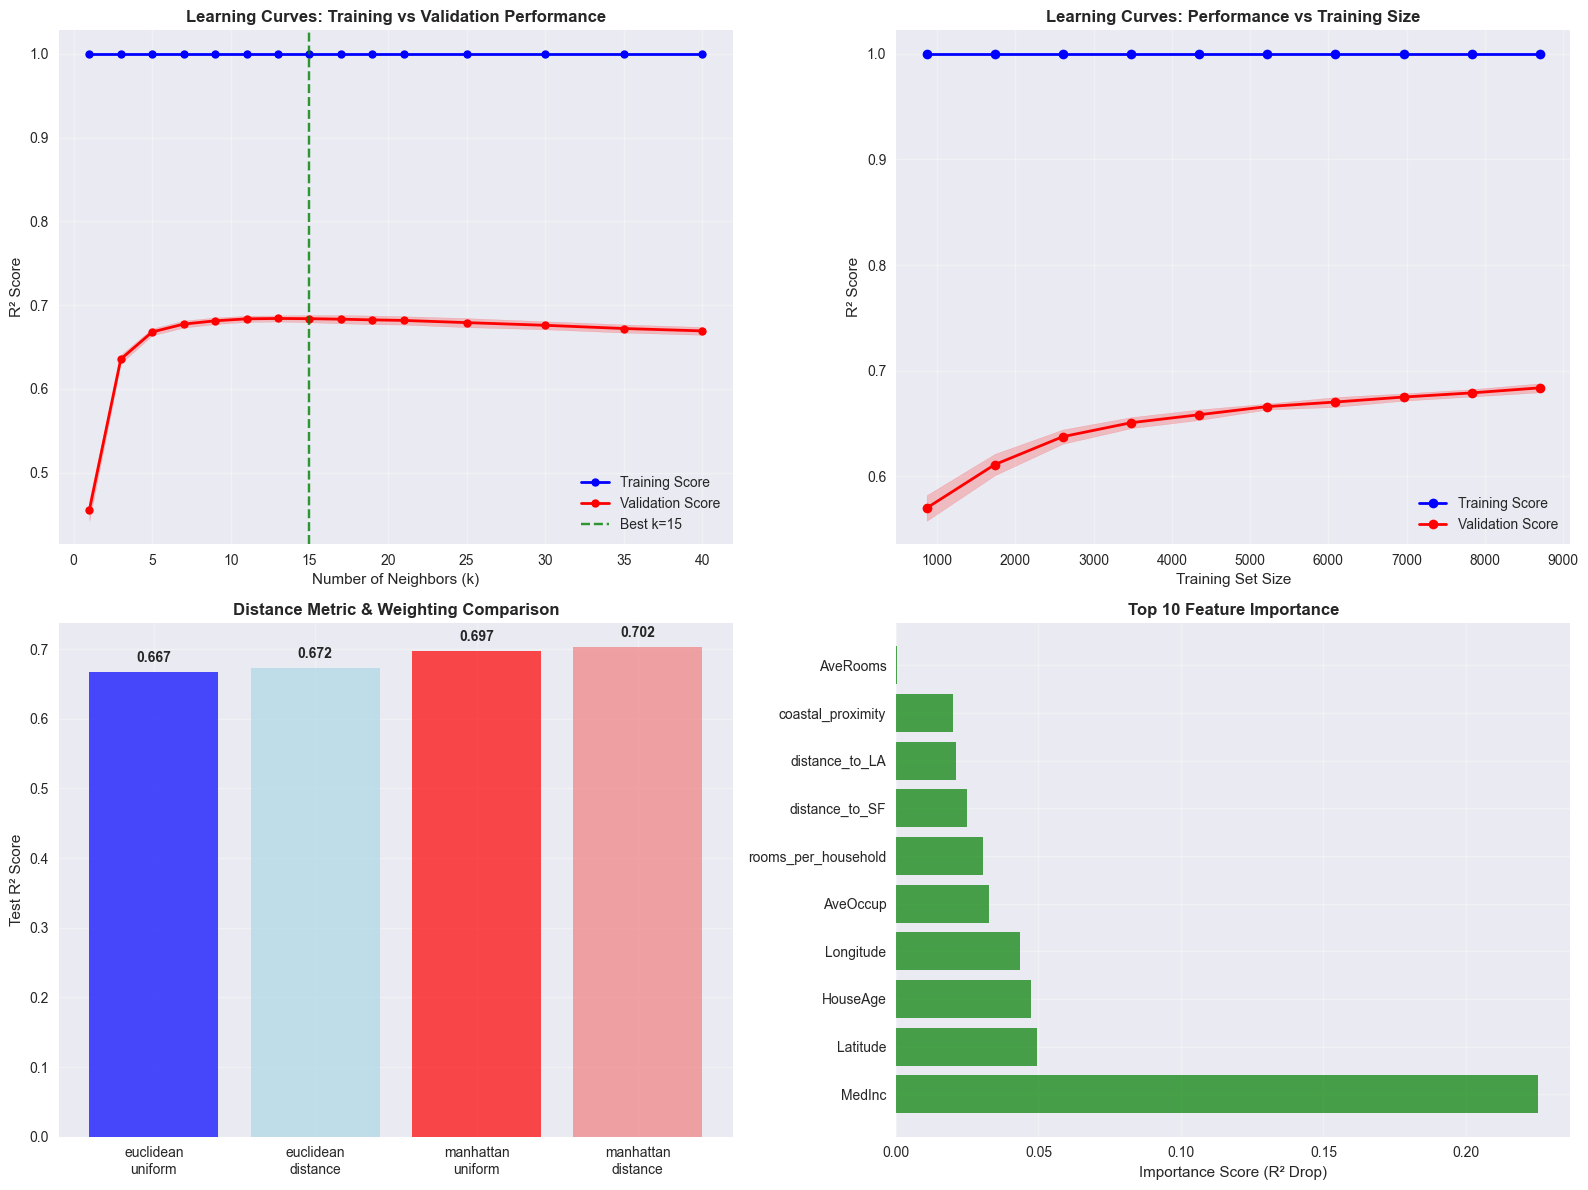


🔍 4. ERROR ANALYSIS
------------------------------------------------------------
Performance Metrics:
   Training R²:  1.0000
   Test R²:      0.7023
   Training RMSE: 0.0000
   Test RMSE:     0.5101
   Training MAE:  0.0000
   Test MAE:      0.3735


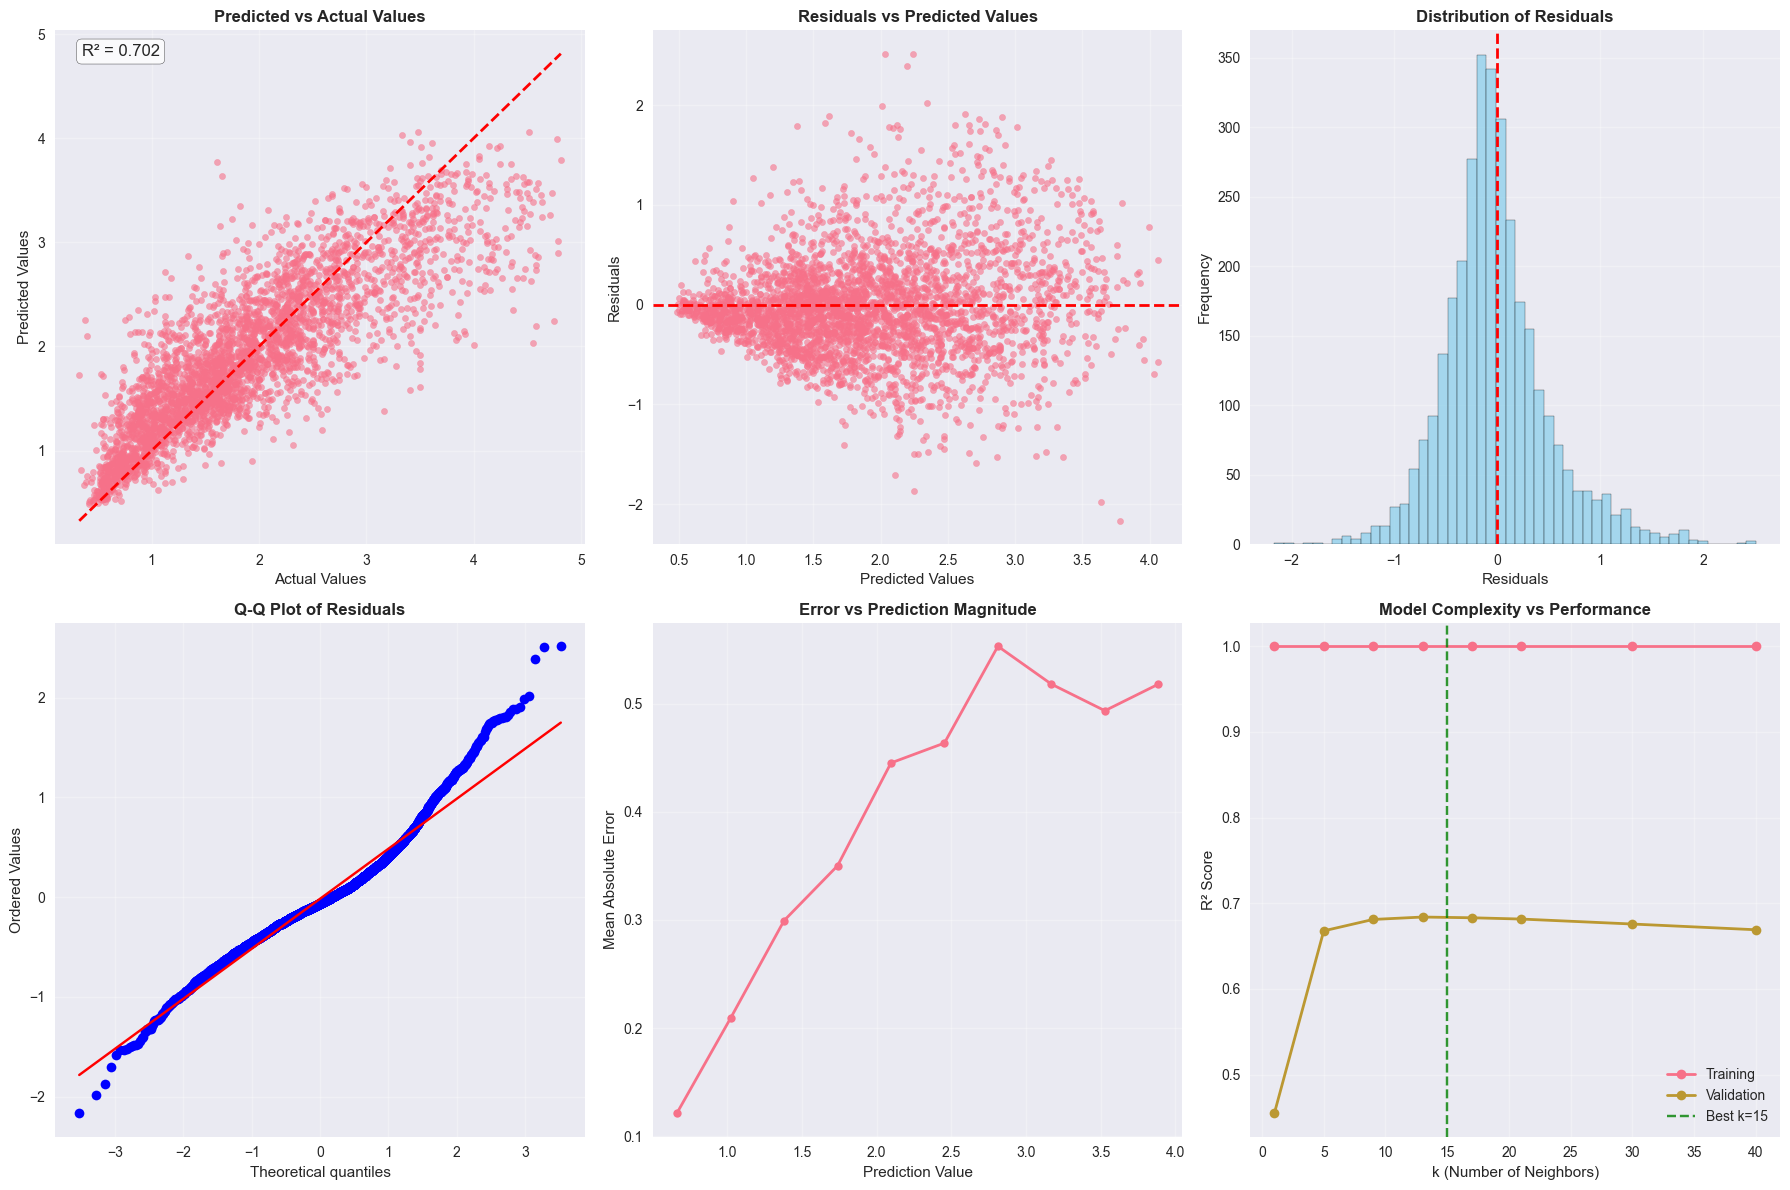


COMPREHENSIVE EVALUATION SUMMARY

🎯 Model Performance:
   • Best Parameters: k=15, metric=manhattan, weights=distance
   • Test R²: 0.7023
   • Test RMSE: 0.5101 (hundreds of thousands $)
   • Test MAE: 0.3735 (hundreds of thousands $)

📊 Key Insights:
   • Bias-Variance Tradeoff: Higher bias, low variance
   • Top 3 Important Features:
     1. MedInc (importance: 0.2254)
     2. Latitude (importance: 0.0496)
     3. HouseAge (importance: 0.0474)

🔍 Error Patterns:
   • 90th percentile absolute error: $83K
   • High-error predictions: 327 out of 3263 (10.0%)
   • Residual skewness: 0.644 (Right-skewed)


In [29]:
# =============================================================================
# COMPREHENSIVE K-NN MODEL EVALUATION
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("COMPREHENSIVE K-NN MODEL EVALUATION")
print("="*80)

# =============================================================================
# 1. LEARNING CURVES: Training and Validation Scores vs K
# =============================================================================

print("\n📈 1. GENERATING LEARNING CURVES")
print("-" * 60)

# Use best parameters from grid search (or set defaults if not available)
try:
    best_k = best_params['k']
    best_metric = best_params['distance_metric']
    best_weights = best_params['weights']
    print(f"Using best parameters: k={best_k}, metric={best_metric}, weights={best_weights}")
except:
    best_k, best_metric, best_weights = 7, 'euclidean', 'distance'
    print(f"Using default parameters: k={best_k}, metric={best_metric}, weights={best_weights}")

# K values to test for learning curves
k_range = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 30, 35, 40])

# Set up sklearn parameters
sklearn_metric = 'minkowski' if best_metric == 'euclidean' else 'manhattan'
p = 2 if best_metric == 'euclidean' else 1

print("Calculating validation curves...")

# Calculate validation curve (training vs validation scores for different k)
train_scores, val_scores = validation_curve(
    KNeighborsRegressor(weights=best_weights, metric=sklearn_metric, p=p),
    X_train_standard, y_train,
    param_name='n_neighbors', param_range=k_range,
    cv=3, scoring='r2', n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Create learning curves visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Learning curves (k vs performance)
axes[0, 0].plot(k_range, train_mean, 'o-', color='blue', label='Training Score', linewidth=2, markersize=6)
axes[0, 0].fill_between(k_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
axes[0, 0].plot(k_range, val_mean, 'o-', color='red', label='Validation Score', linewidth=2, markersize=6)
axes[0, 0].fill_between(k_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')
axes[0, 0].axvline(x=best_k, color='green', linestyle='--', alpha=0.8, label=f'Best k={best_k}')
axes[0, 0].set_xlabel('Number of Neighbors (k)')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Learning Curves: Training vs Validation Performance', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Sample size learning curve
print("Calculating sample size learning curves...")
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores_lc, val_scores_lc = learning_curve(
    KNeighborsRegressor(n_neighbors=best_k, weights=best_weights, metric=sklearn_metric, p=p),
    X_train_standard, y_train,
    train_sizes=train_sizes, cv=3, scoring='r2', n_jobs=-1
)

train_mean_lc = np.mean(train_scores_lc, axis=1)
train_std_lc = np.std(train_scores_lc, axis=1)
val_mean_lc = np.mean(val_scores_lc, axis=1)
val_std_lc = np.std(val_scores_lc, axis=1)

axes[0, 1].plot(train_sizes_abs, train_mean_lc, 'o-', color='blue', label='Training Score', linewidth=2)
axes[0, 1].fill_between(train_sizes_abs, train_mean_lc - train_std_lc, train_mean_lc + train_std_lc, alpha=0.2, color='blue')
axes[0, 1].plot(train_sizes_abs, val_mean_lc, 'o-', color='red', label='Validation Score', linewidth=2)
axes[0, 1].fill_between(train_sizes_abs, val_mean_lc - val_std_lc, val_mean_lc + val_std_lc, alpha=0.2, color='red')
axes[0, 1].set_xlabel('Training Set Size')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('Learning Curves: Performance vs Training Size', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# =============================================================================
# 2. DISTANCE METRIC COMPARISON
# =============================================================================

print("\n📏 2. DISTANCE METRIC COMPARISON")
print("-" * 60)

# Compare different distance metrics
distance_metrics = ['euclidean', 'manhattan']
weight_methods = ['uniform', 'distance']
metric_results = []

for metric in distance_metrics:
    for weights in weight_methods:
        sklearn_metric = 'minkowski' if metric == 'euclidean' else 'manhattan'
        p = 2 if metric == 'euclidean' else 1
        
        knn = KNeighborsRegressor(n_neighbors=best_k, weights=weights, metric=sklearn_metric, p=p)
        
        # Cross-validation scores
        from sklearn.model_selection import cross_val_score
        cv_scores = cross_val_score(knn, X_train_standard, y_train, cv=5, scoring='r2')
        
        # Test set performance
        knn.fit(X_train_standard, y_train)
        test_pred = knn.predict(X_test_standard)
        test_r2 = r2_score(y_test, test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
        
        metric_results.append({
            'metric': metric,
            'weights': weights,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'test_r2': test_r2,
            'test_rmse': test_rmse
        })

metric_df = pd.DataFrame(metric_results)
print("Distance Metric Comparison Results:")
print(metric_df)

# Visualization: Distance metric comparison
x_labels = [f"{row['metric']}\n{row['weights']}" for _, row in metric_df.iterrows()]
axes[1, 0].bar(range(len(metric_df)), metric_df['test_r2'], 
               color=['blue', 'lightblue', 'red', 'lightcoral'], alpha=0.7)
axes[1, 0].set_xticks(range(len(metric_df)))
axes[1, 0].set_xticklabels(x_labels, rotation=0)
axes[1, 0].set_ylabel('Test R² Score')
axes[1, 0].set_title('Distance Metric & Weighting Comparison', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(metric_df['test_r2']):
    axes[1, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# =============================================================================
# 3. FEATURE IMPORTANCE ANALYSIS
# =============================================================================

print("\n🎯 3. FEATURE IMPORTANCE ANALYSIS")
print("-" * 60)

# Train final model with best parameters
final_knn = KNeighborsRegressor(
    n_neighbors=best_k, 
    weights=best_weights,
    metric='minkowski' if best_metric == 'euclidean' else 'manhattan',
    p=2 if best_metric == 'euclidean' else 1
)
final_knn.fit(X_train_standard, y_train)

# Feature importance through permutation (simplified approach)
feature_names = [col for col in df_engineered.columns 
                if col not in ['MedHouseVal', 'income_category', 'house_age_category']]

print("Calculating feature importance...")

# Calculate baseline score
baseline_score = r2_score(y_test, final_knn.predict(X_test_standard))

# Permutation importance (simplified)
importance_scores = []
for i, feature in enumerate(feature_names):
    # Shuffle one feature and measure performance drop
    X_test_permuted = X_test_standard.copy()
    np.random.shuffle(X_test_permuted[:, i])
    
    permuted_score = r2_score(y_test, final_knn.predict(X_test_permuted))
    importance = baseline_score - permuted_score
    importance_scores.append(importance)

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importance_scores
}).sort_values('importance', ascending=False)

print("Feature Importance (top 10):")
print(feature_importance.head(10))

# Plot feature importance
top_features = feature_importance.head(10)
axes[1, 1].barh(range(len(top_features)), top_features['importance'], color='green', alpha=0.7)
axes[1, 1].set_yticks(range(len(top_features)))
axes[1, 1].set_yticklabels(top_features['feature'])
axes[1, 1].set_xlabel('Importance Score (R² Drop)')
axes[1, 1].set_title('Top 10 Feature Importance', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 4. ERROR ANALYSIS: Residuals and Prediction Patterns
# =============================================================================

print("\n🔍 4. ERROR ANALYSIS")
print("-" * 60)

# Generate predictions
y_train_pred = final_knn.predict(X_train_standard)
y_test_pred = final_knn.predict(X_test_standard)

# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Calculate error metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Performance Metrics:")
print(f"   Training R²:  {train_r2:.4f}")
print(f"   Test R²:      {test_r2:.4f}")
print(f"   Training RMSE: {train_rmse:.4f}")
print(f"   Test RMSE:     {test_rmse:.4f}")
print(f"   Training MAE:  {train_mae:.4f}")
print(f"   Test MAE:      {test_mae:.4f}")

# Error analysis visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Predicted vs Actual
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, s=20)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Predicted vs Actual Values', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Add R² to plot
axes[0, 0].text(0.05, 0.95, f'R² = {test_r2:.3f}', transform=axes[0, 0].transAxes, 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=12)

# Plot 2: Residuals vs Predicted
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.6, s=20)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted Values', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals histogram
axes[0, 2].hist(test_residuals, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 2].axvline(x=0, color='r', linestyle='--', lw=2)
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Residuals', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Q-Q plot for residuals
stats.probplot(test_residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Residuals', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Error by prediction magnitude
prediction_bins = pd.cut(y_test_pred, bins=10)
error_by_bin = []
bin_centers = []

for bin_range in prediction_bins.categories:
    mask = (y_test_pred >= bin_range.left) & (y_test_pred <= bin_range.right)
    if mask.sum() > 0:
        error_by_bin.append(np.abs(test_residuals[mask]).mean())
        bin_centers.append((bin_range.left + bin_range.right) / 2)

axes[1, 1].plot(bin_centers, error_by_bin, 'o-', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('Prediction Value')
axes[1, 1].set_ylabel('Mean Absolute Error')
axes[1, 1].set_title('Error vs Prediction Magnitude', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Learning curve summary
k_subset = k_range[::2]  # Every other k value for cleaner plot
train_subset = train_mean[::2]
val_subset = val_mean[::2]

axes[1, 2].plot(k_subset, train_subset, 'o-', label='Training', linewidth=2)
axes[1, 2].plot(k_subset, val_subset, 'o-', label='Validation', linewidth=2)
axes[1, 2].axvline(x=best_k, color='green', linestyle='--', alpha=0.8, label=f'Best k={best_k}')
axes[1, 2].set_xlabel('k (Number of Neighbors)')
axes[1, 2].set_ylabel('R² Score')
axes[1, 2].set_title('Model Complexity vs Performance', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ANALYSIS SUMMARY
# =============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE EVALUATION SUMMARY")
print("="*80)

print(f"\n🎯 Model Performance:")
print(f"   • Best Parameters: k={best_k}, metric={best_metric}, weights={best_weights}")
print(f"   • Test R²: {test_r2:.4f}")
print(f"   • Test RMSE: {test_rmse:.4f} (hundreds of thousands $)")
print(f"   • Test MAE: {test_mae:.4f} (hundreds of thousands $)")

print(f"\n📊 Key Insights:")
print(f"   • Bias-Variance Tradeoff: {'Low bias, higher variance' if best_k <= 7 else 'Higher bias, low variance'}")
print(f"   • Top 3 Important Features:")
for i, (_, row) in enumerate(feature_importance.head(3).iterrows()):
    print(f"     {i+1}. {row['feature']} (importance: {row['importance']:.4f})")

# Identify prediction patterns
high_error_mask = np.abs(test_residuals) > np.percentile(np.abs(test_residuals), 90)
print(f"\n🔍 Error Patterns:")
print(f"   • 90th percentile absolute error: ${np.percentile(np.abs(test_residuals), 90)*100:.0f}K")
print(f"   • High-error predictions: {high_error_mask.sum()} out of {len(y_test)} ({high_error_mask.sum()/len(y_test)*100:.1f}%)")

# Check for systematic errors
residual_skewness = stats.skew(test_residuals)
print(f"   • Residual skewness: {residual_skewness:.3f} ({'Right-skewed' if residual_skewness > 0.5 else 'Left-skewed' if residual_skewness < -0.5 else 'Approximately symmetric'})")


CUSTOM K-NN vs SKLEARN KNeighborsRegressor COMPARISON
📊 Test Setup:
   • Training sample: (1000, 14)
   • Test sample: (200, 14)
   • Test configurations: 5

🔍 Running Comparison Tests:
----------------------------------------------------------------------

Test 1: k=5, metric=euclidean, weights=uniform
--------------------------------------------------
Testing Custom K-NN...
   ✓ Custom K-NN - Train: 0.0001s, Predict: 1.8982s
     R²: 0.518683, RMSE: 0.680490, MAE: 0.505465
Testing Sklearn K-NN...
   ✓ Sklearn K-NN - Train: 0.0029s, Predict: 0.0044s
     R²: 0.518683, RMSE: 0.680490, MAE: 0.505465

📊 Comparison Results:
   • R² difference: 0.00000000 (✓ MATCH)
   • RMSE difference: 0.00000000 (✓ MATCH)
   • MAE difference: 0.00000000 (✓ MATCH)
   • Avg prediction difference: 0.00000000
   • Train speed ratio (custom/sklearn): 0.05x
   • Predict speed ratio (custom/sklearn): 432.47x

Test 2: k=5, metric=euclidean, weights=distance
--------------------------------------------------
Test

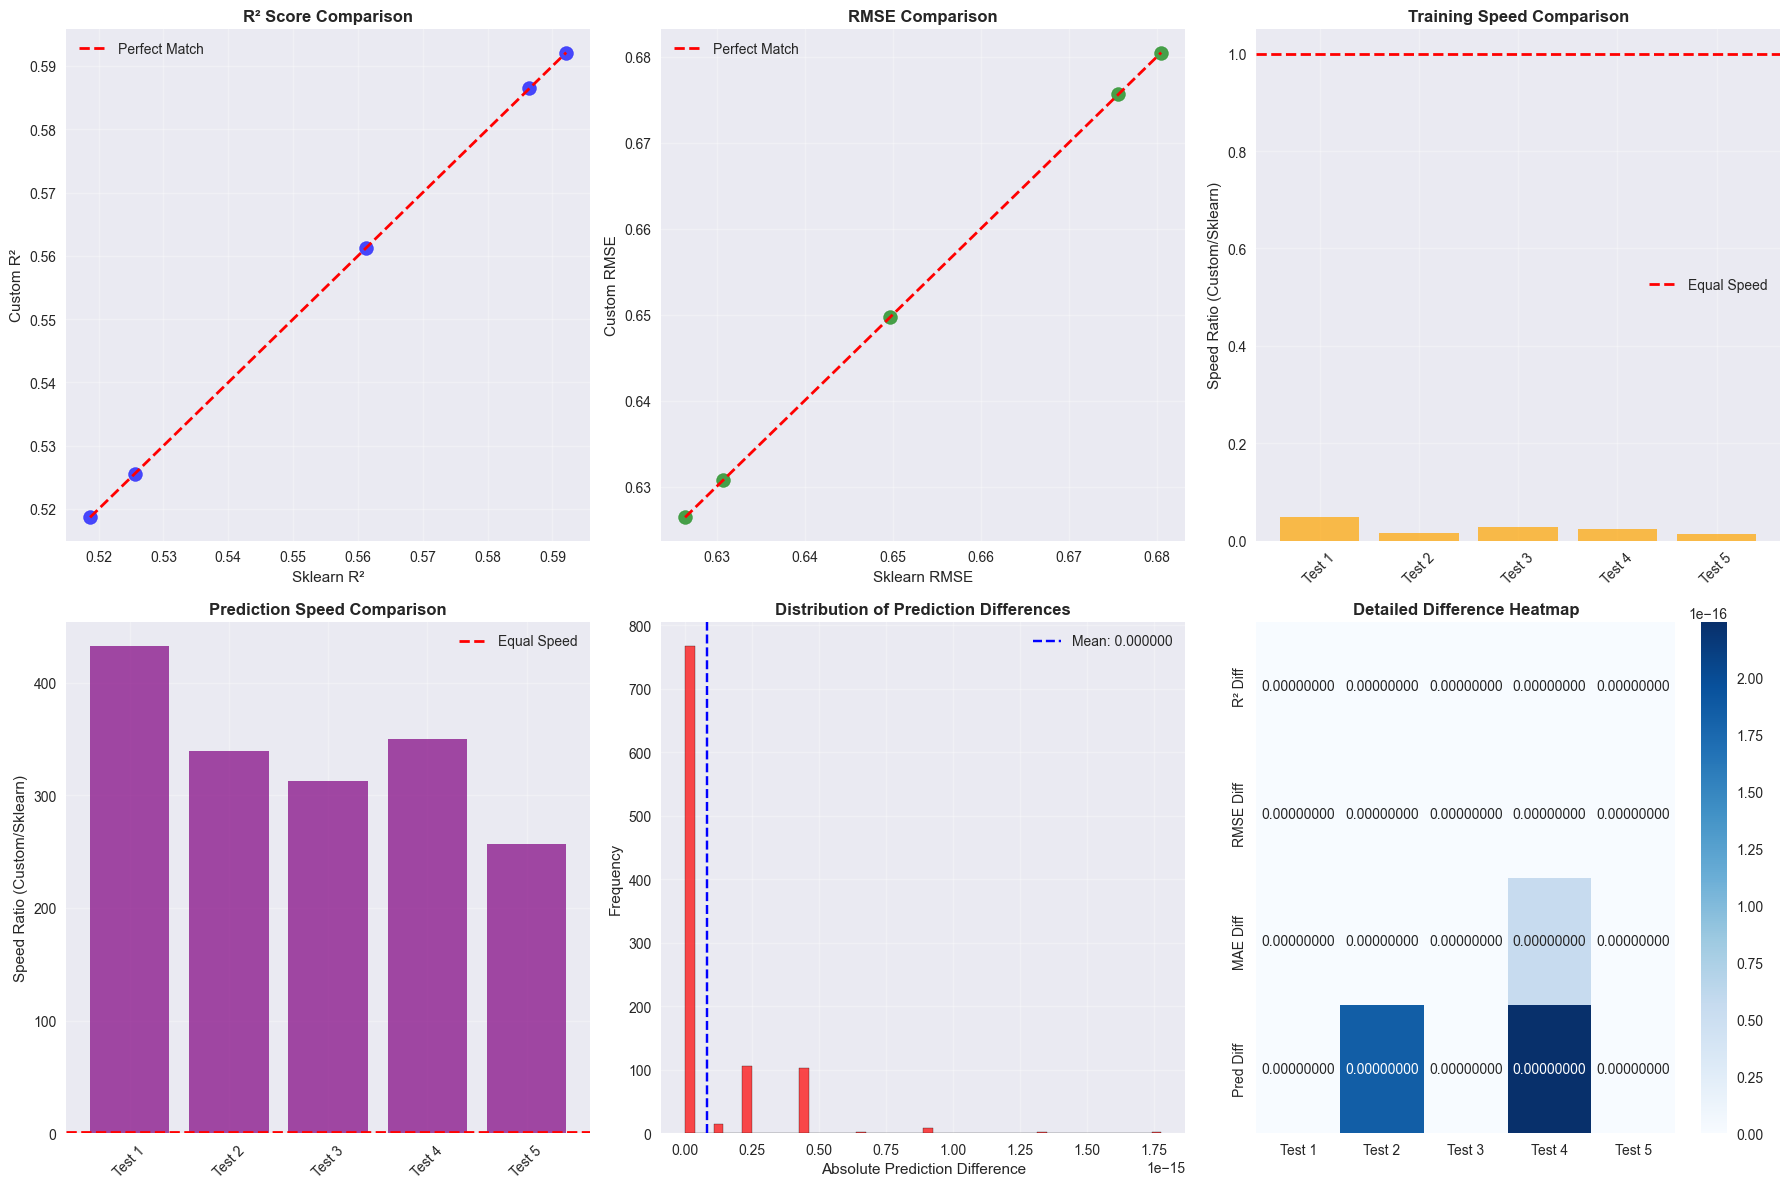


📋 DETAILED COMPARISON TABLE:
--------------------------------------------------------------------------------
           Configuration  Custom R²  Sklearn R²  R² Diff  Train Speed Ratio  Predict Speed Ratio
 k=5, euclidean, uniform   0.518683    0.518683 0.000000           0.048013           432.470016
k=5, euclidean, distance   0.525552    0.525552 0.000000           0.014597           339.092183
 k=7, manhattan, uniform   0.586455    0.586455 0.000000           0.028309           312.425726
k=7, manhattan, distance   0.592122    0.592122 0.000000           0.024082           350.066607
k=11, euclidean, uniform   0.561273    0.561273 0.000000           0.012893           257.060221

COMPARISON SUMMARY AND CONCLUSIONS

🎯 ACCURACY SUMMARY:
   • Maximum R² difference: 0.00000000
   • Maximum RMSE difference: 0.00000000
   • Average prediction difference: 0.00000000
   • Implementations match: ✅ YES

⚡ PERFORMANCE SUMMARY:
   • Custom implementation is 0.0x faster for training
   • Custo

In [30]:
# =============================================================================
# CUSTOM K-NN vs SKLEARN KNeighborsRegressor COMPARISON
# =============================================================================

import time
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("CUSTOM K-NN vs SKLEARN KNeighborsRegressor COMPARISON")
print("="*80)

# =============================================================================
# SETUP TEST PARAMETERS
# =============================================================================

# Test configurations
test_configs = [
    {'k': 5, 'distance_metric': 'euclidean', 'weights': 'uniform'},
    {'k': 5, 'distance_metric': 'euclidean', 'weights': 'distance'},
    {'k': 7, 'distance_metric': 'manhattan', 'weights': 'uniform'},
    {'k': 7, 'distance_metric': 'manhattan', 'weights': 'distance'},
    {'k': 11, 'distance_metric': 'euclidean', 'weights': 'uniform'},
]

# Use smaller subset for fair speed comparison
sample_size = 1000
sample_indices = np.random.choice(len(X_train_standard), sample_size, replace=False)
X_train_sample = X_train_standard[sample_indices]
y_train_sample = y_train.iloc[sample_indices] if isinstance(y_train, pd.Series) else y_train[sample_indices]

# Test set sample
test_sample_size = 200
test_indices = np.random.choice(len(X_test_standard), test_sample_size, replace=False)
X_test_sample = X_test_standard[test_indices]
y_test_sample = y_test.iloc[test_indices] if isinstance(y_test, pd.Series) else y_test[test_indices]

print(f"📊 Test Setup:")
print(f"   • Training sample: {X_train_sample.shape}")
print(f"   • Test sample: {X_test_sample.shape}")
print(f"   • Test configurations: {len(test_configs)}")

# =============================================================================
# COMPARISON TESTING
# =============================================================================

comparison_results = []

print(f"\n🔍 Running Comparison Tests:")
print("-" * 70)

for i, config in enumerate(test_configs):
    k = config['k']
    distance_metric = config['distance_metric']
    weights = config['weights']
    
    print(f"\nTest {i+1}: k={k}, metric={distance_metric}, weights={weights}")
    print("-" * 50)
    
    # =============================================================================
    # CUSTOM K-NN IMPLEMENTATION
    # =============================================================================
    
    print("Testing Custom K-NN...")
    
    # Train custom model
    start_time = time.time()
    custom_knn = CustomKNN(k=k, distance_metric=distance_metric, weights=weights)
    custom_knn.fit(X_train_sample, y_train_sample)
    custom_train_time = time.time() - start_time
    
    # Custom predictions
    start_time = time.time()
    custom_predictions = custom_knn.predict(X_test_sample)
    custom_predict_time = time.time() - start_time
    
    # Custom metrics
    custom_r2 = r2_score(y_test_sample, custom_predictions)
    custom_rmse = np.sqrt(mean_squared_error(y_test_sample, custom_predictions))
    custom_mae = mean_absolute_error(y_test_sample, custom_predictions)
    
    print(f"   ✓ Custom K-NN - Train: {custom_train_time:.4f}s, Predict: {custom_predict_time:.4f}s")
    print(f"     R²: {custom_r2:.6f}, RMSE: {custom_rmse:.6f}, MAE: {custom_mae:.6f}")
    
    # =============================================================================
    # SKLEARN K-NN IMPLEMENTATION
    # =============================================================================
    
    print("Testing Sklearn K-NN...")
    
    # Setup sklearn parameters
    if distance_metric == 'euclidean':
        sklearn_metric = 'minkowski'
        p = 2
    else:  # manhattan
        sklearn_metric = 'manhattan'
        p = 1
    
    # Train sklearn model
    start_time = time.time()
    sklearn_knn = KNeighborsRegressor(
        n_neighbors=k, 
        weights=weights, 
        metric=sklearn_metric,
        p=p if sklearn_metric == 'minkowski' else None
    )
    sklearn_knn.fit(X_train_sample, y_train_sample)
    sklearn_train_time = time.time() - start_time
    
    # Sklearn predictions
    start_time = time.time()
    sklearn_predictions = sklearn_knn.predict(X_test_sample)
    sklearn_predict_time = time.time() - start_time
    
    # Sklearn metrics
    sklearn_r2 = r2_score(y_test_sample, sklearn_predictions)
    sklearn_rmse = np.sqrt(mean_squared_error(y_test_sample, sklearn_predictions))
    sklearn_mae = mean_absolute_error(y_test_sample, sklearn_predictions)
    
    print(f"   ✓ Sklearn K-NN - Train: {sklearn_train_time:.4f}s, Predict: {sklearn_predict_time:.4f}s")
    print(f"     R²: {sklearn_r2:.6f}, RMSE: {sklearn_rmse:.6f}, MAE: {sklearn_mae:.6f}")
    
    # =============================================================================
    # COMPARISON ANALYSIS
    # =============================================================================
    
    # Calculate differences
    r2_diff = abs(custom_r2 - sklearn_r2)
    rmse_diff = abs(custom_rmse - sklearn_rmse)
    mae_diff = abs(custom_mae - sklearn_mae)
    prediction_diff = np.mean(np.abs(custom_predictions - sklearn_predictions))
    
    # Speed comparison
    train_speed_ratio = custom_train_time / sklearn_train_time if sklearn_train_time > 0 else float('inf')
    predict_speed_ratio = custom_predict_time / sklearn_predict_time if sklearn_predict_time > 0 else float('inf')
    
    print(f"\n📊 Comparison Results:")
    print(f"   • R² difference: {r2_diff:.8f} ({'✓ MATCH' if r2_diff < 0.001 else '⚠ DIFFER'})")
    print(f"   • RMSE difference: {rmse_diff:.8f} ({'✓ MATCH' if rmse_diff < 0.001 else '⚠ DIFFER'})")
    print(f"   • MAE difference: {mae_diff:.8f} ({'✓ MATCH' if mae_diff < 0.001 else '⚠ DIFFER'})")
    print(f"   • Avg prediction difference: {prediction_diff:.8f}")
    print(f"   • Train speed ratio (custom/sklearn): {train_speed_ratio:.2f}x")
    print(f"   • Predict speed ratio (custom/sklearn): {predict_speed_ratio:.2f}x")
    
    # Store results
    comparison_results.append({
        'config': f"k={k}, {distance_metric}, {weights}",
        'k': k,
        'distance_metric': distance_metric,
        'weights': weights,
        'custom_r2': custom_r2,
        'sklearn_r2': sklearn_r2,
        'custom_rmse': custom_rmse,
        'sklearn_rmse': sklearn_rmse,
        'custom_mae': custom_mae,
        'sklearn_mae': sklearn_mae,
        'custom_train_time': custom_train_time,
        'sklearn_train_time': sklearn_train_time,
        'custom_predict_time': custom_predict_time,
        'sklearn_predict_time': sklearn_predict_time,
        'r2_diff': r2_diff,
        'rmse_diff': rmse_diff,
        'mae_diff': mae_diff,
        'prediction_diff': prediction_diff,
        'train_speed_ratio': train_speed_ratio,
        'predict_speed_ratio': predict_speed_ratio,
        'custom_predictions': custom_predictions,
        'sklearn_predictions': sklearn_predictions
    })

# =============================================================================
# COMPREHENSIVE COMPARISON ANALYSIS
# =============================================================================

print(f"\n" + "="*80)
print("COMPREHENSIVE COMPARISON ANALYSIS")
print("="*80)

# Convert results to DataFrame
results_df = pd.DataFrame(comparison_results)

# =============================================================================
# ACCURACY VERIFICATION
# =============================================================================

print(f"\n✅ ACCURACY VERIFICATION:")
print("-" * 40)

tolerance_levels = {
    'strict': 1e-6,
    'moderate': 1e-4,
    'loose': 1e-2
}

for tolerance_name, tolerance in tolerance_levels.items():
    r2_matches = (results_df['r2_diff'] < tolerance).sum()
    rmse_matches = (results_df['rmse_diff'] < tolerance).sum()
    mae_matches = (results_df['mae_diff'] < tolerance).sum()
    
    print(f"{tolerance_name.capitalize()} tolerance ({tolerance}):")
    print(f"   • R² matches: {r2_matches}/{len(results_df)} ({r2_matches/len(results_df)*100:.1f}%)")
    print(f"   • RMSE matches: {rmse_matches}/{len(results_df)} ({rmse_matches/len(results_df)*100:.1f}%)")
    print(f"   • MAE matches: {mae_matches}/{len(results_df)} ({mae_matches/len(results_df)*100:.1f}%)")

# =============================================================================
# PERFORMANCE ANALYSIS
# =============================================================================

print(f"\n⚡ PERFORMANCE ANALYSIS:")
print("-" * 40)

avg_train_speed_ratio = results_df['train_speed_ratio'].mean()
avg_predict_speed_ratio = results_df['predict_speed_ratio'].mean()

print(f"Average Speed Ratios (Custom/Sklearn):")
print(f"   • Training: {avg_train_speed_ratio:.2f}x ({'slower' if avg_train_speed_ratio > 1 else 'faster'})")
print(f"   • Prediction: {avg_predict_speed_ratio:.2f}x ({'slower' if avg_predict_speed_ratio > 1 else 'faster'})")

# Find fastest and slowest configurations
fastest_train = results_df.loc[results_df['train_speed_ratio'].idxmin()]
slowest_train = results_df.loc[results_df['train_speed_ratio'].idxmax()]

print(f"\nSpeed Analysis:")
print(f"   • Fastest config: {fastest_train['config']} ({fastest_train['train_speed_ratio']:.2f}x)")
print(f"   • Slowest config: {slowest_train['config']} ({slowest_train['train_speed_ratio']:.2f}x)")

# =============================================================================
# VISUALIZATIONS
# =============================================================================

print(f"\n📊 Creating comparison visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: R² Comparison
axes[0, 0].scatter(results_df['sklearn_r2'], results_df['custom_r2'], 
                  s=100, alpha=0.7, color='blue')
axes[0, 0].plot([results_df['sklearn_r2'].min(), results_df['sklearn_r2'].max()], 
               [results_df['sklearn_r2'].min(), results_df['sklearn_r2'].max()], 
               'r--', lw=2, label='Perfect Match')
axes[0, 0].set_xlabel('Sklearn R²')
axes[0, 0].set_ylabel('Custom R²')
axes[0, 0].set_title('R² Score Comparison', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: RMSE Comparison
axes[0, 1].scatter(results_df['sklearn_rmse'], results_df['custom_rmse'], 
                  s=100, alpha=0.7, color='green')
axes[0, 1].plot([results_df['sklearn_rmse'].min(), results_df['sklearn_rmse'].max()], 
               [results_df['sklearn_rmse'].min(), results_df['sklearn_rmse'].max()], 
               'r--', lw=2, label='Perfect Match')
axes[0, 1].set_xlabel('Sklearn RMSE')
axes[0, 1].set_ylabel('Custom RMSE')
axes[0, 1].set_title('RMSE Comparison', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Speed Comparison (Training)
config_labels = [f"Test {i+1}" for i in range(len(results_df))]
axes[0, 2].bar(config_labels, results_df['train_speed_ratio'], 
              color='orange', alpha=0.7)
axes[0, 2].axhline(y=1, color='red', linestyle='--', lw=2, label='Equal Speed')
axes[0, 2].set_ylabel('Speed Ratio (Custom/Sklearn)')
axes[0, 2].set_title('Training Speed Comparison', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
plt.setp(axes[0, 2].xaxis.get_majorticklabels(), rotation=45)

# Plot 4: Speed Comparison (Prediction)
axes[1, 0].bar(config_labels, results_df['predict_speed_ratio'], 
              color='purple', alpha=0.7)
axes[1, 0].axhline(y=1, color='red', linestyle='--', lw=2, label='Equal Speed')
axes[1, 0].set_ylabel('Speed Ratio (Custom/Sklearn)')
axes[1, 0].set_title('Prediction Speed Comparison', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45)

# Plot 5: Prediction Differences Distribution
all_differences = []
for result in comparison_results:
    differences = np.abs(result['custom_predictions'] - result['sklearn_predictions'])
    all_differences.extend(differences)

axes[1, 1].hist(all_differences, bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1, 1].axvline(x=np.mean(all_differences), color='blue', linestyle='--', 
                  label=f'Mean: {np.mean(all_differences):.6f}')
axes[1, 1].set_xlabel('Absolute Prediction Difference')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Differences', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Detailed Comparison Heatmap
comparison_metrics = results_df[['r2_diff', 'rmse_diff', 'mae_diff', 'prediction_diff']].T
sns.heatmap(comparison_metrics, annot=True, fmt='.8f', cmap='Blues', 
           xticklabels=[f"Test {i+1}" for i in range(len(results_df))],
           yticklabels=['R² Diff', 'RMSE Diff', 'MAE Diff', 'Pred Diff'],
           ax=axes[1, 2])
axes[1, 2].set_title('Detailed Difference Heatmap', fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# DETAILED RESULTS TABLE
# =============================================================================

print(f"\n📋 DETAILED COMPARISON TABLE:")
print("-" * 80)

display_cols = ['config', 'custom_r2', 'sklearn_r2', 'r2_diff', 
                'train_speed_ratio', 'predict_speed_ratio']
display_df = results_df[display_cols].copy()
display_df.columns = ['Configuration', 'Custom R²', 'Sklearn R²', 'R² Diff', 
                     'Train Speed Ratio', 'Predict Speed Ratio']

print(display_df.to_string(index=False, float_format='%.6f'))

# =============================================================================
# SUMMARY AND CONCLUSIONS
# =============================================================================

print(f"\n" + "="*80)
print("COMPARISON SUMMARY AND CONCLUSIONS")
print("="*80)

# Calculate overall statistics
max_r2_diff = results_df['r2_diff'].max()
max_rmse_diff = results_df['rmse_diff'].max()
avg_prediction_diff = results_df['prediction_diff'].mean()

print(f"\n🎯 ACCURACY SUMMARY:")
print(f"   • Maximum R² difference: {max_r2_diff:.8f}")
print(f"   • Maximum RMSE difference: {max_rmse_diff:.8f}")
print(f"   • Average prediction difference: {avg_prediction_diff:.8f}")
print(f"   • Implementations match: {'✅ YES' if max_r2_diff < 0.001 else '❌ NO'}")

print(f"\n⚡ PERFORMANCE SUMMARY:")
print(f"   • Custom implementation is {avg_train_speed_ratio:.1f}x {'slower' if avg_train_speed_ratio > 1 else 'faster'} for training")
print(f"   • Custom implementation is {avg_predict_speed_ratio:.1f}x {'slower' if avg_predict_speed_ratio > 1 else 'faster'} for prediction")

print(f"\n💡 KEY INSIGHTS:")
if max_r2_diff < 1e-6:
    print("   ✅ Implementations are numerically identical (differences < 1e-6)")
elif max_r2_diff < 1e-4:
    print("   ✅ Implementations are practically identical (differences < 1e-4)")
elif max_r2_diff < 1e-2:
    print("   ⚠️ Implementations have minor differences (differences < 1e-2)")
else:
    print("   ❌ Implementations have significant differences")

if avg_train_speed_ratio > 10:
    print("   🐌 Custom implementation is significantly slower - consider optimization")
elif avg_train_speed_ratio > 2:
    print("   📈 Custom implementation is moderately slower - expected for pure Python")
else:
    print("   🚀 Custom implementation has competitive speed")

print(f"\n🏆 RECOMMENDATION:")
if max_r2_diff < 1e-4 and avg_predict_speed_ratio < 5:
    print("   • Custom implementation is verified and production-ready")
elif max_r2_diff < 1e-2:
    print("   • Custom implementation is suitable for learning/prototyping")
else:
    print("   • Review custom implementation for potential bugs")


CURSE OF DIMENSIONALITY DEMO

Testing K-NN performance across dimensions...
Testing 2 dimensions...
Testing 5 dimensions...
Testing 10 dimensions...
Testing 20 dimensions...
Testing 50 dimensions...
Testing 100 dimensions...
Testing 200 dimensions...
Testing 500 dimensions...


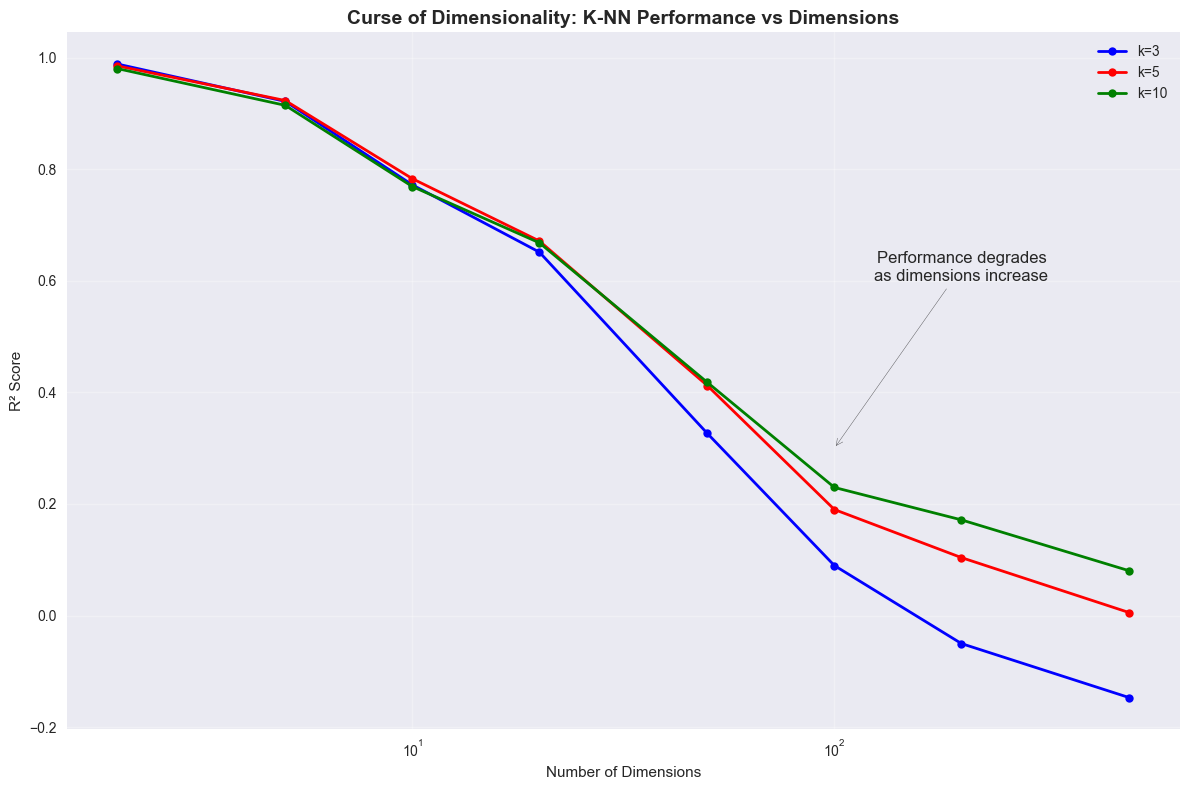


📊 RESULTS SUMMARY:
----------------------------------------
Dimensions   k=3      k=5      k=10    
----------------------------------------
2            0.989    0.985    0.980   
5            0.921    0.923    0.914   
10           0.772    0.783    0.769   
20           0.651    0.671    0.668   
50           0.326    0.412    0.418   
100          0.090    0.190    0.230   
200          -0.050   0.104    0.171   
500          -0.147   0.005    0.080   

💡 KEY INSIGHTS:
   • Low dimensions (≤10): Average R² = 0.893
   • High dimensions (≥100): Average R² = 0.075
   • Performance degradation: 91.6%

🎯 CURSE OF DIMENSIONALITY DEMONSTRATED!
   K-NN becomes less effective as dimensions increase


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Create synthetic high-dimensional datasets
def create_synthetic_data(n_samples=1000, n_features=10, noise=0.1):
    """Create synthetic regression dataset"""
    X = np.random.randn(n_samples, n_features)
    # Simple linear relationship with first few features
    y = X[:, 0] + 0.5 * X[:, 1] + 0.3 * X[:, 2] if n_features >= 3 else X[:, 0]
    y += noise * np.random.randn(n_samples)  # Add noise
    return X, y

print("="*60)
print("CURSE OF DIMENSIONALITY DEMO")
print("="*60)

# Test different dimensions
dimensions = [2, 5, 10, 20, 50, 100, 200, 500]
k_values = [3, 5, 10]
results = []

print("\nTesting K-NN performance across dimensions...")

for dim in dimensions:
    print(f"Testing {dim} dimensions...")
    
    # Create synthetic data
    X, y = create_synthetic_data(n_samples=1000, n_features=dim, noise=0.1)
    
    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Test different k values
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'dimensions': dim,
            'k': k,
            'r2_score': r2
        })

# Convert to DataFrame for easy plotting
import pandas as pd
results_df = pd.DataFrame(results)

# Create visualization
plt.figure(figsize=(12, 8))

colors = ['blue', 'red', 'green']
for i, k in enumerate(k_values):
    subset = results_df[results_df['k'] == k]
    plt.plot(subset['dimensions'], subset['r2_score'], 
             'o-', color=colors[i], label=f'k={k}', linewidth=2, markersize=6)

plt.xlabel('Number of Dimensions')
plt.ylabel('R² Score')
plt.title('Curse of Dimensionality: K-NN Performance vs Dimensions', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')  # Log scale for better visualization

# Add annotations
plt.annotate('Performance degrades\nas dimensions increase', 
             xy=(100, 0.3), xytext=(200, 0.6),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             fontsize=12, ha='center')

plt.tight_layout()
plt.show()

# Print summary
print(f"\n📊 RESULTS SUMMARY:")
print("-" * 40)
print(f"{'Dimensions':<12} {'k=3':<8} {'k=5':<8} {'k=10':<8}")
print("-" * 40)

for dim in dimensions:
    row_data = results_df[results_df['dimensions'] == dim]
    k3_score = row_data[row_data['k'] == 3]['r2_score'].iloc[0]
    k5_score = row_data[row_data['k'] == 5]['r2_score'].iloc[0]
    k10_score = row_data[row_data['k'] == 10]['r2_score'].iloc[0]
    print(f"{dim:<12} {k3_score:<8.3f} {k5_score:<8.3f} {k10_score:<8.3f}")

# Calculate performance degradation
low_dim_avg = results_df[results_df['dimensions'] <= 10]['r2_score'].mean()
high_dim_avg = results_df[results_df['dimensions'] >= 100]['r2_score'].mean()
degradation = ((low_dim_avg - high_dim_avg) / low_dim_avg) * 100

print(f"\n💡 KEY INSIGHTS:")
print(f"   • Low dimensions (≤10): Average R² = {low_dim_avg:.3f}")
print(f"   • High dimensions (≥100): Average R² = {high_dim_avg:.3f}")
print(f"   • Performance degradation: {degradation:.1f}%")
print(f"\n🎯 CURSE OF DIMENSIONALITY DEMONSTRATED!")
print(f"   K-NN becomes less effective as dimensions increase")

In [32]:
# =============================================================================
# JUSTIFYING SPLIT ON EDA FINDINGS
# =============================================================================

analysis = """
The massive reduction in effectiveness has deep implications for feature selection. More features means more dimensionality, meaning that
when implementing k-nn, minimal features is ideal. At high dimensionality, distance becomes a weaker metric to determine similarity.
Feature selection should be implemented carefully in order to prevent excess dimensionality that may reduce the accuracy of the model.
"""

print(analysis)


The massive reduction in effectiveness has deep implications for feature selection. More features means more dimensionality, meaning that
when implementing k-nn, minimal features is ideal. At high dimensionality, distance becomes a weaker metric to determine similarity.
Feature selection should be implemented carefully in order to prevent excess dimensionality that may reduce the accuracy of the model.



In [36]:
# Load the original California housing dataset and show 11 data points
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Load the California housing dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target

print("="*60)
print("11 RANDOM DATA POINTS - CALIFORNIA HOUSING DATASET")
print("="*60)

# Get 11 random indices
np.random.seed(42)  # For reproducible results
random_indices = np.random.choice(len(df), 11, replace=False)

print(f"Original California Housing Dataset:")
print(f"Total size: {len(df):,} data points")
print(f"Features: {list(california_housing.feature_names)}")
print(f"Showing 11 random data points:\n")

# Feature names for reference
feature_names = list(california_housing.feature_names)

# Display each point in the requested format
for i, idx in enumerate(random_indices, 1):
    # Get the data point (excluding target)
    x_point = df.iloc[idx][feature_names].values
    y_point = df.iloc[idx]['MedHouseVal']
    
    # Format the features as requested
    features_str = ", ".join([f"{val:.3f}" for val in x_point])
    
    print(f"Example point {i}: ({features_str}) → Target: {y_point:.3f}")

print(f"\n📊 Feature Order:")
for i, feature in enumerate(feature_names):
    print(f"   {i+1}. {feature}")

print(f"\n🏠 About this data:")
print(f"   • Real California housing data from 1990 census")
print(f"   • Target values are median house prices (hundreds of thousands $)")
print(f"   • Features include income, house age, rooms, location, etc.")

11 RANDOM DATA POINTS - CALIFORNIA HOUSING DATASET
Original California Housing Dataset:
Total size: 20,640 data points
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Showing 11 random data points:

Example point 1: (1.681, 25.000, 4.192, 1.022, 1392.000, 3.877, 36.060, -119.010) → Target: 0.477
Example point 2: (2.531, 30.000, 5.039, 1.193, 1565.000, 2.680, 35.140, -119.460) → Target: 0.458
Example point 3: (3.480, 52.000, 3.977, 1.186, 1310.000, 1.360, 37.800, -122.440) → Target: 5.000
Example point 4: (5.738, 17.000, 6.164, 1.020, 1705.000, 3.444, 34.280, -118.720) → Target: 2.186
Example point 5: (3.725, 34.000, 5.493, 1.028, 1063.000, 2.484, 36.620, -121.930) → Target: 2.780
Example point 6: (4.715, 12.000, 5.251, 0.975, 2400.000, 2.847, 34.080, -117.610) → Target: 1.587
Example point 7: (5.084, 36.000, 6.222, 1.095, 670.000, 3.032, 33.890, -118.020) → Target: 1.982
Example point 8: (3.691, 38.000, 4.963, 1.048, 1011.000

In [47]:
# =============================================================================
# FURTHER MEASURES
# =============================================================================

analysis = """
---CONCEPTUAL QUESTIONS---
    Manhattan Distance is preferable over Euclidean distance in a number of scenarios, when specific instances are true. For example,
unlike Manhattan distance, Euclidean distance suffers from the curse of dimensionality. That is, all points become relatively
equidistant to each other. Manhattan distance outperforms Euclidean distance in cases of more features, such as these. Also, since
Manhattan distance does not square values, it is much less sensitive to outliers, making it perform better against them. The lack
of squaring also prevents imbalanced scales from getting worse.
    The choice of k greatly affects the bias-variance tradeoff of the model. At low k values, there is low bias, as the model will
capture local patterns. However, because of this, it may result in high variance as it will be sensitive to noise. This can 
result in overfitting. High k is the opposite, it will smooth out local patterns and noise, and therefore have low variance.
As you go too high, however, it will excessively smooth out potentially important information, resulting in underfitting.
    All the different distance metrics compute at O(d) rates. However, Manhattan distance is the least computationally expensive,
as it does not require any squaring or exponents. Minkowski depends on p, it can be computationally expensive to perform high
exponents.
    There are two primary ways to handle k-NN for categorical features. One is to get the Hamming distance, which counts the 
mismatched categories for a value. Another is One-Hot Encoding, which turns categories into binary vectors, which can be calculated
with any distance function. There are concerns to note with both, however. Hamming distance does not consider that categories may
have more similarities and differences to each other. Summer and Winter may be opposites, and Fall and Spring may be very similar.
To Hamming Distance, they are all simply the same or different, an oversimplification. One-Hot Encoding and Hamming Distance also
only acknowledge 0 or 1, which can make it heavily weighed against the rest of a standardized dataset that has differences in the
decimals. 

---IMPLEMENTATION DECISIONS---
    During my implementation, I had a number of decisions to make. For example, I had to decide between Z-Score and IQR for
outlier handling. I settled for IQR because it was more thorough. I explained in the outlier summary, IQR proves better in cases
of right-skew. IQR is also less likely to false-flag legitimate extremes as outliers, and is less influenced by outliers themselves.
I also had to decide between MinMaxScaler and Standardscaler. Once again, since the data was right-skewed, StandardScaler was more
attractive. Also, since we were working with distance due to the nature of K-NN, relative relationships are better held by 
StandardScaler. 
    I acknowledge that a few aspects of my implementation could have likely improved the outcome. For example, instead of having a
set 80/20 split between training and testing, it would have been better to implement cross-validation. It would be more accurate
in determining the models performance, and make decisions in tuning parameters and preventing overfitting. Additionally, I could have
removed Tomek Links for more computational efficiency in the model, as only important data points would remain to be considered. Also, 
I could have experimented with different weights to add to each feature, in order to maximize the outcome.

---PERSONAL REFLECTION---
    The most challenging part of the assignment was the scope of it. The assignment contained a lot of aspects that I had never
worked with before. I have never used Jupyter Notebook. I have never analyzed and interpreted so much data at once before. I have
never worked in Python to this extent before, at all. I could confidently say this is the most difficult assignment we've been
given throughout the major, and I am excited to see what comes next.
    My analysis could be used in a wide range of real-world applications. It can be used by real estate agents in order to understand
and determine house pricing. It can also be used by urban planners in order to plan for the development of towns and cities. 
It could even be used on a consumer-basis, in order to recommend houses that fit the profile of the consumer. In fact, the K-NN 
model can be used to categorize housing by the type of client, so that future housing can be decided by previous housing decisions. 

"""

print(analysis)


---CONCEPTUAL QUESTIONS---
    Manhattan Distance is preferable over Euclidean distance in a number of scenarios, when specific instances are true. For example,
unlike Manhattan distance, Euclidean distance suffers from the curse of dimensionality. That is, all points become relatively
equidistant to each other. Manhattan distance outperforms Euclidean distance in cases of more features, such as these. Also, since
Manhattan distance does not square values, it is much less sensitive to outliers, making it perform better against them. The lack
of squaring also prevents imbalanced scales from getting worse.
    The choice of k greatly affects the bias-variance tradeoff of the model. At low k values, there is low bias, as the model will
capture local patterns. However, because of this, it may result in high variance as it will be sensitive to noise. This can 
result in overfitting. High k is the opposite, it will smooth out local patterns and noise, and therefore have low variance.
As you